In [98]:
import csv
import os
import json
import time
import requests


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define API endpoints
CODE_SUMMARIZATION_URL = "http://localhost:8080/syntropy/code/summarize"
REQUIREMENTS_SUMMARIZATION_URL = "http://localhost:8080/syntropy/requirements/summarize"
COMPARISON_SUMMARIZATION_URL = "http://localhost:8080/syntropy/comparison/summarize"

In [3]:
# Create results directory
RESULTS_DIR = "dataset_results"
os.makedirs(RESULTS_DIR, exist_ok=True)

In [4]:
# Check if dataset pair has already been processed
def is_already_processed(dp_id):
    result_dir = os.path.join(RESULTS_DIR, str(dp_id))
    return os.path.exists(result_dir)

In [5]:
# Load CSV and process each row

def run_syntropy():
    with open("dataset.csv", "r", newline='', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            # print(row.keys())
            if not "Dataset Pair ID" in row.keys():
                continue
            dataset_pair_id = row["Dataset Pair ID"]
            code_block = row["Code Block(s)"]
            requirements = row["Requirements"]
    
            if is_already_processed(dataset_pair_id):
                print(f"Skipping already processed Dataset Pair ID: {dataset_pair_id}")
                continue
    
            # Create a directory for each dataset_pair_id
            result_path = os.path.join(RESULTS_DIR, dataset_pair_id)
            os.makedirs(result_path, exist_ok=True)
    
            print('Hitting the code summarization endpoint...')
            # Hit the code summarization endpoint
            code_response = requests.post(CODE_SUMMARIZATION_URL, json={"diffs": code_block})
            code_summary = code_response.json()
            with open(os.path.join(result_path, "code_summarization.json"), "w", encoding='utf-8') as f:
                json.dump(code_summary, f, indent=2)
    
            print('Done.')
    
            print('Hitting the requirements summarization endpoint...')
            # Hit the requirements summarization endpoint
            requirements_response = requests.post(REQUIREMENTS_SUMMARIZATION_URL, json={"requirements": requirements})
            requirements_summary = requirements_response.json()
            with open(os.path.join(result_path, "requirements_summarization.json"), "w", encoding='utf-8') as f:
                json.dump(requirements_summary, f, indent=2)
    
            print('Done.')
    
            print('Hitting the comparison summarization endpoint...')
            # Hit the comparison summarization endpoint
            comparison_response = requests.post(
                COMPARISON_SUMMARIZATION_URL,
                json={
                    "code_summary": code_summary,
                    "requirements_summary": requirements_summary
                }
            )
            comparison_summary = comparison_response.json()
            with open(os.path.join(result_path, "comparison_summarization.json"), "w", encoding='utf-8') as f:
                json.dump(comparison_summary, f, indent=2)
    
            print('Done.')
            print()
    
            # time.sleep(5)
    
    print("Processing complete.")

run_syntropy()

Skipping already processed Dataset Pair ID: 1
Skipping already processed Dataset Pair ID: 2
Skipping already processed Dataset Pair ID: 3
Skipping already processed Dataset Pair ID: 4
Skipping already processed Dataset Pair ID: 5
Skipping already processed Dataset Pair ID: 6
Skipping already processed Dataset Pair ID: 7
Skipping already processed Dataset Pair ID: 8
Skipping already processed Dataset Pair ID: 9
Skipping already processed Dataset Pair ID: 10
Skipping already processed Dataset Pair ID: 11
Skipping already processed Dataset Pair ID: 12
Skipping already processed Dataset Pair ID: 13
Skipping already processed Dataset Pair ID: 14
Skipping already processed Dataset Pair ID: 15
Skipping already processed Dataset Pair ID: 16
Skipping already processed Dataset Pair ID: 17
Skipping already processed Dataset Pair ID: 18
Skipping already processed Dataset Pair ID: 19
Skipping already processed Dataset Pair ID: 20
Skipping already processed Dataset Pair ID: 21
Skipping already proce

ConnectionError: HTTPConnectionPool(host='localhost', port=8080): Max retries exceeded with url: /syntropy/code/summarize (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x104beecf0>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [6]:
def run_singleton_analysis(dp_id):
    with open("dataset.csv", "r", newline='', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        processed = False
        for row in reader:
            #print(row.keys())
            if not "Dataset Pair ID" in row.keys():
                continue
                
            dataset_pair_id = row["Dataset Pair ID"]
            code_block = row["Code Block(s)"]
            requirements = row["Requirements"]
    
            if str(dp_id) != dataset_pair_id:
                continue
    
            print('---REQUIREMENTS:---')
            print(requirements)
            print()
            
            print('---CODE BLOCK:---')
            print(code_block)
            print()
    
            print('---SYNTHESIS:---')
            
            summary_file = "comparison_summarization.json"
            
            json_filename = f'{RESULTS_DIR}/{dataset_pair_id}/{summary_file}'
            try:
                with open(json_filename) as f:
                    d = json.load(f)
                    print(json.dumps(d, indent=4))

            except FileNotFoundError as e:
                print(f"Synthesis for Dataset Pair ID has not been processed yet: {dp_id}")
                print()
                
            processed = True
    if not processed:
        print(f"Dataset Pair ID {dp_id} has not been processed yet, or does not exist." )

In [7]:
subjective_analyses = {}

# Subjective Analyses

For each dataset pair, we will run a subjective anlalysis that will be a binary evaluation of whether the model performed as expected.

## Dataset Pair ID 1

In [8]:
pair_id = "1"
run_singleton_analysis(pair_id)

---REQUIREMENTS:---
The application must enforce data immutability for critical objects and implement a custom serialization mechanism to ensure secure data exchange. Integration with our custom build system is required, and efforts should be made to improve existing documentation.

---CODE BLOCK:---
# Custom build system integration
# Note: This code lacks thorough documentation.
class ImmutableData:
    def __init__(self, data):
        self._data = tuple(data)  # using immutable tuple to store data

    def serialize(self):
        # Custom serialization: convert data to a comma-separated string
        return ','.join(map(str, self._data))

    @classmethod
    def deserialize(cls, data_str):
        # Custom deserialization
        data = tuple(data_str.split(','))
        return cls(data)

data_obj = ImmutableData([1, 2, 3])
serialized = data_obj.serialize()
new_obj = ImmutableData.deserialize(serialized)
print(serialized)

---SYNTHESIS:---
{
    "core_business_functionality": {


In [9]:
subjective_analyses[pair_id] = {
    'core_business_functionality': {
        'did_right': 1,
        'did_wrong': 1,
        'ambiguous': 1},
    
    'structural_and_modular_requirements': {
        'did_right': 1,
        'did_wrong': 1,
        'ambiguous': 1},
    
    'performance_and_scalability_criteria': {
        'did_right': 1,
        'did_wrong': 1,
        'ambiguous': 1},
    
    'data_handling_and_integrity': {
        'did_right': 1,
        'did_wrong': 1,
        'ambiguous': 1},
        
    'error_handling_and_user_experience': {
        'did_right': 0,
        'did_wrong': 1,
        'ambiguous': 1},
        
    'efficiency_requirements_for_product_use_cases': {
        'did_right': 1,
        'did_wrong': 1,
        'ambiguous': 1},
        
    'readability_maintainability_and_team_adoption': {
        'did_right': 1,
        'did_wrong': 1,
        'ambiguous': 1},
        
    'testing_and_validation_criteria': {
        'did_right': 0,
        'did_wrong': 1,
        'ambiguous': 1},
        
    'external_dependencies_and_integrations': {
        'did_right': 1,
        'did_wrong': 1,
        'ambiguous': 1},
        
    'security_standards_and_threat_mitigation': {
        'did_right': 1,
        'did_wrong': 1,
        'ambiguous': 1},
        
    'compliance_and_regulatory_considerations': {
        'did_right': 0,
        'did_wrong': 1,
        'ambiguous': 1},
        
    'adherence_to_standards_and_best_practices': {
        'did_right': 1,
        'did_wrong': 1,
        'ambiguous': 1}}

## Dataset Pair ID 2

In [10]:
pair_id = "2"
run_singleton_analysis(pair_id)

subjective_analyses[pair_id] = {
    'core_business_functionality': {
        'did_right': 1,
        'did_wrong': 0,
        'ambiguous': 1},
    
    'structural_and_modular_requirements': {
        'did_right': 0,
        'did_wrong': 0,
        'ambiguous': 1},
    
    'performance_and_scalability_criteria': {
        'did_right': 1,
        'did_wrong': 0,
        'ambiguous': 1},
    
    'data_handling_and_integrity': {
        'did_right': 1,
        'did_wrong': 1,
        'ambiguous': 1},
        
    'error_handling_and_user_experience': {
        'did_right': 1,
        'did_wrong': 1,
        'ambiguous': 1},
        
    'efficiency_requirements_for_product_use_cases': {
        'did_right': 1,
        'did_wrong': 1,
        'ambiguous': 1},
        
    'readability_maintainability_and_team_adoption': {
        'did_right': 1,
        'did_wrong': 1,
        'ambiguous': 1},
        
    'testing_and_validation_criteria': {
        'did_right': 1,
        'did_wrong': 1,
        'ambiguous': 1},
        
    'external_dependencies_and_integrations': {
        'did_right': 1,
        'did_wrong': 1,
        'ambiguous': 1},
        
    'security_standards_and_threat_mitigation': {
        'did_right': 1,
        'did_wrong': 1,
        'ambiguous': 1},
        
    'compliance_and_regulatory_considerations': {
        'did_right': 1,
        'did_wrong': 1,
        'ambiguous': 1},
        
    'adherence_to_standards_and_best_practices': {
        'did_right': 1,
        'did_wrong': 1,
        'ambiguous': 1}}

---REQUIREMENTS:---
The system must evaluate numeric inputs through multi-branch logic. Please refactor the current high-cyclomatic complexity into more streamlined conditional flows for improved maintainability.

---CODE BLOCK:---
def process_value(x):
    if x < 0:
        result = 'negative'
    elif x == 0:
        result = 'zero'
    elif x > 0 and x < 10:
        result = 'small positive'
    elif x >= 10 and x < 100:
        result = 'medium positive'
    else:
        result = 'large positive'
    return result

print(process_value(42))

---SYNTHESIS:---
{
    "core_business_functionality": {
        "did_right": "The code categorizes numeric input into descriptive strings based on value ranges, fulfilling the core requirement of evaluating numeric inputs based on multi-branch logic.",
        "did_wrong": "The prompt states that the function contributes to the product by providing a way to translate raw numeric data into more human-readable labels. However, the prompt doesn't 

## Dataset Pair ID 3

In [11]:
pair_id = "3"
run_singleton_analysis(pair_id)

subjective_analyses[pair_id] = {
    "core_business_functionality": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "structural_and_modular_requirements": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 0
    },
    "performance_and_scalability_criteria": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "data_handling_and_integrity": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "error_handling_and_user_experience": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "efficiency_requirements_for_product_use_cases": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "readability_maintainability_and_team_adoption": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "testing_and_validation_criteria": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "external_dependencies_and_integrations": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "security_standards_and_threat_mitigation": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "compliance_and_regulatory_considerations": {
        "did_right": 0,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "adherence_to_standards_and_best_practices": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 0
    }
}


---REQUIREMENTS:---
The system should support dynamic extension using metaprogramming techniques. Obfuscated sections need refactoring to improve clarity and long-term maintainability.

---CODE BLOCK:---
def auto_register(cls):
    # Metaprogramming: automatically register classes
    Registry.register(cls.__name__, cls)
    return cls

class Registry:
    _registry = {}
    @classmethod
    def register(cls, name, ref):
        cls._registry[name] = ref

@auto_register
class A:
    pass

# Obfuscated section
x = 42
y = x * 2
z = y - 10
print(z)

---SYNTHESIS:---
{
    "core_business_functionality": {
        "did_right": "The code provides a class registration mechanism which could be a basis for implementing business logic.",
        "did_wrong": "There's no defined core business functionality. The code only implements a registration pattern, lacking a specific business application beyond that.",
        "ambiguous": "It's ambiguous how this registration mechanism fulfills a specific

## Dataset Pair ID 4

In [12]:
pair_id = "4"
run_singleton_analysis(pair_id)

subjective_analyses[pair_id] = {
    "core_business_functionality": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "structural_and_modular_requirements": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "performance_and_scalability_criteria": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "data_handling_and_integrity": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "error_handling_and_user_experience": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "efficiency_requirements_for_product_use_cases": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "readability_maintainability_and_team_adoption": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "testing_and_validation_criteria": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "external_dependencies_and_integrations": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "security_standards_and_threat_mitigation": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "compliance_and_regulatory_considerations": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "adherence_to_standards_and_best_practices": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    }
}

---REQUIREMENTS:---
The application must handle recursive operations and distribute the workload using parallel processing. Ensure robust recursion handling and thread safety.

---CODE BLOCK:---
import concurrent.futures

def recursive_factorial(n):
    if n <= 1:
        return 1
    else:
        return n * recursive_factorial(n-1)

def parallel_factorial(nums):
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = list(executor.map(recursive_factorial, nums))
    return results

numbers = [5, 6, 7]
print(parallel_factorial(numbers))

---SYNTHESIS:---
{
    "core_business_functionality": {
        "did_right": "Correctly executes recursive operations for factorial calculation and utilizes parallel processing to distribute the workload using `concurrent.futures`.",
        "did_wrong": "The recursive nature of the factorial calculation can be inefficient for very large numbers, and the GIL limits true parallelism for CPU-bound tasks.",
        "ambiguous": "I

## Dataset Pair ID 5

In [13]:
pair_id = "5"
run_singleton_analysis(pair_id)

subjective_analyses[pair_id] = {
    "core_business_functionality": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "structural_and_modular_requirements": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 0
    },
    "performance_and_scalability_criteria": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "data_handling_and_integrity": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "error_handling_and_user_experience": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "efficiency_requirements_for_product_use_cases": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "readability_maintainability_and_team_adoption": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "testing_and_validation_criteria": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 0
    },
    "external_dependencies_and_integrations": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 0
    },
    "security_standards_and_threat_mitigation": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "compliance_and_regulatory_considerations": {
        "did_right": 0,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "adherence_to_standards_and_best_practices": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    }
}


---REQUIREMENTS:---
Design the system with layered class hierarchies to facilitate extension. Use dynamic programming for performance, implement custom serialization, and incorporate cryptographic measures for security.

---CODE BLOCK:---
import hashlib

class BaseProcessor:
    def process(self, data):
        raise NotImplementedError

class DPProcessor(BaseProcessor):
    def __init__(self):
        self.memo = {}

    def process(self, n):
        if n in self.memo:
            return self.memo[n]
        if n <= 1:
            result = n
        else:
            result = self.process(n-1) + self.process(n-2)
        self.memo[n] = result
        return result

class SecureDPProcessor(DPProcessor):
    def serialize(self):
        # Custom serialization: convert memo to a string
        return str(self.memo)

    @classmethod
    def deserialize(cls, s):
        # Custom deserialization: evaluate string (for demo only)
        proc = cls()
        proc.memo = eval(s)
        retur

## Dataset Pair ID 6

In [14]:
pair_id = "6"
run_singleton_analysis(pair_id)

subjective_analyses[pair_id] = {
    "core_business_functionality": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "structural_and_modular_requirements": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "performance_and_scalability_criteria": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "data_handling_and_integrity": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "error_handling_and_user_experience": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "efficiency_requirements_for_product_use_cases": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "readability_maintainability_and_team_adoption": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "testing_and_validation_criteria": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "external_dependencies_and_integrations": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "security_standards_and_threat_mitigation": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "compliance_and_regulatory_considerations": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "adherence_to_standards_and_best_practices": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    }
}


---REQUIREMENTS:---
Implement efficient graph algorithms and optimize memory by choosing the right data structure (sparse vs. dense). Ensure compatibility with our custom runtime environment and refactor obfuscated sections for clarity.

---CODE BLOCK:---
def dijkstra(graph, start):
  import heapq
  distances = {vertex: float('infinity') for vertex in graph}
  distances[start] = 0
  pq = [(0, start)]
  while pq:
  current_distance, current_vertex = heapq.heappop(pq)
  if current_distance > distances[current_vertex]:
  continue
  for neighbor, weight in graph[current_vertex].items():
  distance = current_distance + weight
  if distance < distances[neighbor]:
  distances[neighbor] = distance
  heapq.heappush(pq, (distance, neighbor))
  return distances
 

 # Sparse graph representation using dictionaries
 graph = {
  'A': {'B': 1, 'C': 4},
  'B': {'C': 2, 'D': 5},
  'C': {'D': 1},
  'D': {}
 }
 

 # Custom runtime configuration simulation
 CONFIG = {"env": "custom_runtime_v1"}
 

 # Obfu

## Dataset Pair ID 7

In [15]:
pair_id = "7"
run_singleton_analysis(pair_id)

subjective_analyses[pair_id] = {
    "core_business_functionality": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "structural_and_modular_requirements": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "performance_and_scalability_criteria": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "data_handling_and_integrity": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "error_handling_and_user_experience": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "efficiency_requirements_for_product_use_cases": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "readability_maintainability_and_team_adoption": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "testing_and_validation_criteria": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "external_dependencies_and_integrations": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "security_standards_and_threat_mitigation": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "compliance_and_regulatory_considerations": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "adherence_to_standards_and_best_practices": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    }
}


---REQUIREMENTS:---
Develop a smart contract system with deep inheritance to handle version control and ensure security. Contracts must verify compatibility and apply cryptographic functions to secure blockchain transactions.

---CODE BLOCK:---
import hashlib

class BaseContract:
    def execute(self):
        raise NotImplementedError

class SmartContract(BaseContract):
    def __init__(self, version):
        self.version = version

    def execute(self, data):
        # Simulate version conflict resolution
        if self.version != '1.0':
            raise Exception('Version conflict detected!')
        return hashlib.sha256(data.encode()).hexdigest()

class AdvancedSmartContract(SmartContract):
    def __init__(self, version, contract_id):
        super().__init__(version)
        self.contract_id = contract_id

    def execute(self, data):
        # Additional security checks
        result = super().execute(data)
        return f'Contract {self.contract_id}: ' + result

contract

## Dataset Pair ID 8

In [16]:
pair_id = "8"
run_singleton_analysis(pair_id)

subjective_analyses[pair_id] = {
    "core_business_functionality": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "structural_and_modular_requirements": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "performance_and_scalability_criteria": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "data_handling_and_integrity": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 0
    },
    "error_handling_and_user_experience": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 0
    },
    "efficiency_requirements_for_product_use_cases": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 0
    },
    "readability_maintainability_and_team_adoption": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "testing_and_validation_criteria": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 0
    },
    "external_dependencies_and_integrations": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 0
    },
    "security_standards_and_threat_mitigation": {
        "did_right": 0,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "compliance_and_regulatory_considerations": {
        "did_right": 0,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "adherence_to_standards_and_best_practices": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 0
    }
}


---REQUIREMENTS:---
The application should perform a basic operation with minimal overhead. Streamline code structure and improve documentation to eliminate excessive boilerplate and ambiguity.

---CODE BLOCK:---
# This function does something unnecessarily verbosely
def do_something(x):
    # Boilerplate code starts
    a = x + 1
    b = a * 2
    c = b - 3
    # Boilerplate code ends
    return c

print(do_something(10))

---SYNTHESIS:---
{
    "core_business_functionality": {
        "did_right": "The function `do_something` performs a basic arithmetic operation, aligning with the requirement of performing a basic operation.",
        "did_wrong": "The code, as presented, lacks context about its role in a larger business logic. Without this context, it's difficult to assess its contribution to core business functionality.",
        "ambiguous": "It's unclear if the specific arithmetic operation performed meets the 'minimal overhead' requirement precisely without knowing the performa

## Dataset Pair ID 9

In [17]:
pair_id = "9"
run_singleton_analysis(pair_id)

subjective_analyses[pair_id] = {
    "core_business_functionality": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "structural_and_modular_requirements": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "performance_and_scalability_criteria": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "data_handling_and_integrity": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "error_handling_and_user_experience": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "efficiency_requirements_for_product_use_cases": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "readability_maintainability_and_team_adoption": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "testing_and_validation_criteria": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "external_dependencies_and_integrations": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "security_standards_and_threat_mitigation": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "compliance_and_regulatory_considerations": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "adherence_to_standards_and_best_practices": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    }
}

---REQUIREMENTS:---
Implement computational geometry functions with parallel processing to accelerate mathematical computations. Ensure accuracy and robust thread management.

---CODE BLOCK:---
import concurrent.futures
import math

def compute_distance(point):
    # Compute Euclidean distance from the origin
    return math.sqrt(point[0]**2 + point[1]**2)

points = [(1,2), (3,4), (5,6), (7,8)]

with concurrent.futures.ThreadPoolExecutor() as executor:
    distances = list(executor.map(compute_distance, points))

print('Distances from origin:', distances)

---SYNTHESIS:---
{
    "core_business_functionality": {
        "did_right": "The code leverages `concurrent.futures.ThreadPoolExecutor` to accelerate mathematical computations, specifically Euclidean distance calculations for a set of 2D points, which aligns with the requirement to accelerate computations using computational geometry functions.",
        "did_wrong": "N/A",
        "ambiguous": "The extent to which the acceleration 

## Dataset Pair ID 10

In [18]:
pair_id = "10"
run_singleton_analysis(pair_id)

subjective_analyses[pair_id] = {
    "core_business_functionality": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "structural_and_modular_requirements": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "performance_and_scalability_criteria": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "data_handling_and_integrity": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "error_handling_and_user_experience": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "efficiency_requirements_for_product_use_cases": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "readability_maintainability_and_team_adoption": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "testing_and_validation_criteria": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "external_dependencies_and_integrations": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "security_standards_and_threat_mitigation": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "compliance_and_regulatory_considerations": {
        "did_right": 0,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "adherence_to_standards_and_best_practices": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    }
}


---REQUIREMENTS:---
The system must leverage metaprogramming for dynamic geometric calculations while integrating external dependencies. Refactor to eliminate redundant boilerplate and improve code readability.

---CODE BLOCK:---
import math

def auto_generate_area_function(shape):
    # Metaprogramming: dynamically create area calculation functions
    if shape == 'circle':
        def area(radius):
            return math.pi * radius ** 2
        return area
    elif shape == 'square':
        def area(side):
            return side * side
        return area
    else:
        # Excessive boilerplate for unknown shapes with obfuscated logic
        def area(*args):
            r = sum(args)
            return r / len(args) if args else 0
        return area

area_circle = auto_generate_area_function('circle')
print('Area of circle:', area_circle(5))
# External dependency is implied by math library

---SYNTHESIS:---
{
    "core_business_functionality": {
        "did_right": "The code

## Dataset Pair ID 11

In [19]:
pair_id = "11"
run_singleton_analysis(pair_id)

subjective_analyses[pair_id] = {
    "core_business_functionality": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "structural_and_modular_requirements": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "performance_and_scalability_criteria": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "data_handling_and_integrity": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "error_handling_and_user_experience": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "efficiency_requirements_for_product_use_cases": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "readability_maintainability_and_team_adoption": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "testing_and_validation_criteria": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "external_dependencies_and_integrations": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 0
    },
    "security_standards_and_threat_mitigation": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "compliance_and_regulatory_considerations": {
        "did_right": 0,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "adherence_to_standards_and_best_practices": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    }
}


---REQUIREMENTS:---
The application should incorporate nested functions for localized tasks and implement efficient graph traversal algorithms. Ensure integration with our custom build system for seamless deployment.

---CODE BLOCK:---
# Custom build system integration required
def run_graph_analysis(graph):
    def dfs(node, visited):
        visited.add(node)
        for neighbor in graph.get(node, []):
            if neighbor not in visited:
                dfs(neighbor, visited)
        return visited
    return dfs

graph = {
    'A': ['B', 'C'],
    'B': ['D'],
    'C': ['D'],
    'D': []
}

dfs_func = run_graph_analysis(graph)
visited_nodes = dfs_func('A', set())
print('Visited Nodes:', visited_nodes)

---SYNTHESIS:---
{
    "core_business_functionality": {
        "did_right": "The code implements a DFS algorithm which is a valid graph traversal method that can be applied to pathfinding, dependency resolution, or network analysis, all of which are potentially relevant to core b

## Dataset Pair ID 12

In [20]:
pair_id = "12"
run_singleton_analysis(pair_id)

subjective_analyses[pair_id] = {
    "core_business_functionality": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "structural_and_modular_requirements": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "performance_and_scalability_criteria": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "data_handling_and_integrity": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "error_handling_and_user_experience": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "efficiency_requirements_for_product_use_cases": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "readability_maintainability_and_team_adoption": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "testing_and_validation_criteria": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "external_dependencies_and_integrations": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "security_standards_and_threat_mitigation": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "compliance_and_regulatory_considerations": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "adherence_to_standards_and_best_practices": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    }
}


---REQUIREMENTS:---
The system must support real-time data streaming using modular, nested processing functions. Guarantee compatibility with external dependencies and our custom runtime environment.

---CODE BLOCK:---
import requests

def stream_processor(url):
    def process_line(line):
        # Process each line from the stream
        return line.strip().upper()
    response = requests.get(url, stream=True)
    for line in response.iter_lines():
        if line:
            print(process_line(line.decode()))

# Note: 'requests' is an external dependency and the custom runtime expects data streaming.
#print(stream_processor('http://example.com/stream'))
print('Stream processor ready.')

---SYNTHESIS:---
{
    "core_business_functionality": {
        "did_right": "The code successfully implements real-time data streaming by fetching data from a URL and processing it line by line.",
        "did_wrong": "None",
        "ambiguous": "It is not specified whether the provided data proc

## Dataset Pair ID 13

In [21]:
pair_id = "13"
run_singleton_analysis(pair_id)

subjective_analyses[pair_id] = {
    "core_business_functionality": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "structural_and_modular_requirements": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "performance_and_scalability_criteria": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "data_handling_and_integrity": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "error_handling_and_user_experience": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "efficiency_requirements_for_product_use_cases": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "readability_maintainability_and_team_adoption": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "testing_and_validation_criteria": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 0
    },
    "external_dependencies_and_integrations": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 0
    },
    "security_standards_and_threat_mitigation": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "compliance_and_regulatory_considerations": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 0
    },
    "adherence_to_standards_and_best_practices": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 0
    }
}


---REQUIREMENTS:---
The application must efficiently handle both sparse and dense data structures and implement version conflict detection. Optimize data retrieval and ensure compatibility across versions.

---CODE BLOCK:---
def get_sparse_value(sparse_matrix, i, j):
    return sparse_matrix.get((i,j), 0)

def get_dense_value(dense_matrix, i, j):
    return dense_matrix[i][j]

# Version check to avoid conflicts
VERSION = '2.0'
if VERSION != '2.0':
    raise Exception('Version conflict detected!')

sparse_matrix = {(0,0): 1, (1,2): 5}
dense_matrix = [
    [1, 0, 0],
    [0, 0, 5]
]

print('Sparse:', get_sparse_value(sparse_matrix, 1, 2))
print('Dense:', get_dense_value(dense_matrix, 1, 2))

---SYNTHESIS:---
{
    "core_business_functionality": {
        "did_right": "The code provides functions for retrieving values from both sparse and dense matrices, which aligns with handling both data structures efficiently.",
        "did_wrong": "N/A",
        "ambiguous": "The extent of efficienc

## Dataset Pair ID 14

In [22]:
pair_id = "14"
run_singleton_analysis(pair_id)

subjective_analyses[pair_id] = {
    "core_business_functionality": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "structural_and_modular_requirements": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "performance_and_scalability_criteria": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "data_handling_and_integrity": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "error_handling_and_user_experience": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "efficiency_requirements_for_product_use_cases": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "readability_maintainability_and_team_adoption": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "testing_and_validation_criteria": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "external_dependencies_and_integrations": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "security_standards_and_threat_mitigation": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "compliance_and_regulatory_considerations": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "adherence_to_standards_and_best_practices": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    }
}


---REQUIREMENTS:---
Implement dynamic processing of data streams that handles both sparse and dense data. Use decorator stacking to modularize functionality and reduce boilerplate while ensuring real-time processing.

---CODE BLOCK:---
def decorator_one(func):
    def wrapper(*args, **kwargs):
        return func(*args, **kwargs)
    return wrapper

def decorator_two(func):
    def wrapper(*args, **kwargs):
        return func(*args, **kwargs)
    return wrapper

@decorator_one
@decorator_two
def process_stream(data):
    # Process based on data structure type: dict for sparse, list for dense
    if isinstance(data, dict):
        return {k: v*2 for k, v in data.items()}
    elif isinstance(data, list):
        return [x*2 for x in data]
    else:
        return None

# Metaprogramming: dynamically assign an attribute
process_stream.type = 'stream_processor'

print(process_stream({a": 1, "b": 2}))
print(process_stream([1, 2, 3]))"

---SYNTHESIS:---
{
    "core_business_functionality": 

## Dataset Pair ID 15

In [23]:
pair_id = "15"
run_singleton_analysis(pair_id)

subjective_analyses[pair_id] = {
    "core_business_functionality": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 0
    },
    "structural_and_modular_requirements": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "performance_and_scalability_criteria": {
        "did_right": 0,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "data_handling_and_integrity": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "error_handling_and_user_experience": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 0
    },
    "efficiency_requirements_for_product_use_cases": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 0
    },
    "readability_maintainability_and_team_adoption": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 0
    },
    "testing_and_validation_criteria": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "external_dependencies_and_integrations": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "security_standards_and_threat_mitigation": {
        "did_right": 0,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "compliance_and_regulatory_considerations": {
        "did_right": 0,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "adherence_to_standards_and_best_practices": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 0
    }
}

---REQUIREMENTS:---
The system must support dynamic geometric computations using metaprogramming. Enforce immutability in data structures and ensure smooth integration with our custom runtime environment. Improve documentation for better clarity.

---CODE BLOCK:---
import math

def auto_compute_area(shape):
    # Metaprogramming: dynamically choose area function based on shape
    if shape == 'triangle':
        def area(base, height):
            return 0.5 * base * height
        return area
    elif shape == 'rectangle':
        def area(length, width):
            return length * width
        return area
    else:
        def area(*args):
            return sum(args)
        return area

# Using immutable tuple for shape data
shape_data = ('triangle', 3, 4)
area_func = auto_compute_area(shape_data[0])
area_result = area_func(shape_data[1], shape_data[2])
print('Area:', area_result)

# Simulate custom runtime environment configuration
CONFIG = {env": "custom_runtime"}"

---SYNTHESI

## Dataset Pair ID 16

In [24]:
pair_id = "16"
run_singleton_analysis(pair_id)

subjective_analyses[pair_id] = {
    "core_business_functionality": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "structural_and_modular_requirements": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "performance_and_scalability_criteria": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "data_handling_and_integrity": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "error_handling_and_user_experience": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "efficiency_requirements_for_product_use_cases": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "readability_maintainability_and_team_adoption": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "testing_and_validation_criteria": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "external_dependencies_and_integrations": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "security_standards_and_threat_mitigation": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "compliance_and_regulatory_considerations": {
        "did_right": 0,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "adherence_to_standards_and_best_practices": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    }
}


---REQUIREMENTS:---
Implement heavy mathematical computations using parallel processing. Use decorator stacking for logging and performance measurement to ensure efficient execution.

---CODE BLOCK:---
import concurrent.futures
import math

def log_execution(func):
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        print(f'Executed {func.__name__}')
        return result
    return wrapper

def timeit(func):
    def wrapper(*args, **kwargs):
        import time
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f'{func.__name__} took {end - start:.4f} seconds')
        return result
    return wrapper

@log_execution
@timeit
def compute_heavy_math(n):
    return sum(math.sqrt(i) for i in range(n))

with concurrent.futures.ThreadPoolExecutor() as executor:
    future = executor.submit(compute_heavy_math, 1000000)
    print('Result:', future.result())

---SYNTHESIS:---
{
    "core_business_functionality

## Dataset Pair ID 17

In [25]:
pair_id = "17"
run_singleton_analysis(pair_id)

subjective_analyses[pair_id] = {
    "core_business_functionality": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "structural_and_modular_requirements": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "performance_and_scalability_criteria": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "data_handling_and_integrity": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "error_handling_and_user_experience": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "efficiency_requirements_for_product_use_cases": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "readability_maintainability_and_team_adoption": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "testing_and_validation_criteria": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "external_dependencies_and_integrations": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "security_standards_and_threat_mitigation": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "compliance_and_regulatory_considerations": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "adherence_to_standards_and_best_practices": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    }
}

---REQUIREMENTS:---
The system must be fully compatible with our custom runtime environment. Ensure that the application initializes and executes tasks as per the specified configuration.

---CODE BLOCK:---
# Code for custom runtime environment integration
def run_custom_task():
    print('Running task in custom runtime environment.')

if __name__ == '__main__':
    run_custom_task()

---SYNTHESIS:---
{
    "core_business_functionality": {
        "did_right": "The code demonstrates execution within a custom runtime environment, which aligns with the requirement for the system to function within such an environment.",
        "did_wrong": "Without further context on the specific tasks required by the business, it's difficult to definitively say if the code fully meets the requirement. The code only prints a message, and the actual task execution is not explicitly implemented.",
        "ambiguous": "Whether the 'print' statement suffices as a minimal task, or if it's a placeholder for 

## Dataset Pair ID 18

In [26]:
pair_id = "18"
run_singleton_analysis(pair_id)

subjective_analyses[pair_id] = {
    "core_business_functionality": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "structural_and_modular_requirements": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "performance_and_scalability_criteria": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "data_handling_and_integrity": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "error_handling_and_user_experience": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "efficiency_requirements_for_product_use_cases": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "readability_maintainability_and_team_adoption": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "testing_and_validation_criteria": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "external_dependencies_and_integrations": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "security_standards_and_threat_mitigation": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "compliance_and_regulatory_considerations": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "adherence_to_standards_and_best_practices": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    }
}


---REQUIREMENTS:---
The application should use multiple inheritance via mixins to combine graph analysis with mathematical computation. Ensure efficient processing for both sparse and dense data.

---CODE BLOCK:---
class GraphMixin:
  def compute_degree(self, graph, node):
  # Returns the degree of a node in a graph (dict representation)
  return len(graph.get(node, []))
 

 class MathMixin:
  def compute_sum(self, numbers):
  return sum(numbers)
 

 class AdvancedProcessor(GraphMixin, MathMixin):
  pass
 

 processor = AdvancedProcessor()
 graph = {"X": ["Y", "Z"], "Y": ["X"], "Z": ["X"]}
 print('Degree of X:', processor.compute_degree(graph, 'X'))
 print('Sum:', processor.compute_sum([1, 2, 3, 4]))

---SYNTHESIS:---
{
    "core_business_functionality": {
        "did_right": "The code combines graph and math functionalities using mixins, demonstrating enhanced data processing capabilities.",
        "did_wrong": "The current implementation is a basic example. It does not fully demons

## Dataset Pair ID 19

In [27]:
pair_id = "19"
run_singleton_analysis(pair_id)

subjective_analyses[pair_id] = {
    "core_business_functionality": {
        "did_right": 1,
        "did_wrong": 0,
        "ambiguous": 1
    },
    "structural_and_modular_requirements": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "performance_and_scalability_criteria": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "data_handling_and_integrity": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "error_handling_and_user_experience": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "efficiency_requirements_for_product_use_cases": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "readability_maintainability_and_team_adoption": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "testing_and_validation_criteria": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "external_dependencies_and_integrations": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "security_standards_and_threat_mitigation": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "compliance_and_regulatory_considerations": {
        "did_right": 0,
        "did_wrong": 1,
        "ambiguous": 1
    },
    "adherence_to_standards_and_best_practices": {
        "did_right": 1,
        "did_wrong": 1,
        "ambiguous": 1
    }
}

---REQUIREMENTS:---
Develop an integrated solution that leverages external dependencies for machine learning pipelines while ensuring robust cryptographic security. The system must combine ML preprocessing with secure data handling.

---CODE BLOCK:---
import hashlib
 from sklearn.pipeline import Pipeline
 from sklearn.preprocessing import StandardScaler
 from sklearn.linear_model import LogisticRegression
 

 def encrypt_data(data):
  return hashlib.sha256(data.encode()).hexdigest()
 

 # Create a simple ML pipeline
 pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('classifier', LogisticRegression())
 ])
 

 config_encrypted = encrypt_data('ml_config')
 print('Encrypted Config:', config_encrypted)
 print('ML Pipeline steps:', pipeline.steps)

---SYNTHESIS:---
{
    "core_business_functionality": {
        "did_right": "The code provides a basic machine learning pipeline with data encryption, addressing both ML preprocessing and data handling.",
        "did_wrong": "The provide

## Dataset Pair ID 20

In [28]:
pair_id = "20"
run_singleton_analysis(pair_id)

subjective_analyses[pair_id] = {
  "core_business_functionality": {
    "did_right": 1,
    "did_wrong": 0,
    "ambiguous": 1
  },
  "structural_and_modular_requirements": {
    "did_right": 1,
    "did_wrong": 1,
    "ambiguous": 1
  },
  "performance_and_scalability_criteria": {
    "did_right": 1,
    "did_wrong": 0,
    "ambiguous": 1
  },
  "data_handling_and_integrity": {
    "did_right": 0,
    "did_wrong": 1,
    "ambiguous": 1
  },
  "error_handling_and_user_experience": {
    "did_right": 0,
    "did_wrong": 1,
    "ambiguous": 0
  },
  "efficiency_requirements_for_product_use_cases": {
    "did_right": 1,
    "did_wrong": 0,
    "ambiguous": 1
  },
  "readability_maintainability_and_team_adoption": {
    "did_right": 1,
    "did_wrong": 1,
    "ambiguous": 1
  },
  "testing_and_validation_criteria": {
    "did_right": 0,
    "did_wrong": 1,
    "ambiguous": 0
  },
  "external_dependencies_and_integrations": {
    "did_right": 1,
    "did_wrong": 0,
    "ambiguous": 0
  },
  "security_standards_and_threat_mitigation": {
    "did_right": 1,
    "did_wrong": 0,
    "ambiguous": 1
  },
  "compliance_and_regulatory_considerations": {
    "did_right": 1,
    "did_wrong": 0,
    "ambiguous": 0
  },
  "adherence_to_standards_and_best_practices": {
    "did_right": 1,
    "did_wrong": 1,
    "ambiguous": 0
  }
}

---REQUIREMENTS:---
The system must utilize multiple inheritance to merge logging with core processing functionalities. Leverage metaprogramming for dynamic instantiation and refactor to reduce excessive boilerplate while keeping a clear separation of concerns.

---CODE BLOCK:---
class LoggingMixin:
  def log(self, message):
  print(f'LOG: {message}')
 

 class MetaMixin:
  @classmethod
  def create_instance(cls, *args, **kwargs):
  return cls(*args, **kwargs)
 

 class BaseProcessor:
  def process(self, data):
  # Excessive boilerplate: validate, transform, then finalize data
  result = data
  result = self.validate(result)
  result = self.transform(result)
  result = self.finalize(result)
  return result
 

  def validate(self, data):
  return data
  def transform(self, data):
  return data
  def finalize(self, data):
  return data
 

 class AdvancedProcessor(LoggingMixin, MetaMixin, BaseProcessor):
  def process(self, data):
  self.log('Starting process')
  result = super().process(

## ---Fill in with remaining code pairs---

# Metrics

In [29]:
import pandas as pd

In [30]:
dataset_config = pd.read_csv('Synthetic Dataset Configuration.csv').drop(columns=['COUNT'])
dataset_config.columns = dataset_config.iloc[1]
dataset_config = dataset_config.iloc[2:]

for c in dataset_config.columns:
    dataset_config[c] = dataset_config[c].astype(int)
dataset_config

1,Dataset Pair ID,Beginner,Intermediate,Advanced,Nested Functions,Deep Class Hierarchies,Mixins and Multiple Inheritance,Metaprogramming,Lambda Chains,Decorator Stacking,...,Obfuscated Code,Cyclomatic Complexity,External Dependencies,Version Conflicts,Custom Build Systems,Custom Runtime Environments,Mathematical Computation,Cryptography and Security,Machine Learning Pipelines,Blockchain / Smart Contracts
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
3,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,66,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
68,67,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
69,68,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
70,69,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
complexity_map = pd.read_csv('Synthetic Dataset Configuration.csv').drop(columns=['COUNT']).iloc[0:2].T.reset_index(drop=True).iloc[4:].reset_index(drop=True)
complexity_map.columns = ['Complexity Class', 'Complexity Sub-Class']
complexity_map

,Complexity Class,Complexity Sub-Class
0,Structural Complexity,Nested Functions
1,Structural Complexity,Deep Class Hierarchies
2,Structural Complexity,Mixins and Multiple Inheritance
3,Structural Complexity,Metaprogramming
4,Structural Complexity,Lambda Chains
5,Structural Complexity,Decorator Stacking
6,Algorithmic Complexity,Recursive Algorithms
7,Algorithmic Complexity,Graph Algorithms
8,Algorithmic Complexity,Dynamic Programming
9,Algorithmic Complexity,Parallelism and Concurrency


In [116]:
complexities = list(complexity_map['Complexity Sub-Class'].values)
levels = ['Beginner', 'Intermediate', 'Advanced']

subjective_analyses_rows = []
for dataset_pair_id, evaluations in subjective_analyses.items():
    for eval_class, sub_evaluations in evaluations.items():
        row = {
            'Dataset Pair ID': dataset_pair_id,
            'Evaluation Class': eval_class,
            'did_right': sub_evaluations['did_right'],
            'did_wrong': sub_evaluations['did_wrong'],
            'ambiguous': sub_evaluations['ambiguous']}
        subjective_analyses_rows.append(row)

In [33]:
subjective_analyses_df = pd.DataFrame(subjective_analyses_rows)
subjective_analyses_df['Dataset Pair ID'] = subjective_analyses_df['Dataset Pair ID'].astype(int) 
subjective_analyses_df = subjective_analyses_df.merge(right=dataset_config, how='left', left_on=['Dataset Pair ID'], right_on=['Dataset Pair ID'])
subjective_analyses_df

,Dataset Pair ID,Evaluation Class,did_right,did_wrong,ambiguous,Beginner,Intermediate,Advanced,Nested Functions,Deep Class Hierarchies,...,Obfuscated Code,Cyclomatic Complexity,External Dependencies,Version Conflicts,Custom Build Systems,Custom Runtime Environments,Mathematical Computation,Cryptography and Security,Machine Learning Pipelines,Blockchain / Smart Contracts
0,1,core_business_functionality,1,1,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
1,1,structural_and_modular_requirements,1,1,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1,performance_and_scalability_criteria,1,1,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
3,1,data_handling_and_integrity,1,1,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
4,1,error_handling_and_user_experience,0,1,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,20,testing_and_validation_criteria,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236,20,external_dependencies_and_integrations,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237,20,security_standards_and_threat_mitigation,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238,20,compliance_and_regulatory_considerations,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
subjective_analyses_df.to_dict(orient='records')

[{'Dataset Pair ID': 1,
  'Evaluation Class': 'core_business_functionality',
  'did_right': 1,
  'did_wrong': 1,
  'ambiguous': 1,
  'Beginner': 0,
  'Intermediate': 0,
  'Advanced': 1,
  'Nested Functions': 0,
  'Deep Class Hierarchies': 0,
  'Mixins and Multiple Inheritance': 0,
  'Metaprogramming': 0,
  'Lambda Chains': 0,
  'Decorator Stacking': 0,
  'Recursive Algorithms': 0,
  'Graph Algorithms': 0,
  'Dynamic Programming': 0,
  'Parallelism and Concurrency': 0,
  'Computational Geometry': 0,
  'Sparse vs. Dense Data Structures': 0,
  'High-Dimensional Data': 0,
  'Streaming Data Processing': 0,
  'Immutable vs. Immutable Data': 0,
  'Custom Serialization / Deserialization': 0,
  'Excessive Boilerplate Code': 0,
  'Poorly Documented Code': 0,
  'Obfuscated Code': 0,
  'Cyclomatic Complexity': 1,
  'External Dependencies': 0,
  'Version Conflicts': 0,
  'Custom Build Systems': 0,
  'Custom Runtime Environments': 0,
  'Mathematical Computation': 1,
  'Cryptography and Security': 1,

In [35]:
subjective_analyses_df# .groupby(by=['Evaluation Class'] + complexities + levels).mean()

,Dataset Pair ID,Evaluation Class,did_right,did_wrong,ambiguous,Beginner,Intermediate,Advanced,Nested Functions,Deep Class Hierarchies,...,Obfuscated Code,Cyclomatic Complexity,External Dependencies,Version Conflicts,Custom Build Systems,Custom Runtime Environments,Mathematical Computation,Cryptography and Security,Machine Learning Pipelines,Blockchain / Smart Contracts
0,1,core_business_functionality,1,1,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
1,1,structural_and_modular_requirements,1,1,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1,performance_and_scalability_criteria,1,1,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
3,1,data_handling_and_integrity,1,1,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
4,1,error_handling_and_user_experience,0,1,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,20,testing_and_validation_criteria,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236,20,external_dependencies_and_integrations,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237,20,security_standards_and_threat_mitigation,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238,20,compliance_and_regulatory_considerations,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Analysis of Synthesis Evaluation

In [102]:
levels = ['Beginner', 'Intermediate', 'Advanced']
performance_metrics = ['did_right', 'did_wrong', 'ambiguous']

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def aggregate_group_data(df, group_by, performance_metrics):
    """
    Groups the DataFrame by the columns in group_by, computes the mean of performance_metrics,
    and creates a single group label from the group_by columns.
    
    Parameters:
      df: Input DataFrame.
      group_by: List of column names to group by (e.g. levels).
      performance_metrics: List of performance metric column names.
      
    Returns:
      melted_df: A DataFrame in long format with columns 'group', 'Metric', and 'Mean Value'.
      group_order: A list of group labels ordered by descending overall average performance.
    """
    # Group by the given columns and compute the mean for performance metrics
    group_means = df[group_by + performance_metrics].groupby(group_by).mean().reset_index()
    
    # Compute an overall average (across performance metrics) for ordering
    group_means['avg'] = group_means[performance_metrics].mean(axis=1)
    
    # Create a single group label by concatenating the values from group_by columns
    group_means['group'] = group_means[group_by].apply(lambda row: ' - '.join(row.astype(str)), axis=1)
    
    # Determine group order by sorting on the computed overall average (descending)
    group_order = group_means.sort_values("avg", ascending=False)["group"].tolist()
    
    # Melt the DataFrame for use with seaborn
    melted_df = group_means.melt(id_vars=["group"], 
                                 value_vars=performance_metrics,
                                 var_name="Metric", 
                                 value_name="Mean Value")
    return melted_df, group_order

def plot_metrics(df_long, group_order, performance_metrics, title, palette):
    """
    Plots a horizontal bar chart of performance metrics.
    
    Parameters:
      df_long: Long-format DataFrame from aggregate_group_data().
      group_order: Ordered list of group labels for the y-axis.
      performance_metrics: List of performance metric names (used for hue ordering).
      title: Title of the plot.
      palette: Color palette for the metrics.
    """
    sns.set(style="whitegrid", context="talk")
    plt.figure(figsize=(12, 6))
    
    ax = sns.barplot(
         data=df_long,
         x="Mean Value",
         y="group",
         hue="Metric",
         order=group_order,
         hue_order=performance_metrics,
         palette=palette
    )
    
    ax.set_title(title)
    ax.set_xlabel("Mean Value")
    ax.set_ylabel("Group")
    plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### Performance per eval class

In [100]:
subjective_analyses_df[['Evaluation Class'] + performance_metrics
].groupby(
    by=['Evaluation Class']
).agg(
    ['mean', 'count']
).sort_values(
    by=[('did_right', 'mean'), ('did_wrong', 'mean'), ('ambiguous', 'mean')], 
    ascending=False
)

did_right       did_wrong        \
                                                   mean count      mean count   
Evaluation Class                                                                
readability_maintainability_and_team_adoption      1.00    20      0.95    20   
core_business_functionality                        1.00    20      0.50    20   
adherence_to_standards_and_best_practices          0.95    20      0.95    20   
efficiency_requirements_for_product_use_cases      0.90    20      0.90    20   
structural_and_modular_requirements                0.90    20      0.55    20   
external_dependencies_and_integrations             0.90    20      0.35    20   
data_handling_and_integrity                        0.85    20      0.90    20   
performance_and_scalability_criteria               0.85    20      0.70    20   
security_standards_and_threat_mitigation           0.60    20      0.75    20   
error_handling_and_user_experience                 0.35    20      1.00    20   
compliance_and_regulatory_considerations           0.25    20      0.50    20   
testing_and_validation_criteria                    0.20    20      1.00    20   

                                              ambiguous        
                                                   mean count  
Evaluation Class                                               
readability_maintainability_and_team_adoption      0.95    20  
core_business_functionality                        0.95    20  
adherence_to_standards_and_best_practices          0.75    20  
efficiency_requirements_for_product_use_cases      0.90    20  
structural_and_modular_requirements                0.90    20  
external_dependencies_and_integrations             0.75    20  
data_handling_and_integrity                        0.95    20  
performance_and_scalability_criteria               1.00    20  
security_standards_and_threat_mitigation           1.00    20  
error_handling_and_user_experience                 0.85    20  
compliance_and_regulatory_considerations           0.90    20  
testing_and_validation_criteria                    0.80    20

In [112]:
subjective_analyses_df['Evaluation Class'].unique()

array(['core_business_functionality',
       'structural_and_modular_requirements',
       'performance_and_scalability_criteria',
       'data_handling_and_integrity',
       'error_handling_and_user_experience',
       'efficiency_requirements_for_product_use_cases',
       'readability_maintainability_and_team_adoption',
       'testing_and_validation_criteria',
       'external_dependencies_and_integrations',
       'security_standards_and_threat_mitigation',
       'compliance_and_regulatory_considerations',
       'adherence_to_standards_and_best_practices'], dtype=object)

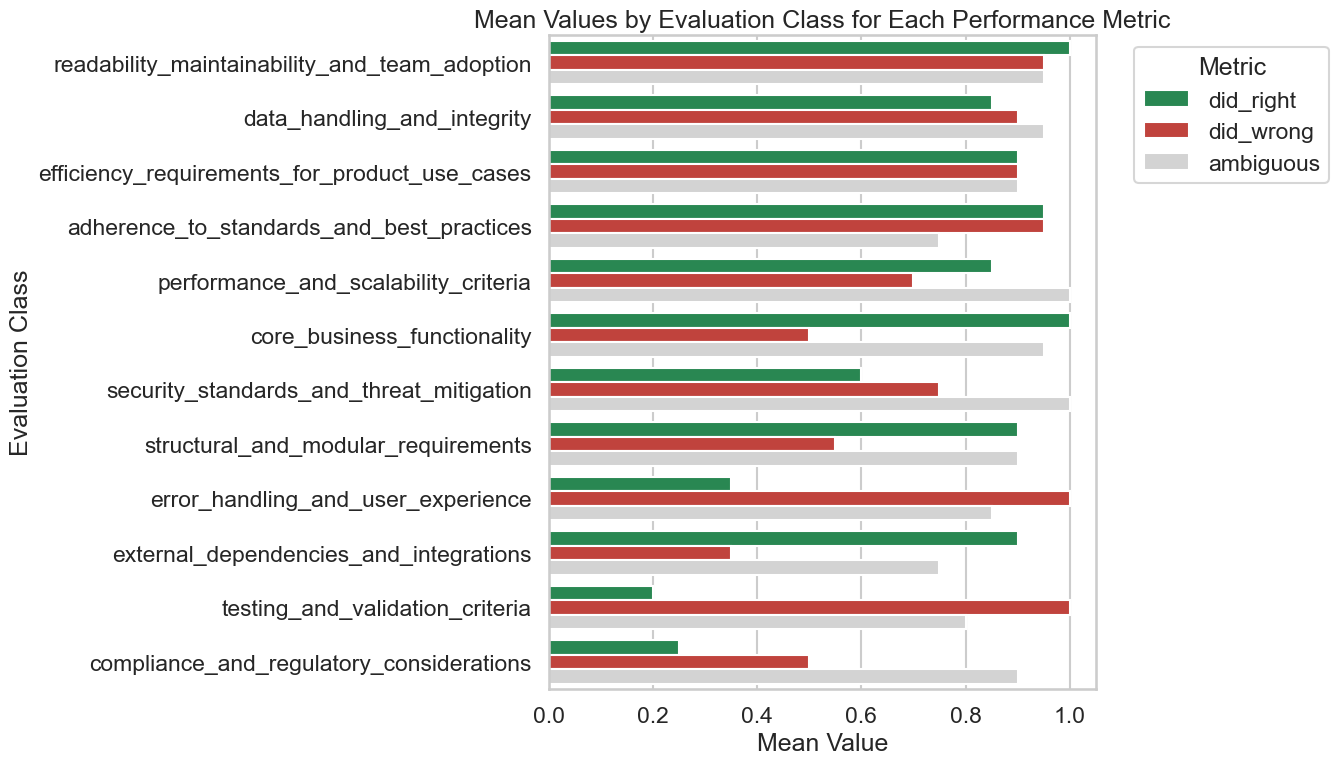

In [104]:
# 1. Calculate the mean performance metrics by Evaluation Class
group_means = subjective_analyses_df.groupby("Evaluation Class")[performance_metrics].mean().reset_index()

# 2. Create an order for evaluation classes.
# Here we use the average across metrics to sort evaluation classes in descending order.
group_means['avg'] = group_means[performance_metrics].mean(axis=1)
eval_order = group_means.sort_values('avg', ascending=False)['Evaluation Class'].tolist()

# 3. Melt the DataFrame to long format so that performance metrics are a column
df_long = group_means.melt(id_vars="Evaluation Class", 
                           value_vars=performance_metrics,
                           var_name="Metric", 
                           value_name="Mean Value")

# 4. Set seaborn style for a clean look
sns.set(style="whitegrid", context="talk")

# Define a custom palette for the performance metrics: if there are 3 metrics, use your chosen colors
if len(performance_metrics) == 3:
    cmap = plt.get_cmap('RdYlGn')
    custom_palette = [cmap(0.9), cmap(0.1), 'lightgray']
else:
    custom_palette = sns.color_palette("deep", len(performance_metrics))

# 5. Create the horizontal grouped bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=df_long,
    x="Mean Value",
    y="Evaluation Class",
    hue="Metric",
    order=eval_order,                 # Order evaluation classes by average metric value
    hue_order=performance_metrics,    # Order the metrics as provided
    palette=custom_palette
)

# Add labels and title
ax.set_title("Mean Values by Evaluation Class for Each Performance Metric")
ax.set_xlabel("Mean Value")
ax.set_ylabel("Evaluation Class")
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Performance per level

In [188]:
subjective_analyses_df[levels + performance_metrics
].groupby(
    by=levels
).agg(
    ['mean', 'count']
).sort_values(
    by=[('did_right', 'mean'), ('did_wrong', 'mean'), ('ambiguous', 'mean')], 
    ascending=False
)

did_right       did_wrong       ambiguous      
                                    mean count      mean count      mean count
Beginner Intermediate Advanced                                                
1        0            0         0.805556    36  0.555556    36  0.722222    36
0        1            0         0.750000   108  0.768519   108  0.925926   108
         0            1         0.677083    96  0.812500    96  0.916667    96

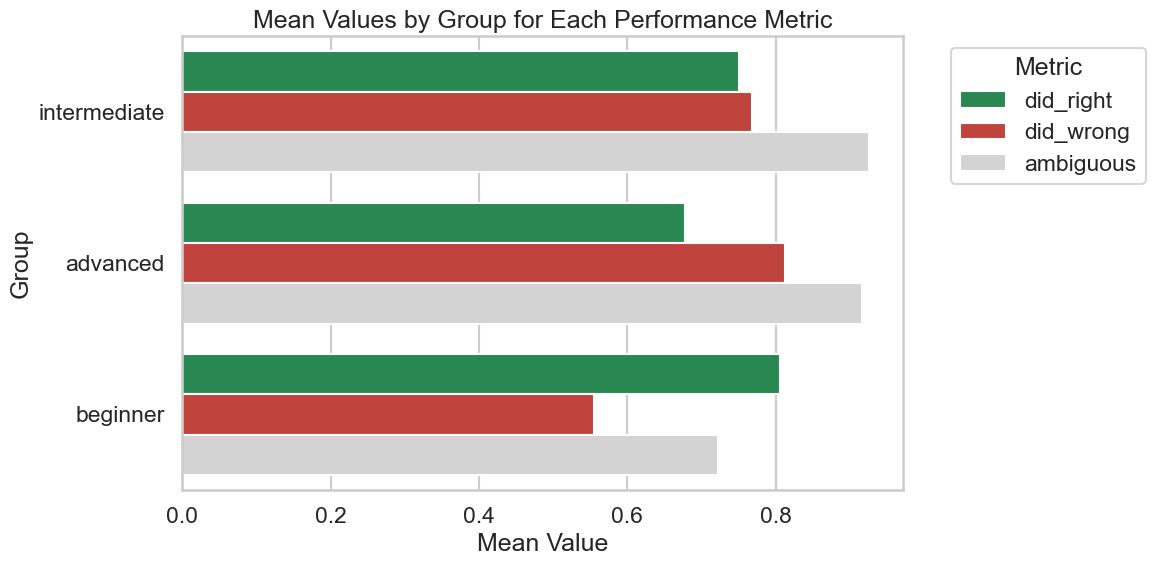

In [110]:
# Define a custom palette: if exactly 3 metrics, use your custom colors; otherwise, use a default palette.
if len(performance_metrics) == 3:
    cmap = plt.get_cmap('RdYlGn')
    custom_palette = [cmap(0.9), cmap(0.1), 'lightgray']
else:
    custom_palette = sns.color_palette("deep", len(performance_metrics))

# Aggregate the data by the given levels and performance metrics
df_long, group_order = aggregate_group_data(subjective_analyses_df, levels, performance_metrics)

levels_map = {'0 - 0 - 1': 'advanced', '0 - 1 - 0': 'intermediate', '1 - 0 - 0': 'beginner'}

df_long['group'] = df_long['group'].apply(lambda x: levels_map[x])

group_order = [levels_map[g] for g in group_order]

# Plot the aggregated data
plot_metrics(
    df_long, 
    group_order, 
    performance_metrics, 
    title="Mean Values by Group for Each Performance Metric",
    palette=custom_palette
)

## Performacne per complexity

In [148]:
complexity_dfs = []

for complexity in complexities:
    curr_complexity_df = subjective_analyses_df[subjective_analyses_df[complexity]==1]
    grouped_curr_complexity_df = (curr_complexity_df[
            [complexity] + performance_metrics
            ].groupby(
                by= [complexity]
            ).agg(
                ['mean', 'count'])
           .sort_values(by=[('did_right', 'mean'), ('did_wrong', 'mean'), ('ambiguous', 'mean')], ascending=False)
           )

    grouped_curr_complexity_df = grouped_curr_complexity_df.reset_index(drop=True)
    grouped_curr_complexity_df['Complexity'] = complexity
    
    complexity_dfs.append(grouped_curr_complexity_df)

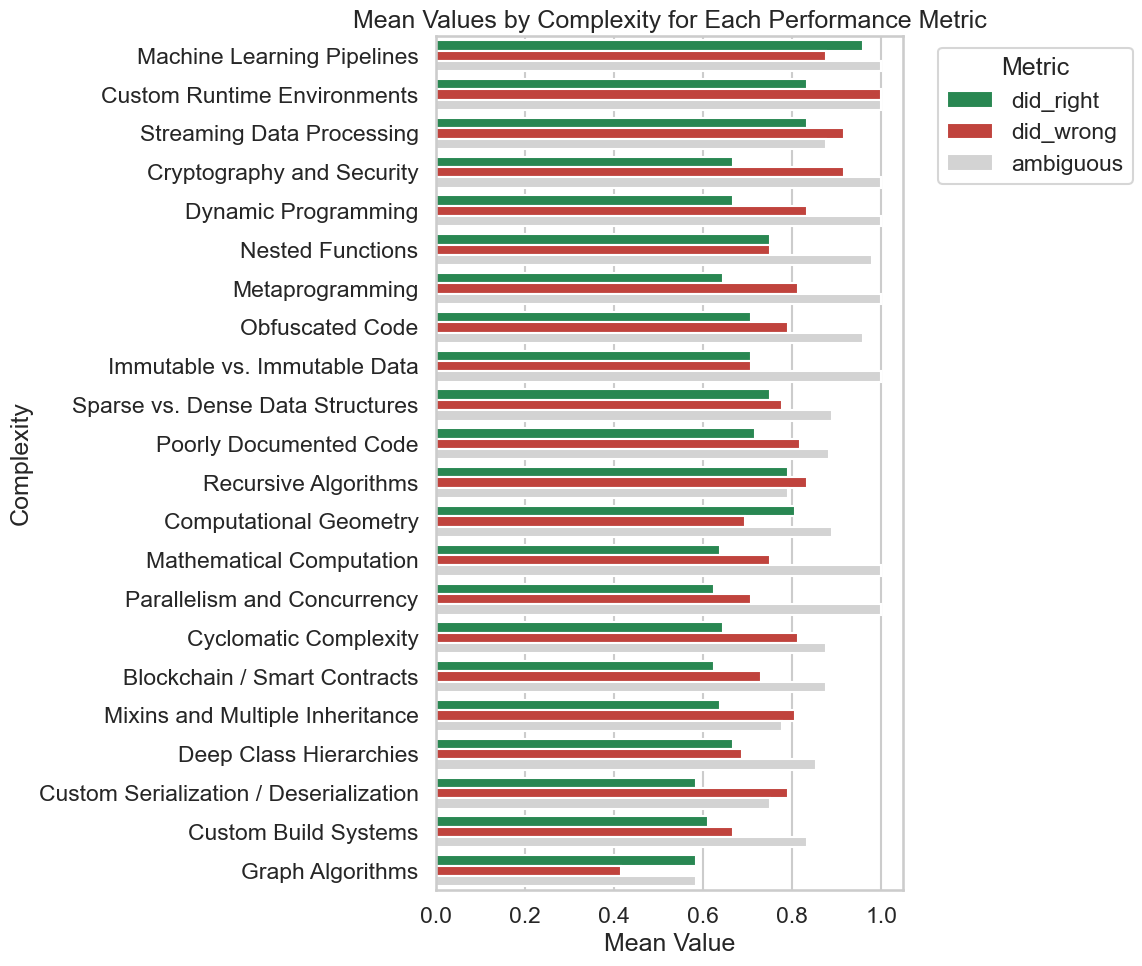

In [155]:


# Convert the list to a DataFrame
df = pd.DataFrame(pd.concat(complexity_dfs).to_dict(orient='records'))

# Select only the "mean" performance columns and the Complexity column.
# Identify performance columns where the second element is 'mean' (and not the Complexity column).
perf_mean_cols = [col for col in df.columns if col[1] == 'mean' and col[0] != 'Complexity']

# Create a new DataFrame containing only the Complexity and performance means
df_mean = df[[('Complexity', '')] + perf_mean_cols].copy()
df_mean = df_mean.rename(columns={('Complexity', ''): 'Complexity'})

# Compute an overall average of the performance metrics (for ordering)
df_mean['avg'] = df_mean[perf_mean_cols].mean(axis=1)

# Determine the order of Complexity (largest overall average first)
order = df_mean.sort_values('avg', ascending=False)['Complexity'].tolist()

# Melt the DataFrame to long format for plotting
df_long = pd.melt(df_mean.drop(columns='avg'),
                  id_vars=['Complexity'],
                  value_vars=perf_mean_cols,
                  var_name='Metric',
                  value_name='Mean Value')
# Simplify the Metric column from tuple to string (e.g. 'did_right', etc.)
df_long['Metric'] = df_long['Metric'].apply(lambda x: x[0])

# Define the metric order (if desired)
metric_order = ['did_right', 'did_wrong', 'ambiguous']

# Define a custom palette (using your preferred colors)
cmap = plt.get_cmap('RdYlGn')
custom_palette = [cmap(0.9), cmap(0.1), 'lightgray']

# Plot the horizontal grouped bar chart
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(12, 10))
ax = sns.barplot(
    data=df_long,
    x="Mean Value",
    y="Complexity",
    hue="Metric",
    order=order,
    hue_order=metric_order,
    palette=custom_palette
)
ax.set_title("Mean Values by Complexity for Each Performance Metric")
ax.set_xlabel("Mean Value")
ax.set_ylabel("Complexity")
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Performance per eval class and level

In [183]:
for level in levels:
    curr_level_df = subjective_analyses_df[subjective_analyses_df[level]==1]
    display(curr_level_df[
            ['Evaluation Class'] + [level] + performance_metrics
            ].groupby(
                by=[level] + ['Evaluation Class']
            ).agg(
                ['mean', 'count'])
           .sort_values(by=[('did_right', 'mean'), ('did_wrong', 'mean'), ('ambiguous', 'mean')], ascending=False)
           )

did_right        \
                                                            mean count   
Beginner Evaluation Class                                                
1        readability_maintainability_and_team_adoption  1.000000     3   
         adherence_to_standards_and_best_practices      1.000000     3   
         efficiency_requirements_for_product_use_cases  1.000000     3   
         performance_and_scalability_criteria           1.000000     3   
         security_standards_and_threat_mitigation       1.000000     3   
         core_business_functionality                    1.000000     3   
         external_dependencies_and_integrations         1.000000     3   
         data_handling_and_integrity                    0.666667     3   
         structural_and_modular_requirements            0.666667     3   
         compliance_and_regulatory_considerations       0.666667     3   
         error_handling_and_user_experience             0.333333     3   
         testing_and_validation_criteria                0.333333     3   

                                                       did_wrong        \
                                                            mean count   
Beginner Evaluation Class                                                
1        readability_maintainability_and_team_adoption  1.000000     3   
         adherence_to_standards_and_best_practices      1.000000     3   
         efficiency_requirements_for_product_use_cases  0.333333     3   
         performance_and_scalability_criteria           0.333333     3   
         security_standards_and_threat_mitigation       0.333333     3   
         core_business_functionality                    0.000000     3   
         external_dependencies_and_integrations         0.000000     3   
         data_handling_and_integrity                    1.000000     3   
         structural_and_modular_requirements            0.666667     3   
         compliance_and_regulatory_considerations       0.000000     3   
         error_handling_and_user_experience             1.000000     3   
         testing_and_validation_criteria                1.000000     3   

                                                       ambiguous        
                                                            mean count  
Beginner Evaluation Class                                               
1        readability_maintainability_and_team_adoption  1.000000     3  
         adherence_to_standards_and_best_practices      0.333333     3  
         efficiency_requirements_for_product_use_cases  1.000000     3  
         performance_and_scalability_criteria           1.000000     3  
         security_standards_and_threat_mitigation       1.000000     3  
         core_business_functionality                    1.000000     3  
         external_dependencies_and_integrations         0.000000     3  
         data_handling_and_integrity                    1.000000     3  
         structural_and_modular_requirements            1.000000     3  
         compliance_and_regulatory_considerations       0.333333     3  
         error_handling_and_user_experience             0.666667     3  
         testing_and_validation_criteria                0.333333     3

did_right        \
                                                                mean count   
Intermediate Evaluation Class                                                
1            adherence_to_standards_and_best_practices      1.000000     9   
             readability_maintainability_and_team_adoption  1.000000     9   
             data_handling_and_integrity                    1.000000     9   
             core_business_functionality                    1.000000     9   
             external_dependencies_and_integrations         1.000000     9   
             efficiency_requirements_for_product_use_cases  0.888889     9   
             structural_and_modular_requirements            0.888889     9   
             performance_and_scalability_criteria           0.666667     9   
             security_standards_and_threat_mitigation       0.666667     9   
             error_handling_and_user_experience             0.555556     9   
             compliance_and_regulatory_considerations       0.222222     9   
             testing_and_validation_criteria                0.111111     9   

                                                           did_wrong        \
                                                                mean count   
Intermediate Evaluation Class                                                
1            adherence_to_standards_and_best_practices      1.000000     9   
             readability_maintainability_and_team_adoption  1.000000     9   
             data_handling_and_integrity                    0.888889     9   
             core_business_functionality                    0.444444     9   
             external_dependencies_and_integrations         0.333333     9   
             efficiency_requirements_for_product_use_cases  1.000000     9   
             structural_and_modular_requirements            0.444444     9   
             performance_and_scalability_criteria           0.777778     9   
             security_standards_and_threat_mitigation       0.777778     9   
             error_handling_and_user_experience             1.000000     9   
             compliance_and_regulatory_considerations       0.555556     9   
             testing_and_validation_criteria                1.000000     9   

                                                           ambiguous        
                                                                mean count  
Intermediate Evaluation Class                                               
1            adherence_to_standards_and_best_practices      0.888889     9  
             readability_maintainability_and_team_adoption  0.888889     9  
             data_handling_and_integrity                    1.000000     9  
             core_business_functionality                    0.888889     9  
             external_dependencies_and_integrations         0.888889     9  
             efficiency_requirements_for_product_use_cases  0.888889     9  
             structural_and_modular_requirements            0.888889     9  
             performance_and_scalability_criteria           1.000000     9  
             security_standards_and_threat_mitigation       1.000000     9  
             error_handling_and_user_experience             0.888889     9  
             compliance_and_regulatory_considerations       1.000000     9  
             testing_and_validation_criteria                0.888889     9

did_right        \
                                                            mean count   
Advanced Evaluation Class                                                
1        readability_maintainability_and_team_adoption     1.000     8   
         core_business_functionality                       1.000     8   
         performance_and_scalability_criteria              1.000     8   
         structural_and_modular_requirements               1.000     8   
         efficiency_requirements_for_product_use_cases     0.875     8   
         adherence_to_standards_and_best_practices         0.875     8   
         data_handling_and_integrity                       0.750     8   
         external_dependencies_and_integrations            0.750     8   
         security_standards_and_threat_mitigation          0.375     8   
         testing_and_validation_criteria                   0.250     8   
         error_handling_and_user_experience                0.125     8   
         compliance_and_regulatory_considerations          0.125     8   

                                                       did_wrong        \
                                                            mean count   
Advanced Evaluation Class                                                
1        readability_maintainability_and_team_adoption     0.875     8   
         core_business_functionality                       0.750     8   
         performance_and_scalability_criteria              0.750     8   
         structural_and_modular_requirements               0.625     8   
         efficiency_requirements_for_product_use_cases     1.000     8   
         adherence_to_standards_and_best_practices         0.875     8   
         data_handling_and_integrity                       0.875     8   
         external_dependencies_and_integrations            0.500     8   
         security_standards_and_threat_mitigation          0.875     8   
         testing_and_validation_criteria                   1.000     8   
         error_handling_and_user_experience                1.000     8   
         compliance_and_regulatory_considerations          0.625     8   

                                                       ambiguous        
                                                            mean count  
Advanced Evaluation Class                                               
1        readability_maintainability_and_team_adoption     1.000     8  
         core_business_functionality                       1.000     8  
         performance_and_scalability_criteria              1.000     8  
         structural_and_modular_requirements               0.875     8  
         efficiency_requirements_for_product_use_cases     0.875     8  
         adherence_to_standards_and_best_practices         0.750     8  
         data_handling_and_integrity                       0.875     8  
         external_dependencies_and_integrations            0.875     8  
         security_standards_and_threat_mitigation          1.000     8  
         testing_and_validation_criteria                   0.875     8  
         error_handling_and_user_experience                0.875     8  
         compliance_and_regulatory_considerations          1.000     8

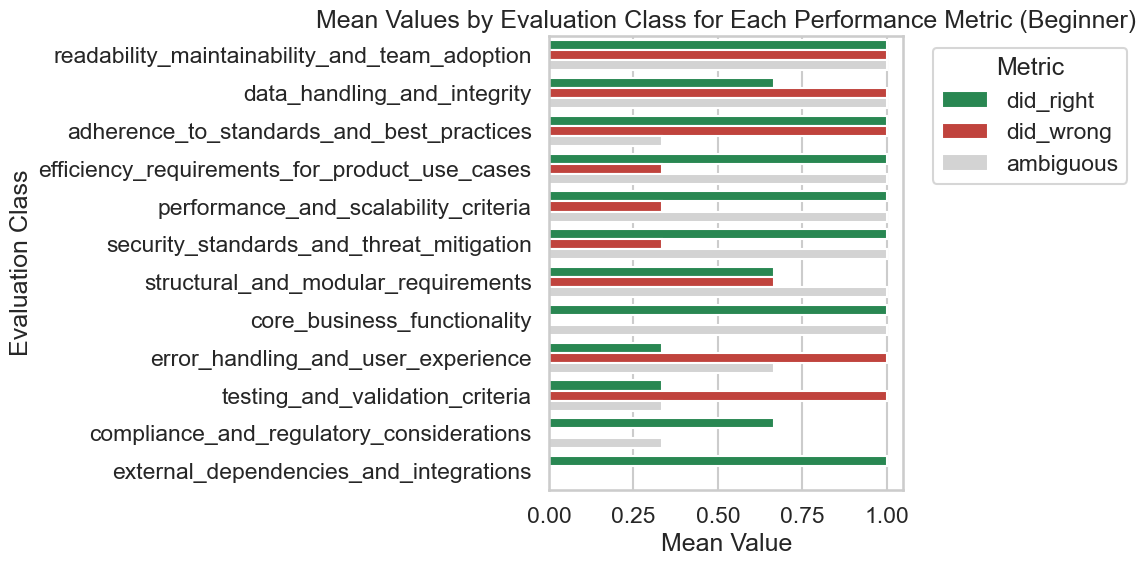

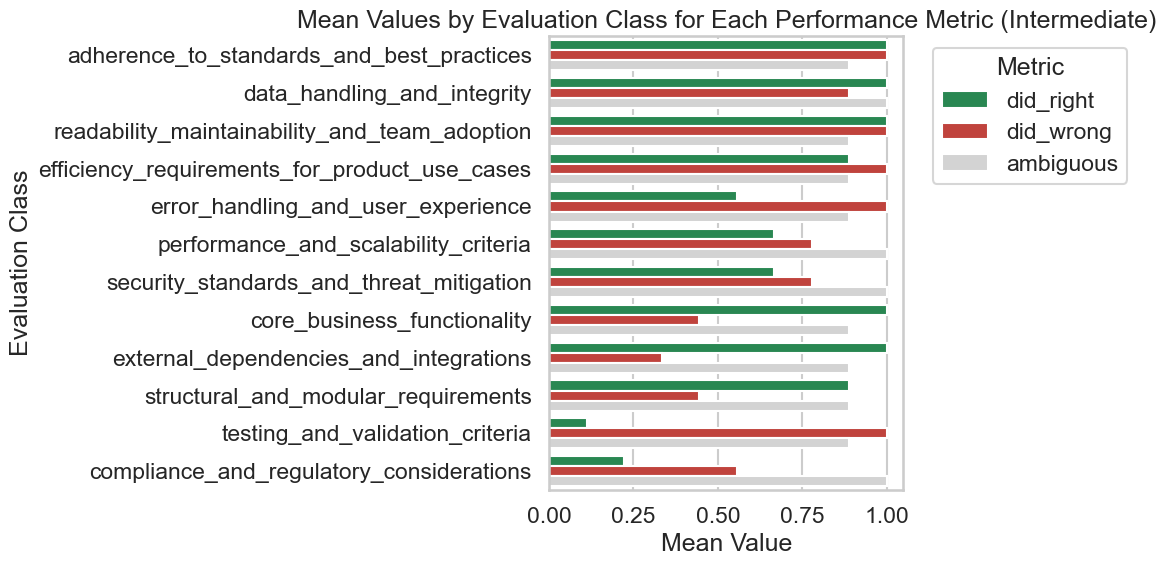

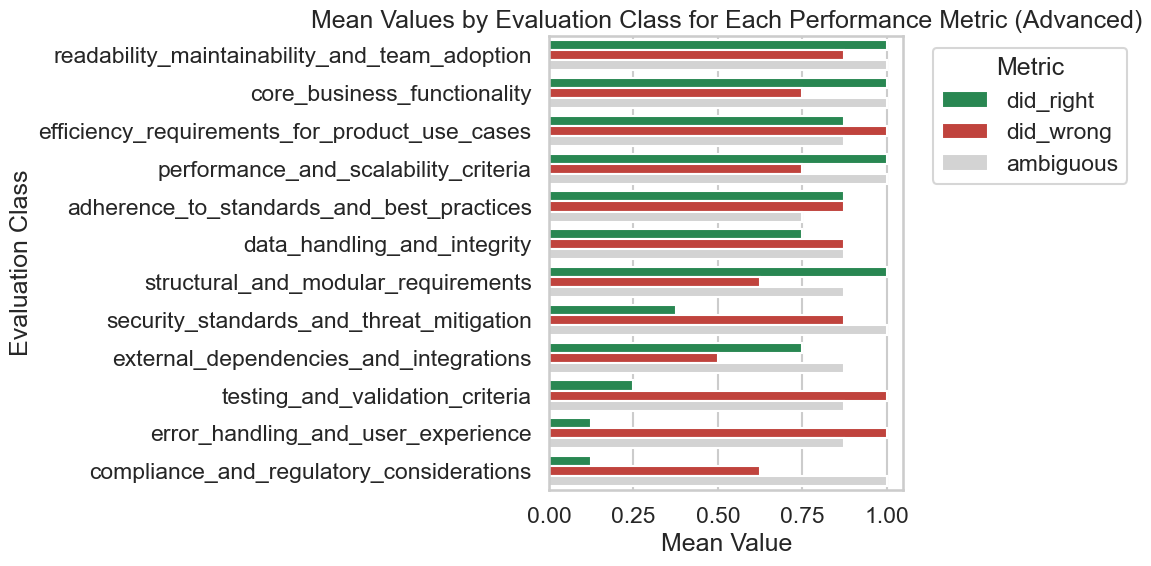

In [96]:
# Define a custom palette: if you have exactly 3 metrics, use your chosen colors
if len(performance_metrics) == 3:
    cmap = plt.get_cmap('RdYlGn')
    custom_palette = [cmap(0.9), cmap(0.1), 'lightgray']
else:
    custom_palette = sns.color_palette("deep", len(performance_metrics))

# Loop over each level to aggregate and plot the data
for level in levels:
    # Aggregate data for the current level
    df_long, eval_order = aggregate_evaluation_data(subjective_analyses_df, level, performance_metrics)
    
    # Plot using the modular function
    plot_metrics(
        df_long, 
        eval_order, 
        performance_metrics, 
        title=f"Mean Values by Evaluation Class for Each Performance Metric ({level})", 
        palette=custom_palette
    )

### Performance per evaluation class and complexity

In [131]:
for complexity in complexities:
    curr_level_df = subjective_analyses_df[subjective_analyses_df[complexity]==1]
    display(curr_level_df[
            ['Evaluation Class'] + [complexity] + performance_metrics
            ].groupby(
                by= [complexity] + ['Evaluation Class']
            ).agg(
                ['mean', 'count'])
           .sort_values(by=[('did_right', 'mean'), ('did_wrong', 'mean'), ('ambiguous', 'mean')], ascending=False)
           )

did_right  \
                                                                    mean   
Nested Functions Evaluation Class                                          
1                efficiency_requirements_for_product_use_cases      1.00   
                 adherence_to_standards_and_best_practices          1.00   
                 performance_and_scalability_criteria               1.00   
                 readability_maintainability_and_team_adoption      1.00   
                 core_business_functionality                        1.00   
                 structural_and_modular_requirements                1.00   
                 data_handling_and_integrity                        0.75   
                 external_dependencies_and_integrations             0.75   
                 error_handling_and_user_experience                 0.50   
                 security_standards_and_threat_mitigation           0.50   
                 testing_and_validation_criteria                    0.50   
                 compliance_and_regulatory_considerations           0.00   

                                                                      \
                                                               count   
Nested Functions Evaluation Class                                      
1                efficiency_requirements_for_product_use_cases     4   
                 adherence_to_standards_and_best_practices         4   
                 performance_and_scalability_criteria              4   
                 readability_maintainability_and_team_adoption     4   
                 core_business_functionality                       4   
                 structural_and_modular_requirements               4   
                 data_handling_and_integrity                       4   
                 external_dependencies_and_integrations            4   
                 error_handling_and_user_experience                4   
                 security_standards_and_threat_mitigation          4   
                 testing_and_validation_criteria                   4   
                 compliance_and_regulatory_considerations          4   

                                                               did_wrong  \
                                                                    mean   
Nested Functions Evaluation Class                                          
1                efficiency_requirements_for_product_use_cases      1.00   
                 adherence_to_standards_and_best_practices          0.75   
                 performance_and_scalability_criteria               0.75   
                 readability_maintainability_and_team_adoption      0.75   
                 core_business_functionality                        0.25   
                 structural_and_modular_requirements                0.25   
                 data_handling_and_integrity                        1.00   
                 external_dependencies_and_integrations             0.50   
                 error_handling_and_user_experience                 1.00   
                 security_standards_and_threat_mitigation           1.00   
                 testing_and_validation_criteria                    1.00   
                 compliance_and_regulatory_considerations           0.75   

                                                                      \
                                                               count   
Nested Functions Evaluation Class                                      
1                efficiency_requirements_for_product_use_cases     4   
                 adherence_to_standards_and_best_practices         4   
                 performance_and_scalability_criteria              4   
                 readability_maintainability_and_team_adoption     4   
                 core_business_functionality                       4   
                 structural_and_modular_requirements               4   
                 data_handling_and_integrity        

did_right  \
                                                                          mean   
Deep Class Hierarchies Evaluation Class                                          
1                      efficiency_requirements_for_product_use_cases      1.00   
                       readability_maintainability_and_team_adoption      1.00   
                       data_handling_and_integrity                        1.00   
                       core_business_functionality                        1.00   
                       structural_and_modular_requirements                1.00   
                       external_dependencies_and_integrations             1.00   
                       adherence_to_standards_and_best_practices          0.75   
                       performance_and_scalability_criteria               0.75   
                       security_standards_and_threat_mitigation           0.50   
                       testing_and_validation_criteria                    0.00   
                       error_handling_and_user_experience                 0.00   
                       compliance_and_regulatory_considerations           0.00   

                                                                            \
                                                                     count   
Deep Class Hierarchies Evaluation Class                                      
1                      efficiency_requirements_for_product_use_cases     4   
                       readability_maintainability_and_team_adoption     4   
                       data_handling_and_integrity                       4   
                       core_business_functionality                       4   
                       structural_and_modular_requirements               4   
                       external_dependencies_and_integrations            4   
                       adherence_to_standards_and_best_practices         4   
                       performance_and_scalability_criteria              4   
                       security_standards_and_threat_mitigation          4   
                       testing_and_validation_criteria                   4   
                       error_handling_and_user_experience                4   
                       compliance_and_regulatory_considerations          4   

                                                                     did_wrong  \
                                                                          mean   
Deep Class Hierarchies Evaluation Class                                          
1                      efficiency_requirements_for_product_use_cases      1.00   
                       readability_maintainability_and_team_adoption      1.00   
                       data_handling_and_integrity                        0.75   
                       core_business_functionality                        0.75   
                       structural_and_modular_requirements                0.50   
                       external_dependencies_and_integrations             0.00   
                       adherence_to_standards_and_best_practices          1.00   
                       performance_and_scalability_criteria               0.75   
                       security_standards_and_threat_mitigation           0.50   
                       testing_and_validation_criteria                    1.00   
                       error_handling_and_user_experience                 1.00   
                       compliance_and_regulatory_considerations           0.00   

                                                                            \
                                                                     count   
Deep Class Hierarchies Evaluation Class                                      
1                      efficiency_requirements_for_product_use_cases     4   
                       readability_maintainability_and_team_adoption     4   
                       data_handling_and_integ

did_right  \
                                                                                   mean   
Mixins and Multiple Inheritance Evaluation Class                                          
1                               core_business_functionality                    1.000000   
                                performance_and_scalability_criteria           1.000000   
                                readability_maintainability_and_team_adoption  1.000000   
                                adherence_to_standards_and_best_practices      1.000000   
                                structural_and_modular_requirements            1.000000   
                                external_dependencies_and_integrations         1.000000   
                                data_handling_and_integrity                    0.666667   
                                efficiency_requirements_for_product_use_cases  0.666667   
                                security_standards_and_threat_mitigation       0.333333   
                                error_handling_and_user_experience             0.000000   
                                testing_and_validation_criteria                0.000000   
                                compliance_and_regulatory_considerations       0.000000   

                                                                                     \
                                                                              count   
Mixins and Multiple Inheritance Evaluation Class                                      
1                               core_business_functionality                       3   
                                performance_and_scalability_criteria              3   
                                readability_maintainability_and_team_adoption     3   
                                adherence_to_standards_and_best_practices         3   
                                structural_and_modular_requirements               3   
                                external_dependencies_and_integrations            3   
                                data_handling_and_integrity                       3   
                                efficiency_requirements_for_product_use_cases     3   
                                security_standards_and_threat_mitigation          3   
                                error_handling_and_user_experience                3   
                                testing_and_validation_criteria                   3   
                                compliance_and_regulatory_considerations          3   

                                                                              did_wrong  \
                                                                                   mean   
Mixins and Multiple Inheritance Evaluation Class                                          
1                               core_business_functionality                    1.000000   
                                performance_and_scalability_criteria           1.000000   
                                readability_maintainability_and_team_adoption  1.000000   
                                adherence_to_standards_and_best_practices      1.000000   
                                structural_and_modular_requirements            0.666667   
                                external_dependencies_and_integrations         0.000000   
                                data_handling_and_integrity                    1.000000   
                                efficiency_requirements_for_product_use_cases  1.000000   
                                security_standards_and_threat_mitigation       0.666667   
                                error_handling_and_user_experience             1.000000   
                                testing_and_validation_criteria                1.000000   
                                compliance_and_regulatory_considerations       0.333333   

                                        

did_right        \
                                                                   mean count   
Metaprogramming Evaluation Class                                                
1               readability_maintainability_and_team_adoption      1.00     4   
                data_handling_and_integrity                        1.00     4   
                structural_and_modular_requirements                1.00     4   
                core_business_functionality                        1.00     4   
                adherence_to_standards_and_best_practices          0.75     4   
                efficiency_requirements_for_product_use_cases      0.75     4   
                performance_and_scalability_criteria               0.75     4   
                external_dependencies_and_integrations             0.75     4   
                security_standards_and_threat_mitigation           0.50     4   
                compliance_and_regulatory_considerations           0.25     4   
                error_handling_and_user_experience                 0.00     4   
                testing_and_validation_criteria                    0.00     4   

                                                              did_wrong        \
                                                                   mean count   
Metaprogramming Evaluation Class                                                
1               readability_maintainability_and_team_adoption      1.00     4   
                data_handling_and_integrity                        0.75     4   
                structural_and_modular_requirements                0.75     4   
                core_business_functionality                        0.50     4   
                adherence_to_standards_and_best_practices          1.00     4   
                efficiency_requirements_for_product_use_cases      1.00     4   
                performance_and_scalability_criteria               0.75     4   
                external_dependencies_and_integrations             0.50     4   
                security_standards_and_threat_mitigation           1.00     4   
                compliance_and_regulatory_considerations           0.50     4   
                error_handling_and_user_experience                 1.00     4   
                testing_and_validation_criteria                    1.00     4   

                                                              ambiguous        
                                                                   mean count  
Metaprogramming Evaluation Class                                               
1               readability_maintainability_and_team_adoption       1.0     4  
                data_handling_and_integrity                         1.0     4  
                structural_and_modular_requirements                 1.0     4  
                core_business_functionality                         1.0     4  
                adherence_to_standards_and_best_practices           1.0     4  
                efficiency_requirements_for_product_use_cases       1.0     4  
                performance_and_scalability_criteria                1.0     4  
                external_dependencies_and_integrations              1.0     4  
                security_standards_and_threat_mitigation            1.0     4  
                compliance_and_regulatory_considerations            1.0     4  
                error_handling_and_user_experience                  1.0     4  
                testing_and_validation_criteria                     1.0     4

Empty DataFrame
Columns: [(did_right, mean), (did_right, count), (did_wrong, mean), (did_wrong, count), (ambiguous, mean), (ambiguous, count)]
Index: []

Empty DataFrame
Columns: [(did_right, mean), (did_right, count), (did_wrong, mean), (did_wrong, count), (ambiguous, mean), (ambiguous, count)]
Index: []

did_right  \
                                                                        mean   
Recursive Algorithms Evaluation Class                                          
1                    core_business_functionality                         1.0   
                     data_handling_and_integrity                         1.0   
                     efficiency_requirements_for_product_use_cases       1.0   
                     performance_and_scalability_criteria                1.0   
                     readability_maintainability_and_team_adoption       1.0   
                     security_standards_and_threat_mitigation            1.0   
                     adherence_to_standards_and_best_practices           1.0   
                     structural_and_modular_requirements                 1.0   
                     external_dependencies_and_integrations              1.0   
                     error_handling_and_user_experience                  0.5   
                     testing_and_validation_criteria                     0.0   
                     compliance_and_regulatory_considerations            0.0   

                                                                          \
                                                                   count   
Recursive Algorithms Evaluation Class                                      
1                    core_business_functionality                       2   
                     data_handling_and_integrity                       2   
                     efficiency_requirements_for_product_use_cases     2   
                     performance_and_scalability_criteria              2   
                     readability_maintainability_and_team_adoption     2   
                     security_standards_and_threat_mitigation          2   
                     adherence_to_standards_and_best_practices         2   
                     structural_and_modular_requirements               2   
                     external_dependencies_and_integrations            2   
                     error_handling_and_user_experience                2   
                     testing_and_validation_criteria                   2   
                     compliance_and_regulatory_considerations          2   

                                                                   did_wrong  \
                                                                        mean   
Recursive Algorithms Evaluation Class                                          
1                    core_business_functionality                         1.0   
                     data_handling_and_integrity                         1.0   
                     efficiency_requirements_for_product_use_cases       1.0   
                     performance_and_scalability_criteria                1.0   
                     readability_maintainability_and_team_adoption       1.0   
                     security_standards_and_threat_mitigation            1.0   
                     adherence_to_standards_and_best_practices           1.0   
                     structural_and_modular_requirements                 1.0   
                     external_dependencies_and_integrations              0.0   
                     error_handling_and_user_experience                  1.0   
                     testing_and_validation_criteria                     1.0   
                     compliance_and_regulatory_considerations            0.0   

                                                                          \
                                                                   count   
Recursive Algorithms Evaluation Class                                      
1                    core_business_functionality                       2   
                     data_handling_and_integrity                       2   
                     efficiency_requirements_for_product_use_cases     2   
                     performance_and_scalability_criteria           

did_right  \
                                                                    mean   
Graph Algorithms Evaluation Class                                          
1                adherence_to_standards_and_best_practices           1.0   
                 efficiency_requirements_for_product_use_cases       1.0   
                 readability_maintainability_and_team_adoption       1.0   
                 data_handling_and_integrity                         1.0   
                 external_dependencies_and_integrations              1.0   
                 structural_and_modular_requirements                 1.0   
                 core_business_functionality                         1.0   
                 testing_and_validation_criteria                     0.0   
                 error_handling_and_user_experience                  0.0   
                 compliance_and_regulatory_considerations            0.0   
                 performance_and_scalability_criteria                0.0   
                 security_standards_and_threat_mitigation            0.0   

                                                                      \
                                                               count   
Graph Algorithms Evaluation Class                                      
1                adherence_to_standards_and_best_practices         1   
                 efficiency_requirements_for_product_use_cases     1   
                 readability_maintainability_and_team_adoption     1   
                 data_handling_and_integrity                       1   
                 external_dependencies_and_integrations            1   
                 structural_and_modular_requirements               1   
                 core_business_functionality                       1   
                 testing_and_validation_criteria                   1   
                 error_handling_and_user_experience                1   
                 compliance_and_regulatory_considerations          1   
                 performance_and_scalability_criteria              1   
                 security_standards_and_threat_mitigation          1   

                                                               did_wrong  \
                                                                    mean   
Graph Algorithms Evaluation Class                                          
1                adherence_to_standards_and_best_practices           1.0   
                 efficiency_requirements_for_product_use_cases       1.0   
                 readability_maintainability_and_team_adoption       1.0   
                 data_handling_and_integrity                         0.0   
                 external_dependencies_and_integrations              0.0   
                 structural_and_modular_requirements                 0.0   
                 core_business_functionality                         0.0   
                 testing_and_validation_criteria                     1.0   
                 error_handling_and_user_experience                  1.0   
                 compliance_and_regulatory_considerations            0.0   
                 performance_and_scalability_criteria                0.0   
                 security_standards_and_threat_mitigation            0.0   

                                                                      \
                                                               count   
Graph Algorithms Evaluation Class                                      
1                adherence_to_standards_and_best_practices         1   
                 efficiency_requirements_for_product_use_cases     1   
                 readability_maintainability_and_team_adoption     1   
                 data_handling_and_integrity                       1   
                 external_dependencies_and_integrations            1   
                 structural_and_modular_requirements               1   
                 core_business_functionality        

did_right  \
                                                                       mean   
Dynamic Programming Evaluation Class                                          
1                   adherence_to_standards_and_best_practices           1.0   
                    core_business_functionality                         1.0   
                    data_handling_and_integrity                         1.0   
                    efficiency_requirements_for_product_use_cases       1.0   
                    performance_and_scalability_criteria                1.0   
                    readability_maintainability_and_team_adoption       1.0   
                    external_dependencies_and_integrations              1.0   
                    structural_and_modular_requirements                 1.0   
                    compliance_and_regulatory_considerations            0.0   
                    error_handling_and_user_experience                  0.0   
                    security_standards_and_threat_mitigation            0.0   
                    testing_and_validation_criteria                     0.0   

                                                                         \
                                                                  count   
Dynamic Programming Evaluation Class                                      
1                   adherence_to_standards_and_best_practices         1   
                    core_business_functionality                       1   
                    data_handling_and_integrity                       1   
                    efficiency_requirements_for_product_use_cases     1   
                    performance_and_scalability_criteria              1   
                    readability_maintainability_and_team_adoption     1   
                    external_dependencies_and_integrations            1   
                    structural_and_modular_requirements               1   
                    compliance_and_regulatory_considerations          1   
                    error_handling_and_user_experience                1   
                    security_standards_and_threat_mitigation          1   
                    testing_and_validation_criteria                   1   

                                                                  did_wrong  \
                                                                       mean   
Dynamic Programming Evaluation Class                                          
1                   adherence_to_standards_and_best_practices           1.0   
                    core_business_functionality                         1.0   
                    data_handling_and_integrity                         1.0   
                    efficiency_requirements_for_product_use_cases       1.0   
                    performance_and_scalability_criteria                1.0   
                    readability_maintainability_and_team_adoption       1.0   
                    external_dependencies_and_integrations              0.0   
                    structural_and_modular_requirements                 0.0   
                    compliance_and_regulatory_considerations            1.0   
                    error_handling_and_user_experience                  1.0   
                    security_standards_and_threat_mitigation            1.0   
                    testing_and_validation_criteria                     1.0   

                                                                         \
                                                                  count   
Dynamic Programming Evaluation Class                                      
1                   adherence_to_standards_and_best_practices         1   
                    core_business_functionality                       1   
                    data_handling_and_integrity                       1   
                    efficiency_requirements_for_product_use_cases     1   
                    performance_and_scalabi

did_right  \
                                                                               mean   
Parallelism and Concurrency Evaluation Class                                          
1                           adherence_to_standards_and_best_practices           1.0   
                            efficiency_requirements_for_product_use_cases       1.0   
                            readability_maintainability_and_team_adoption       1.0   
                            data_handling_and_integrity                         1.0   
                            core_business_functionality                         1.0   
                            structural_and_modular_requirements                 1.0   
                            error_handling_and_user_experience                  0.5   
                            external_dependencies_and_integrations              0.5   
                            performance_and_scalability_criteria                0.5   
                            compliance_and_regulatory_considerations            0.0   
                            security_standards_and_threat_mitigation            0.0   
                            testing_and_validation_criteria                     0.0   

                                                                                 \
                                                                          count   
Parallelism and Concurrency Evaluation Class                                      
1                           adherence_to_standards_and_best_practices         2   
                            efficiency_requirements_for_product_use_cases     2   
                            readability_maintainability_and_team_adoption     2   
                            data_handling_and_integrity                       2   
                            core_business_functionality                       2   
                            structural_and_modular_requirements               2   
                            error_handling_and_user_experience                2   
                            external_dependencies_and_integrations            2   
                            performance_and_scalability_criteria              2   
                            compliance_and_regulatory_considerations          2   
                            security_standards_and_threat_mitigation          2   
                            testing_and_validation_criteria                   2   

                                                                          did_wrong  \
                                                                               mean   
Parallelism and Concurrency Evaluation Class                                          
1                           adherence_to_standards_and_best_practices           1.0   
                            efficiency_requirements_for_product_use_cases       1.0   
                            readability_maintainability_and_team_adoption       1.0   
                            data_handling_and_integrity                         0.5   
                            core_business_functionality                         0.0   
                            structural_and_modular_requirements                 0.0   
                            error_handling_and_user_experience                  1.0   
                            external_dependencies_and_integrations              0.5   
                            performance_and_scalability_criteria                0.5   
                            compliance_and_regulatory_considerations            1.0   
                            security_standards_and_threat_mitigation            1.0   
                            testing_and_validation_criteria                     1.0   

                                                                                 \
                                                                          count   
Parallelism and Concurrency Evaluation Class      

did_right  \
                                                                          mean   
Computational Geometry Evaluation Class                                          
1                      efficiency_requirements_for_product_use_cases  1.000000   
                       readability_maintainability_and_team_adoption  1.000000   
                       adherence_to_standards_and_best_practices      1.000000   
                       core_business_functionality                    1.000000   
                       performance_and_scalability_criteria           1.000000   
                       data_handling_and_integrity                    0.666667   
                       error_handling_and_user_experience             0.666667   
                       testing_and_validation_criteria                0.666667   
                       security_standards_and_threat_mitigation       0.666667   
                       structural_and_modular_requirements            0.666667   
                       compliance_and_regulatory_considerations       0.666667   
                       external_dependencies_and_integrations         0.666667   

                                                                            \
                                                                     count   
Computational Geometry Evaluation Class                                      
1                      efficiency_requirements_for_product_use_cases     3   
                       readability_maintainability_and_team_adoption     3   
                       adherence_to_standards_and_best_practices         3   
                       core_business_functionality                       3   
                       performance_and_scalability_criteria              3   
                       data_handling_and_integrity                       3   
                       error_handling_and_user_experience                3   
                       testing_and_validation_criteria                   3   
                       security_standards_and_threat_mitigation          3   
                       structural_and_modular_requirements               3   
                       compliance_and_regulatory_considerations          3   
                       external_dependencies_and_integrations            3   

                                                                     did_wrong  \
                                                                          mean   
Computational Geometry Evaluation Class                                          
1                      efficiency_requirements_for_product_use_cases  0.666667   
                       readability_maintainability_and_team_adoption  0.666667   
                       adherence_to_standards_and_best_practices      0.666667   
                       core_business_functionality                    0.333333   
                       performance_and_scalability_criteria           0.333333   
                       data_handling_and_integrity                    1.000000   
                       error_handling_and_user_experience             1.000000   
                       testing_and_validation_criteria                1.000000   
                       security_standards_and_threat_mitigation       0.666667   
                       structural_and_modular_requirements            0.666667   
                       compliance_and_regulatory_considerations       0.666667   
                       external_dependencies_and_integrations         0.666667   

                                                                            \
                                                                     count   
Computational Geometry Evaluation Class                                      
1                      efficiency_requirements_for_product_use_cases     3   
                       readability_maintainability_and_team_adoption     3   
                       adherence_to_standards_

did_right  \
                                                                                    mean   
Sparse vs. Dense Data Structures Evaluation Class                                          
1                                data_handling_and_integrity                    1.000000   
                                 readability_maintainability_and_team_adoption  1.000000   
                                 core_business_functionality                    1.000000   
                                 efficiency_requirements_for_product_use_cases  1.000000   
                                 performance_and_scalability_criteria           1.000000   
                                 external_dependencies_and_integrations         1.000000   
                                 error_handling_and_user_experience             0.666667   
                                 structural_and_modular_requirements            0.666667   
                                 adherence_to_standards_and_best_practices      0.666667   
                                 security_standards_and_threat_mitigation       0.666667   
                                 compliance_and_regulatory_considerations       0.333333   
                                 testing_and_validation_criteria                0.000000   

                                                                                      \
                                                                               count   
Sparse vs. Dense Data Structures Evaluation Class                                      
1                                data_handling_and_integrity                       3   
                                 readability_maintainability_and_team_adoption     3   
                                 core_business_functionality                       3   
                                 efficiency_requirements_for_product_use_cases     3   
                                 performance_and_scalability_criteria              3   
                                 external_dependencies_and_integrations            3   
                                 error_handling_and_user_experience                3   
                                 structural_and_modular_requirements               3   
                                 adherence_to_standards_and_best_practices         3   
                                 security_standards_and_threat_mitigation          3   
                                 compliance_and_regulatory_considerations          3   
                                 testing_and_validation_criteria                   3   

                                                                               did_wrong  \
                                                                                    mean   
Sparse vs. Dense Data Structures Evaluation Class                                          
1                                data_handling_and_integrity                    1.000000   
                                 readability_maintainability_and_team_adoption  1.000000   
                                 core_business_functionality                    0.666667   
                                 efficiency_requirements_for_product_use_cases  0.666667   
                                 performance_and_scalability_criteria           0.666667   
                                 external_dependencies_and_integrations         0.333333   
                                 error_handling_and_user_experience             1.000000   
                                 structural_and_modular_requirements            1.000000   
                                 adherence_to_standards_and_best_practices      1.000000   
                                 security_standards_and_threat_mitigation       0.666667   
                                 compliance_and_regulatory_considerations       0.333333   
                                 testing_and_validation_criteria                1.000000 

Empty DataFrame
Columns: [(did_right, mean), (did_right, count), (did_wrong, mean), (did_wrong, count), (ambiguous, mean), (ambiguous, count)]
Index: []

did_right  \
                                                                             mean   
Streaming Data Processing Evaluation Class                                          
1                         adherence_to_standards_and_best_practices           1.0   
                          core_business_functionality                         1.0   
                          data_handling_and_integrity                         1.0   
                          efficiency_requirements_for_product_use_cases       1.0   
                          error_handling_and_user_experience                  1.0   
                          performance_and_scalability_criteria                1.0   
                          readability_maintainability_and_team_adoption       1.0   
                          security_standards_and_threat_mitigation            1.0   
                          structural_and_modular_requirements                 1.0   
                          external_dependencies_and_integrations              1.0   
                          testing_and_validation_criteria                     0.0   
                          compliance_and_regulatory_considerations            0.0   

                                                                               \
                                                                        count   
Streaming Data Processing Evaluation Class                                      
1                         adherence_to_standards_and_best_practices         2   
                          core_business_functionality                       2   
                          data_handling_and_integrity                       2   
                          efficiency_requirements_for_product_use_cases     2   
                          error_handling_and_user_experience                2   
                          performance_and_scalability_criteria              2   
                          readability_maintainability_and_team_adoption     2   
                          security_standards_and_threat_mitigation          2   
                          structural_and_modular_requirements               2   
                          external_dependencies_and_integrations            2   
                          testing_and_validation_criteria                   2   
                          compliance_and_regulatory_considerations          2   

                                                                        did_wrong  \
                                                                             mean   
Streaming Data Processing Evaluation Class                                          
1                         adherence_to_standards_and_best_practices           1.0   
                          core_business_functionality                         1.0   
                          data_handling_and_integrity                         1.0   
                          efficiency_requirements_for_product_use_cases       1.0   
                          error_handling_and_user_experience                  1.0   
                          performance_and_scalability_criteria                1.0   
                          readability_maintainability_and_team_adoption       1.0   
                          security_standards_and_threat_mitigation            1.0   
                          structural_and_modular_requirements                 1.0   
                          external_dependencies_and_integrations              0.5   
                          testing_and_validation_criteria                     1.0   
                          compliance_and_regulatory_considerations            0.5   

                                                                               \
                                                                        count   
Streaming Data Processing Evaluation Class                                      
1                         adherence_to_standards_and_best_pra

did_right  \
                                                                                mean   
Immutable vs. Immutable Data Evaluation Class                                          
1                            efficiency_requirements_for_product_use_cases       1.0   
                             adherence_to_standards_and_best_practices           1.0   
                             core_business_functionality                         1.0   
                             performance_and_scalability_criteria                1.0   
                             readability_maintainability_and_team_adoption       1.0   
                             structural_and_modular_requirements                 1.0   
                             data_handling_and_integrity                         0.5   
                             security_standards_and_threat_mitigation            0.5   
                             testing_and_validation_criteria                     0.5   
                             compliance_and_regulatory_considerations            0.5   
                             external_dependencies_and_integrations              0.5   
                             error_handling_and_user_experience                  0.0   

                                                                                  \
                                                                           count   
Immutable vs. Immutable Data Evaluation Class                                      
1                            efficiency_requirements_for_product_use_cases     2   
                             adherence_to_standards_and_best_practices         2   
                             core_business_functionality                       2   
                             performance_and_scalability_criteria              2   
                             readability_maintainability_and_team_adoption     2   
                             structural_and_modular_requirements               2   
                             data_handling_and_integrity                       2   
                             security_standards_and_threat_mitigation          2   
                             testing_and_validation_criteria                   2   
                             compliance_and_regulatory_considerations          2   
                             external_dependencies_and_integrations            2   
                             error_handling_and_user_experience                2   

                                                                           did_wrong  \
                                                                                mean   
Immutable vs. Immutable Data Evaluation Class                                          
1                            efficiency_requirements_for_product_use_cases       1.0   
                             adherence_to_standards_and_best_practices           0.5   
                             core_business_functionality                         0.5   
                             performance_and_scalability_criteria                0.5   
                             readability_maintainability_and_team_adoption       0.5   
                             structural_and_modular_requirements                 0.5   
                             data_handling_and_integrity                         1.0   
                             security_standards_and_threat_mitigation            1.0   
                             testing_and_validation_criteria                     1.0   
                             compliance_and_regulatory_considerations            0.5   
                             external_dependencies_and_integrations              0.5   
                             error_handling_and_user_experience                  1.0   

                                                                                  \
                                                                           count   
Immu

did_right  \
                                                                                          mean   
Custom Serialization / Deserialization Evaluation Class                                          
1                                      core_business_functionality                         1.0   
                                       performance_and_scalability_criteria                1.0   
                                       readability_maintainability_and_team_adoption       1.0   
                                       adherence_to_standards_and_best_practices           1.0   
                                       structural_and_modular_requirements                 1.0   
                                       external_dependencies_and_integrations              1.0   
                                       data_handling_and_integrity                         0.5   
                                       efficiency_requirements_for_product_use_cases       0.5   
                                       error_handling_and_user_experience                  0.0   
                                       testing_and_validation_criteria                     0.0   
                                       compliance_and_regulatory_considerations            0.0   
                                       security_standards_and_threat_mitigation            0.0   

                                                                                            \
                                                                                     count   
Custom Serialization / Deserialization Evaluation Class                                      
1                                      core_business_functionality                       2   
                                       performance_and_scalability_criteria              2   
                                       readability_maintainability_and_team_adoption     2   
                                       adherence_to_standards_and_best_practices         2   
                                       structural_and_modular_requirements               2   
                                       external_dependencies_and_integrations            2   
                                       data_handling_and_integrity                       2   
                                       efficiency_requirements_for_product_use_cases     2   
                                       error_handling_and_user_experience                2   
                                       testing_and_validation_criteria                   2   
                                       compliance_and_regulatory_considerations          2   
                                       security_standards_and_threat_mitigation          2   

                                                                                     did_wrong  \
                                                                                          mean   
Custom Serialization / Deserialization Evaluation Class                                          
1                                      core_business_functionality                         1.0   
                                       performance_and_scalability_criteria                1.0   
                                       readability_maintainability_and_team_adoption       1.0   
                                       adherence_to_standards_and_best_practices           1.0   
                                       structural_and_modular_requirements                 0.5   
                                       external_dependencies_and_integrations              0.0   
                                       data_handling_and_integrity                         1.0   
                                       efficiency_requirements_for_product_use_cases       1.0   
                                       error_handling_and_user_experience                  1.0   
                           

Empty DataFrame
Columns: [(did_right, mean), (did_right, count), (did_wrong, mean), (did_wrong, count), (ambiguous, mean), (ambiguous, count)]
Index: []

did_right  \
                                                                          mean   
Poorly Documented Code Evaluation Class                                          
1                      readability_maintainability_and_team_adoption       1.0   
                       adherence_to_standards_and_best_practices           1.0   
                       structural_and_modular_requirements                 1.0   
                       core_business_functionality                         1.0   
                       external_dependencies_and_integrations              1.0   
                       data_handling_and_integrity                         0.8   
                       efficiency_requirements_for_product_use_cases       0.8   
                       performance_and_scalability_criteria                0.8   
                       security_standards_and_threat_mitigation            0.8   
                       error_handling_and_user_experience                  0.2   
                       compliance_and_regulatory_considerations            0.2   
                       testing_and_validation_criteria                     0.0   

                                                                            \
                                                                     count   
Poorly Documented Code Evaluation Class                                      
1                      readability_maintainability_and_team_adoption     5   
                       adherence_to_standards_and_best_practices         5   
                       structural_and_modular_requirements               5   
                       core_business_functionality                       5   
                       external_dependencies_and_integrations            5   
                       data_handling_and_integrity                       5   
                       efficiency_requirements_for_product_use_cases     5   
                       performance_and_scalability_criteria              5   
                       security_standards_and_threat_mitigation          5   
                       error_handling_and_user_experience                5   
                       compliance_and_regulatory_considerations          5   
                       testing_and_validation_criteria                   5   

                                                                     did_wrong  \
                                                                          mean   
Poorly Documented Code Evaluation Class                                          
1                      readability_maintainability_and_team_adoption       1.0   
                       adherence_to_standards_and_best_practices           1.0   
                       structural_and_modular_requirements                 0.8   
                       core_business_functionality                         0.6   
                       external_dependencies_and_integrations              0.4   
                       data_handling_and_integrity                         1.0   
                       efficiency_requirements_for_product_use_cases       0.8   
                       performance_and_scalability_criteria                0.8   
                       security_standards_and_threat_mitigation            0.8   
                       error_handling_and_user_experience                  1.0   
                       compliance_and_regulatory_considerations            0.6   
                       testing_and_validation_criteria                     1.0   

                                                                            \
                                                                     count   
Poorly Documented Code Evaluation Class                                      
1                      readability_maintainability_and_team_adoption     5   
                       adherence_to_standards_and_best_practices         5   
                       structural_and_modular_

did_right        \
                                                                   mean count   
Obfuscated Code Evaluation Class                                                
1               adherence_to_standards_and_best_practices           1.0     2   
                data_handling_and_integrity                         1.0     2   
                readability_maintainability_and_team_adoption       1.0     2   
                security_standards_and_threat_mitigation            1.0     2   
                structural_and_modular_requirements                 1.0     2   
                external_dependencies_and_integrations              1.0     2   
                core_business_functionality                         1.0     2   
                efficiency_requirements_for_product_use_cases       0.5     2   
                performance_and_scalability_criteria                0.5     2   
                testing_and_validation_criteria                     0.5     2   
                error_handling_and_user_experience                  0.0     2   
                compliance_and_regulatory_considerations            0.0     2   

                                                              did_wrong        \
                                                                   mean count   
Obfuscated Code Evaluation Class                                                
1               adherence_to_standards_and_best_practices           1.0     2   
                data_handling_and_integrity                         1.0     2   
                readability_maintainability_and_team_adoption       1.0     2   
                security_standards_and_threat_mitigation            1.0     2   
                structural_and_modular_requirements                 0.5     2   
                external_dependencies_and_integrations              0.5     2   
                core_business_functionality                         0.0     2   
                efficiency_requirements_for_product_use_cases       1.0     2   
                performance_and_scalability_criteria                1.0     2   
                testing_and_validation_criteria                     1.0     2   
                error_handling_and_user_experience                  1.0     2   
                compliance_and_regulatory_considerations            0.5     2   

                                                              ambiguous        
                                                                   mean count  
Obfuscated Code Evaluation Class                                               
1               adherence_to_standards_and_best_practices           1.0     2  
                data_handling_and_integrity                         1.0     2  
                readability_maintainability_and_team_adoption       1.0     2  
                security_standards_and_threat_mitigation            1.0     2  
                structural_and_modular_requirements                 1.0     2  
                external_dependencies_and_integrations              0.5     2  
                core_business_functionality                         1.0     2  
                efficiency_requirements_for_product_use_cases       1.0     2  
                performance_and_scalability_criteria                1.0     2  
                testing_and_validation_criteria                     1.0     2  
                error_handling_and_user_experience                  1.0     2  
                compliance_and_regulatory_considerations            1.0     2

did_right  \
                                                                         mean   
Cyclomatic Complexity Evaluation Class                                          
1                     core_business_functionality                        1.00   
                      performance_and_scalability_criteria               1.00   
                      readability_maintainability_and_team_adoption      1.00   
                      structural_and_modular_requirements                1.00   
                      external_dependencies_and_integrations             1.00   
                      adherence_to_standards_and_best_practices          0.75   
                      data_handling_and_integrity                        0.75   
                      efficiency_requirements_for_product_use_cases      0.75   
                      security_standards_and_threat_mitigation           0.50   
                      error_handling_and_user_experience                 0.00   
                      testing_and_validation_criteria                    0.00   
                      compliance_and_regulatory_considerations           0.00   

                                                                           \
                                                                    count   
Cyclomatic Complexity Evaluation Class                                      
1                     core_business_functionality                       4   
                      performance_and_scalability_criteria              4   
                      readability_maintainability_and_team_adoption     4   
                      structural_and_modular_requirements               4   
                      external_dependencies_and_integrations            4   
                      adherence_to_standards_and_best_practices         4   
                      data_handling_and_integrity                       4   
                      efficiency_requirements_for_product_use_cases     4   
                      security_standards_and_threat_mitigation          4   
                      error_handling_and_user_experience                4   
                      testing_and_validation_criteria                   4   
                      compliance_and_regulatory_considerations          4   

                                                                    did_wrong  \
                                                                         mean   
Cyclomatic Complexity Evaluation Class                                          
1                     core_business_functionality                        1.00   
                      performance_and_scalability_criteria               1.00   
                      readability_maintainability_and_team_adoption      1.00   
                      structural_and_modular_requirements                0.75   
                      external_dependencies_and_integrations             0.25   
                      adherence_to_standards_and_best_practices          1.00   
                      data_handling_and_integrity                        1.00   
                      efficiency_requirements_for_product_use_cases      1.00   
                      security_standards_and_threat_mitigation           0.50   
                      error_handling_and_user_experience                 1.00   
                      testing_and_validation_criteria                    1.00   
                      compliance_and_regulatory_considerations           0.25   

                                                                           \
                                                                    count   
Cyclomatic Complexity Evaluation Class                                      
1                     core_business_functionality                       4   
                      performance_and_scalability_criteria              4   
                      readability_maintainability_and_team_adoption     4   
                  

Empty DataFrame
Columns: [(did_right, mean), (did_right, count), (did_wrong, mean), (did_wrong, count), (ambiguous, mean), (ambiguous, count)]
Index: []

Empty DataFrame
Columns: [(did_right, mean), (did_right, count), (did_wrong, mean), (did_wrong, count), (ambiguous, mean), (ambiguous, count)]
Index: []

did_right  \
                                                                        mean   
Custom Build Systems Evaluation Class                                          
1                    core_business_functionality                    1.000000   
                     performance_and_scalability_criteria           1.000000   
                     readability_maintainability_and_team_adoption  1.000000   
                     adherence_to_standards_and_best_practices      1.000000   
                     structural_and_modular_requirements            1.000000   
                     efficiency_requirements_for_product_use_cases  0.666667   
                     external_dependencies_and_integrations         0.666667   
                     data_handling_and_integrity                    0.333333   
                     testing_and_validation_criteria                0.333333   
                     security_standards_and_threat_mitigation       0.333333   
                     error_handling_and_user_experience             0.000000   
                     compliance_and_regulatory_considerations       0.000000   

                                                                          \
                                                                   count   
Custom Build Systems Evaluation Class                                      
1                    core_business_functionality                       3   
                     performance_and_scalability_criteria              3   
                     readability_maintainability_and_team_adoption     3   
                     adherence_to_standards_and_best_practices         3   
                     structural_and_modular_requirements               3   
                     efficiency_requirements_for_product_use_cases     3   
                     external_dependencies_and_integrations            3   
                     data_handling_and_integrity                       3   
                     testing_and_validation_criteria                   3   
                     security_standards_and_threat_mitigation          3   
                     error_handling_and_user_experience                3   
                     compliance_and_regulatory_considerations          3   

                                                                   did_wrong  \
                                                                        mean   
Custom Build Systems Evaluation Class                                          
1                    core_business_functionality                    0.666667   
                     performance_and_scalability_criteria           0.666667   
                     readability_maintainability_and_team_adoption  0.666667   
                     adherence_to_standards_and_best_practices      0.666667   
                     structural_and_modular_requirements            0.333333   
                     efficiency_requirements_for_product_use_cases  1.000000   
                     external_dependencies_and_integrations         0.333333   
                     data_handling_and_integrity                    1.000000   
                     testing_and_validation_criteria                1.000000   
                     security_standards_and_threat_mitigation       0.333333   
                     error_handling_and_user_experience             1.000000   
                     compliance_and_regulatory_considerations       0.333333   

                                                                          \
                                                                   count   
Custom Build Systems Evaluation Class                                      
1                    core_business_functionality                       3   
                     performance_and_scalability_criteria              3   
                     readability_maintainability_and_team_adoption     3   
                     adherence_to_standards_and_best_practices      

did_right  \
                                                                               mean   
Custom Runtime Environments Evaluation Class                                          
1                           adherence_to_standards_and_best_practices           1.0   
                            core_business_functionality                         1.0   
                            data_handling_and_integrity                         1.0   
                            efficiency_requirements_for_product_use_cases       1.0   
                            error_handling_and_user_experience                  1.0   
                            external_dependencies_and_integrations              1.0   
                            performance_and_scalability_criteria                1.0   
                            readability_maintainability_and_team_adoption       1.0   
                            security_standards_and_threat_mitigation            1.0   
                            structural_and_modular_requirements                 1.0   
                            compliance_and_regulatory_considerations            0.0   
                            testing_and_validation_criteria                     0.0   

                                                                                 \
                                                                          count   
Custom Runtime Environments Evaluation Class                                      
1                           adherence_to_standards_and_best_practices         1   
                            core_business_functionality                       1   
                            data_handling_and_integrity                       1   
                            efficiency_requirements_for_product_use_cases     1   
                            error_handling_and_user_experience                1   
                            external_dependencies_and_integrations            1   
                            performance_and_scalability_criteria              1   
                            readability_maintainability_and_team_adoption     1   
                            security_standards_and_threat_mitigation          1   
                            structural_and_modular_requirements               1   
                            compliance_and_regulatory_considerations          1   
                            testing_and_validation_criteria                   1   

                                                                          did_wrong  \
                                                                               mean   
Custom Runtime Environments Evaluation Class                                          
1                           adherence_to_standards_and_best_practices           1.0   
                            core_business_functionality                         1.0   
                            data_handling_and_integrity                         1.0   
                            efficiency_requirements_for_product_use_cases       1.0   
                            error_handling_and_user_experience                  1.0   
                            external_dependencies_and_integrations              1.0   
                            performance_and_scalability_criteria                1.0   
                            readability_maintainability_and_team_adoption       1.0   
                            security_standards_and_threat_mitigation            1.0   
                            structural_and_modular_requirements                 1.0   
                            compliance_and_regulatory_considerations            1.0   
                            testing_and_validation_criteria                     1.0   

                                                                                 \
                                                                          count   
Custom Runtime Environments Evaluation Class      

did_right  \
                                                                            mean   
Mathematical Computation Evaluation Class                                          
1                        efficiency_requirements_for_product_use_cases  1.000000   
                         adherence_to_standards_and_best_practices      1.000000   
                         readability_maintainability_and_team_adoption  1.000000   
                         core_business_functionality                    1.000000   
                         performance_and_scalability_criteria           1.000000   
                         structural_and_modular_requirements            1.000000   
                         data_handling_and_integrity                    0.666667   
                         external_dependencies_and_integrations         0.333333   
                         security_standards_and_threat_mitigation       0.333333   
                         testing_and_validation_criteria                0.333333   
                         compliance_and_regulatory_considerations       0.000000   
                         error_handling_and_user_experience             0.000000   

                                                                              \
                                                                       count   
Mathematical Computation Evaluation Class                                      
1                        efficiency_requirements_for_product_use_cases     3   
                         adherence_to_standards_and_best_practices         3   
                         readability_maintainability_and_team_adoption     3   
                         core_business_functionality                       3   
                         performance_and_scalability_criteria              3   
                         structural_and_modular_requirements               3   
                         data_handling_and_integrity                       3   
                         external_dependencies_and_integrations            3   
                         security_standards_and_threat_mitigation          3   
                         testing_and_validation_criteria                   3   
                         compliance_and_regulatory_considerations          3   
                         error_handling_and_user_experience                3   

                                                                       did_wrong  \
                                                                            mean   
Mathematical Computation Evaluation Class                                          
1                        efficiency_requirements_for_product_use_cases  1.000000   
                         adherence_to_standards_and_best_practices      0.666667   
                         readability_maintainability_and_team_adoption  0.666667   
                         core_business_functionality                    0.333333   
                         performance_and_scalability_criteria           0.333333   
                         structural_and_modular_requirements            0.333333   
                         data_handling_and_integrity                    0.666667   
                         external_dependencies_and_integrations         1.000000   
                         security_standards_and_threat_mitigation       1.000000   
                         testing_and_validation_criteria                1.000000   
                         compliance_and_regulatory_considerations       1.000000   
                         error_handling_and_user_experience             1.000000   

                                                                              \
                                                                       count   
Mathematical Computation Evaluation Class                                      
1                        efficiency_requirements_for_product_use_cases     3   
                         adh

did_right  \
                                                                             mean   
Cryptography and Security Evaluation Class                                          
1                         core_business_functionality                         1.0   
                          data_handling_and_integrity                         1.0   
                          efficiency_requirements_for_product_use_cases       1.0   
                          performance_and_scalability_criteria                1.0   
                          readability_maintainability_and_team_adoption       1.0   
                          structural_and_modular_requirements                 1.0   
                          external_dependencies_and_integrations              1.0   
                          adherence_to_standards_and_best_practices           0.5   
                          security_standards_and_threat_mitigation            0.5   
                          error_handling_and_user_experience                  0.0   
                          testing_and_validation_criteria                     0.0   
                          compliance_and_regulatory_considerations            0.0   

                                                                               \
                                                                        count   
Cryptography and Security Evaluation Class                                      
1                         core_business_functionality                       2   
                          data_handling_and_integrity                       2   
                          efficiency_requirements_for_product_use_cases     2   
                          performance_and_scalability_criteria              2   
                          readability_maintainability_and_team_adoption     2   
                          structural_and_modular_requirements               2   
                          external_dependencies_and_integrations            2   
                          adherence_to_standards_and_best_practices         2   
                          security_standards_and_threat_mitigation          2   
                          error_handling_and_user_experience                2   
                          testing_and_validation_criteria                   2   
                          compliance_and_regulatory_considerations          2   

                                                                        did_wrong  \
                                                                             mean   
Cryptography and Security Evaluation Class                                          
1                         core_business_functionality                         1.0   
                          data_handling_and_integrity                         1.0   
                          efficiency_requirements_for_product_use_cases       1.0   
                          performance_and_scalability_criteria                1.0   
                          readability_maintainability_and_team_adoption       1.0   
                          structural_and_modular_requirements                 1.0   
                          external_dependencies_and_integrations              0.5   
                          adherence_to_standards_and_best_practices           1.0   
                          security_standards_and_threat_mitigation            1.0   
                          error_handling_and_user_experience                  1.0   
                          testing_and_validation_criteria                     1.0   
                          compliance_and_regulatory_considerations            0.5   

                                                                               \
                                                                        count   
Cryptography and Security Evaluation Class                                      
1                         core_business_functionality        

did_right  \
                                                                              mean   
Machine Learning Pipelines Evaluation Class                                          
1                          adherence_to_standards_and_best_practices           1.0   
                           compliance_and_regulatory_considerations            1.0   
                           data_handling_and_integrity                         1.0   
                           efficiency_requirements_for_product_use_cases       1.0   
                           error_handling_and_user_experience                  1.0   
                           external_dependencies_and_integrations              1.0   
                           readability_maintainability_and_team_adoption       1.0   
                           security_standards_and_threat_mitigation            1.0   
                           testing_and_validation_criteria                     1.0   
                           core_business_functionality                         1.0   
                           performance_and_scalability_criteria                1.0   
                           structural_and_modular_requirements                 0.5   

                                                                                \
                                                                         count   
Machine Learning Pipelines Evaluation Class                                      
1                          adherence_to_standards_and_best_practices         2   
                           compliance_and_regulatory_considerations          2   
                           data_handling_and_integrity                       2   
                           efficiency_requirements_for_product_use_cases     2   
                           error_handling_and_user_experience                2   
                           external_dependencies_and_integrations            2   
                           readability_maintainability_and_team_adoption     2   
                           security_standards_and_threat_mitigation          2   
                           testing_and_validation_criteria                   2   
                           core_business_functionality                       2   
                           performance_and_scalability_criteria              2   
                           structural_and_modular_requirements               2   

                                                                         did_wrong  \
                                                                              mean   
Machine Learning Pipelines Evaluation Class                                          
1                          adherence_to_standards_and_best_practices           1.0   
                           compliance_and_regulatory_considerations            1.0   
                           data_handling_and_integrity                         1.0   
                           efficiency_requirements_for_product_use_cases       1.0   
                           error_handling_and_user_experience                  1.0   
                           external_dependencies_and_integrations              1.0   
                           readability_maintainability_and_team_adoption       1.0   
                           security_standards_and_threat_mitigation            1.0   
                           testing_and_validation_criteria                     1.0   
                           core_business_functionality                         0.5   
                           performance_and_scalability_criteria                0.5   
                           structural_and_modular_requirements                 0.5   

                                                                                \
                                                                         count   
Machine Learning Pipelines Evaluation Class                                      
1             

did_right  \
                                                                                mean   
Blockchain / Smart Contracts Evaluation Class                                          
1                            readability_maintainability_and_team_adoption      1.00   
                             adherence_to_standards_and_best_practices          1.00   
                             core_business_functionality                        1.00   
                             structural_and_modular_requirements                1.00   
                             efficiency_requirements_for_product_use_cases      0.75   
                             performance_and_scalability_criteria               0.75   
                             data_handling_and_integrity                        0.75   
                             external_dependencies_and_integrations             0.75   
                             error_handling_and_user_experience                 0.50   
                             testing_and_validation_criteria                    0.00   
                             compliance_and_regulatory_considerations           0.00   
                             security_standards_and_threat_mitigation           0.00   

                                                                                  \
                                                                           count   
Blockchain / Smart Contracts Evaluation Class                                      
1                            readability_maintainability_and_team_adoption     4   
                             adherence_to_standards_and_best_practices         4   
                             core_business_functionality                       4   
                             structural_and_modular_requirements               4   
                             efficiency_requirements_for_product_use_cases     4   
                             performance_and_scalability_criteria              4   
                             data_handling_and_integrity                       4   
                             external_dependencies_and_integrations            4   
                             error_handling_and_user_experience                4   
                             testing_and_validation_criteria                   4   
                             compliance_and_regulatory_considerations          4   
                             security_standards_and_threat_mitigation          4   

                                                                           did_wrong  \
                                                                                mean   
Blockchain / Smart Contracts Evaluation Class                                          
1                            readability_maintainability_and_team_adoption      1.00   
                             adherence_to_standards_and_best_practices          1.00   
                             core_business_functionality                        0.25   
                             structural_and_modular_requirements                0.25   
                             efficiency_requirements_for_product_use_cases      1.00   
                             performance_and_scalability_criteria               0.75   
                             data_handling_and_integrity                        0.75   
                             external_dependencies_and_integrations             0.25   
                             error_handling_and_user_experience                 1.00   
                             testing_and_validation_criteria                    1.00   
                             compliance_and_regulatory_considerations           0.75   
                             security_standards_and_threat_mitigation           0.75   

                                                                                  \
                                                                           count   
Bloc

### Performance per evaluation class, level, and complexity

In [134]:
for level in levels:
    for complexity in complexities:
        curr_complexity_df = subjective_analyses_df[subjective_analyses_df[complexity]==1]
        curr_complexity_df = curr_complexity_df[curr_complexity_df[level]==1]
        if len(curr_complexity_df) > 1:
            
            display(curr_complexity_df[
                    ['Evaluation Class'] + [complexity] + [level] + performance_metrics
                    ].groupby(
                        by=[complexity] + ['Evaluation Class'] + [level]
                    ).agg(
                        ['mean', 'count'])
                   .sort_values(by=[('did_right', 'mean'), ('did_wrong', 'mean'), ('ambiguous', 'mean')], ascending=False)
                   )

did_right  \
                                                                             mean   
Nested Functions Evaluation Class                              Beginner             
1                adherence_to_standards_and_best_practices     1              1.0   
                 data_handling_and_integrity                   1              1.0   
                 efficiency_requirements_for_product_use_cases 1              1.0   
                 performance_and_scalability_criteria          1              1.0   
                 readability_maintainability_and_team_adoption 1              1.0   
                 security_standards_and_threat_mitigation      1              1.0   
                 testing_and_validation_criteria               1              1.0   
                 core_business_functionality                   1              1.0   
                 structural_and_modular_requirements           1              1.0   
                 external_dependencies_and_integrations        1              1.0   
                 error_handling_and_user_experience            1              0.0   
                 compliance_and_regulatory_considerations      1              0.0   

                                                                               \
                                                                        count   
Nested Functions Evaluation Class                              Beginner         
1                adherence_to_standards_and_best_practices     1            1   
                 data_handling_and_integrity                   1            1   
                 efficiency_requirements_for_product_use_cases 1            1   
                 performance_and_scalability_criteria          1            1   
                 readability_maintainability_and_team_adoption 1            1   
                 security_standards_and_threat_mitigation      1            1   
                 testing_and_validation_criteria               1            1   
                 core_business_functionality                   1            1   
                 structural_and_modular_requirements           1            1   
                 external_dependencies_and_integrations        1            1   
                 error_handling_and_user_experience            1            1   
                 compliance_and_regulatory_considerations      1            1   

                                                                        did_wrong  \
                                                                             mean   
Nested Functions Evaluation Class                              Beginner             
1                adherence_to_standards_and_best_practices     1              1.0   
                 data_handling_and_integrity                   1              1.0   
                 efficiency_requirements_for_product_use_cases 1              1.0   
                 performance_and_scalability_criteria          1              1.0   
                 readability_maintainability_and_team_adoption 1              1.0   
                 security_standards_and_threat_mitigation      1              1.0   
                 testing_and_validation_criteria               1              1.0   
                 core_business_functionality                   1              0.0   
                 structural_and_modular_requirements           1              0.0   
                 external_dependencies_and_integrations        1              0.0   
                 error_handling_and_user_experience            1              1.0   
                 compliance_and_regulatory_considerations      1              0.0   

                                                                               \
                                                                        count   
Nested Functions Evaluation Class                              Beginner         
1                adherence_to_standards_and_best_practices   

did_right  \
                                                                                   mean   
Computational Geometry Evaluation Class                              Beginner             
1                      data_handling_and_integrity                   1              1.0   
                       error_handling_and_user_experience            1              1.0   
                       readability_maintainability_and_team_adoption 1              1.0   
                       adherence_to_standards_and_best_practices     1              1.0   
                       core_business_functionality                   1              1.0   
                       efficiency_requirements_for_product_use_cases 1              1.0   
                       performance_and_scalability_criteria          1              1.0   
                       security_standards_and_threat_mitigation      1              1.0   
                       compliance_and_regulatory_considerations      1              1.0   
                       external_dependencies_and_integrations        1              1.0   
                       structural_and_modular_requirements           1              0.0   
                       testing_and_validation_criteria               1              0.0   

                                                                                     \
                                                                              count   
Computational Geometry Evaluation Class                              Beginner         
1                      data_handling_and_integrity                   1            1   
                       error_handling_and_user_experience            1            1   
                       readability_maintainability_and_team_adoption 1            1   
                       adherence_to_standards_and_best_practices     1            1   
                       core_business_functionality                   1            1   
                       efficiency_requirements_for_product_use_cases 1            1   
                       performance_and_scalability_criteria          1            1   
                       security_standards_and_threat_mitigation      1            1   
                       compliance_and_regulatory_considerations      1            1   
                       external_dependencies_and_integrations        1            1   
                       structural_and_modular_requirements           1            1   
                       testing_and_validation_criteria               1            1   

                                                                              did_wrong  \
                                                                                   mean   
Computational Geometry Evaluation Class                              Beginner             
1                      data_handling_and_integrity                   1              1.0   
                       error_handling_and_user_experience            1              1.0   
                       readability_maintainability_and_team_adoption 1              1.0   
                       adherence_to_standards_and_best_practices     1              1.0   
                       core_business_functionality                   1              0.0   
                       efficiency_requirements_for_product_use_cases 1              0.0   
                       performance_and_scalability_criteria          1              0.0   
                       security_standards_and_threat_mitigation      1              0.0   
                       compliance_and_regulatory_considerations      1              0.0   
                       external_dependencies_and_integrations        1              0.0   
                       structural_and_modular_requirements           1              1.0   
                       testing_and_validation_criteria               1              1.0   

                                        

did_right  \
                                                                                             mean   
Sparse vs. Dense Data Structures Evaluation Class                              Beginner             
1                                data_handling_and_integrity                   1              1.0   
                                 error_handling_and_user_experience            1              1.0   
                                 readability_maintainability_and_team_adoption 1              1.0   
                                 adherence_to_standards_and_best_practices     1              1.0   
                                 core_business_functionality                   1              1.0   
                                 efficiency_requirements_for_product_use_cases 1              1.0   
                                 performance_and_scalability_criteria          1              1.0   
                                 security_standards_and_threat_mitigation      1              1.0   
                                 compliance_and_regulatory_considerations      1              1.0   
                                 external_dependencies_and_integrations        1              1.0   
                                 structural_and_modular_requirements           1              0.0   
                                 testing_and_validation_criteria               1              0.0   

                                                                                               \
                                                                                        count   
Sparse vs. Dense Data Structures Evaluation Class                              Beginner         
1                                data_handling_and_integrity                   1            1   
                                 error_handling_and_user_experience            1            1   
                                 readability_maintainability_and_team_adoption 1            1   
                                 adherence_to_standards_and_best_practices     1            1   
                                 core_business_functionality                   1            1   
                                 efficiency_requirements_for_product_use_cases 1            1   
                                 performance_and_scalability_criteria          1            1   
                                 security_standards_and_threat_mitigation      1            1   
                                 compliance_and_regulatory_considerations      1            1   
                                 external_dependencies_and_integrations        1            1   
                                 structural_and_modular_requirements           1            1   
                                 testing_and_validation_criteria               1            1   

                                                                                        did_wrong  \
                                                                                             mean   
Sparse vs. Dense Data Structures Evaluation Class                              Beginner             
1                                data_handling_and_integrity                   1              1.0   
                                 error_handling_and_user_experience            1              1.0   
                                 readability_maintainability_and_team_adoption 1              1.0   
                                 adherence_to_standards_and_best_practices     1              1.0   
                                 core_business_functionality                   1              0.0   
                                 efficiency_requirements_for_product_use_cases 1              0.0   
                                 performance_and_scalability_criteria          1              0.0   
                                 security_standards_and_threat_mitigation      1              0.0   
     

did_right  \
                                                                                   mean   
Poorly Documented Code Evaluation Class                              Beginner             
1                      readability_maintainability_and_team_adoption 1              1.0   
                       structural_and_modular_requirements           1              1.0   
                       adherence_to_standards_and_best_practices     1              1.0   
                       core_business_functionality                   1              1.0   
                       efficiency_requirements_for_product_use_cases 1              1.0   
                       performance_and_scalability_criteria          1              1.0   
                       security_standards_and_threat_mitigation      1              1.0   
                       compliance_and_regulatory_considerations      1              1.0   
                       external_dependencies_and_integrations        1              1.0   
                       data_handling_and_integrity                   1              0.0   
                       error_handling_and_user_experience            1              0.0   
                       testing_and_validation_criteria               1              0.0   

                                                                                     \
                                                                              count   
Poorly Documented Code Evaluation Class                              Beginner         
1                      readability_maintainability_and_team_adoption 1            1   
                       structural_and_modular_requirements           1            1   
                       adherence_to_standards_and_best_practices     1            1   
                       core_business_functionality                   1            1   
                       efficiency_requirements_for_product_use_cases 1            1   
                       performance_and_scalability_criteria          1            1   
                       security_standards_and_threat_mitigation      1            1   
                       compliance_and_regulatory_considerations      1            1   
                       external_dependencies_and_integrations        1            1   
                       data_handling_and_integrity                   1            1   
                       error_handling_and_user_experience            1            1   
                       testing_and_validation_criteria               1            1   

                                                                              did_wrong  \
                                                                                   mean   
Poorly Documented Code Evaluation Class                              Beginner             
1                      readability_maintainability_and_team_adoption 1              1.0   
                       structural_and_modular_requirements           1              1.0   
                       adherence_to_standards_and_best_practices     1              1.0   
                       core_business_functionality                   1              0.0   
                       efficiency_requirements_for_product_use_cases 1              0.0   
                       performance_and_scalability_criteria          1              0.0   
                       security_standards_and_threat_mitigation      1              0.0   
                       compliance_and_regulatory_considerations      1              0.0   
                       external_dependencies_and_integrations        1              0.0   
                       data_handling_and_integrity                   1              1.0   
                       error_handling_and_user_experience            1              1.0   
                       testing_and_validation_criteria               1              1.0   

                                        

did_right  \
                                                                            mean   
Obfuscated Code Evaluation Class                              Beginner             
1               adherence_to_standards_and_best_practices     1              1.0   
                data_handling_and_integrity                   1              1.0   
                efficiency_requirements_for_product_use_cases 1              1.0   
                performance_and_scalability_criteria          1              1.0   
                readability_maintainability_and_team_adoption 1              1.0   
                security_standards_and_threat_mitigation      1              1.0   
                testing_and_validation_criteria               1              1.0   
                core_business_functionality                   1              1.0   
                structural_and_modular_requirements           1              1.0   
                external_dependencies_and_integrations        1              1.0   
                error_handling_and_user_experience            1              0.0   
                compliance_and_regulatory_considerations      1              0.0   

                                                                              \
                                                                       count   
Obfuscated Code Evaluation Class                              Beginner         
1               adherence_to_standards_and_best_practices     1            1   
                data_handling_and_integrity                   1            1   
                efficiency_requirements_for_product_use_cases 1            1   
                performance_and_scalability_criteria          1            1   
                readability_maintainability_and_team_adoption 1            1   
                security_standards_and_threat_mitigation      1            1   
                testing_and_validation_criteria               1            1   
                core_business_functionality                   1            1   
                structural_and_modular_requirements           1            1   
                external_dependencies_and_integrations        1            1   
                error_handling_and_user_experience            1            1   
                compliance_and_regulatory_considerations      1            1   

                                                                       did_wrong  \
                                                                            mean   
Obfuscated Code Evaluation Class                              Beginner             
1               adherence_to_standards_and_best_practices     1              1.0   
                data_handling_and_integrity                   1              1.0   
                efficiency_requirements_for_product_use_cases 1              1.0   
                performance_and_scalability_criteria          1              1.0   
                readability_maintainability_and_team_adoption 1              1.0   
                security_standards_and_threat_mitigation      1              1.0   
                testing_and_validation_criteria               1              1.0   
                core_business_functionality                   1              0.0   
                structural_and_modular_requirements           1              0.0   
                external_dependencies_and_integrations        1              0.0   
                error_handling_and_user_experience            1              1.0   
                compliance_and_regulatory_considerations      1              0.0   

                                                                              \
                                                                       count   
Obfuscated Code Evaluation Class                              Beginner         
1               adherence_to_standards_and_best_practices     1            1   
                data_handlin

did_right  \
                                                                                 mean   
Nested Functions Evaluation Class                              Intermediate             
1                adherence_to_standards_and_best_practices     1                  1.0   
                 data_handling_and_integrity                   1                  1.0   
                 efficiency_requirements_for_product_use_cases 1                  1.0   
                 error_handling_and_user_experience            1                  1.0   
                 performance_and_scalability_criteria          1                  1.0   
                 readability_maintainability_and_team_adoption 1                  1.0   
                 core_business_functionality                   1                  1.0   
                 external_dependencies_and_integrations        1                  1.0   
                 structural_and_modular_requirements           1                  1.0   
                 security_standards_and_threat_mitigation      1                  0.5   
                 compliance_and_regulatory_considerations      1                  0.0   
                 testing_and_validation_criteria               1                  0.0   

                                                                                   \
                                                                            count   
Nested Functions Evaluation Class                              Intermediate         
1                adherence_to_standards_and_best_practices     1                2   
                 data_handling_and_integrity                   1                2   
                 efficiency_requirements_for_product_use_cases 1                2   
                 error_handling_and_user_experience            1                2   
                 performance_and_scalability_criteria          1                2   
                 readability_maintainability_and_team_adoption 1                2   
                 core_business_functionality                   1                2   
                 external_dependencies_and_integrations        1                2   
                 structural_and_modular_requirements           1                2   
                 security_standards_and_threat_mitigation      1                2   
                 compliance_and_regulatory_considerations      1                2   
                 testing_and_validation_criteria               1                2   

                                                                            did_wrong  \
                                                                                 mean   
Nested Functions Evaluation Class                              Intermediate             
1                adherence_to_standards_and_best_practices     1                  1.0   
                 data_handling_and_integrity                   1                  1.0   
                 efficiency_requirements_for_product_use_cases 1                  1.0   
                 error_handling_and_user_experience            1                  1.0   
                 performance_and_scalability_criteria          1                  1.0   
                 readability_maintainability_and_team_adoption 1                  1.0   
                 core_business_functionality                   1                  0.5   
                 external_dependencies_and_integrations        1                  0.5   
                 structural_and_modular_requirements           1                  0.5   
                 security_standards_and_threat_mitigation      1                  1.0   
                 compliance_and_regulatory_considerations      1                  1.0   
                 testing_and_validation_criteria               1                  1.0   

                                                                                   \
                                           

did_right  \
                                                                                       mean   
Deep Class Hierarchies Evaluation Class                              Intermediate             
1                      adherence_to_standards_and_best_practices     1                  1.0   
                       efficiency_requirements_for_product_use_cases 1                  1.0   
                       readability_maintainability_and_team_adoption 1                  1.0   
                       data_handling_and_integrity                   1                  1.0   
                       core_business_functionality                   1                  1.0   
                       external_dependencies_and_integrations        1                  1.0   
                       structural_and_modular_requirements           1                  1.0   
                       performance_and_scalability_criteria          1                  0.5   
                       security_standards_and_threat_mitigation      1                  0.5   
                       testing_and_validation_criteria               1                  0.0   
                       error_handling_and_user_experience            1                  0.0   
                       compliance_and_regulatory_considerations      1                  0.0   

                                                                                         \
                                                                                  count   
Deep Class Hierarchies Evaluation Class                              Intermediate         
1                      adherence_to_standards_and_best_practices     1                2   
                       efficiency_requirements_for_product_use_cases 1                2   
                       readability_maintainability_and_team_adoption 1                2   
                       data_handling_and_integrity                   1                2   
                       core_business_functionality                   1                2   
                       external_dependencies_and_integrations        1                2   
                       structural_and_modular_requirements           1                2   
                       performance_and_scalability_criteria          1                2   
                       security_standards_and_threat_mitigation      1                2   
                       testing_and_validation_criteria               1                2   
                       error_handling_and_user_experience            1                2   
                       compliance_and_regulatory_considerations      1                2   

                                                                                  did_wrong  \
                                                                                       mean   
Deep Class Hierarchies Evaluation Class                              Intermediate             
1                      adherence_to_standards_and_best_practices     1                  1.0   
                       efficiency_requirements_for_product_use_cases 1                  1.0   
                       readability_maintainability_and_team_adoption 1                  1.0   
                       data_handling_and_integrity                   1                  0.5   
                       core_business_functionality                   1                  0.5   
                       external_dependencies_and_integrations        1                  0.0   
                       structural_and_modular_requirements           1                  0.0   
                       performance_and_scalability_criteria          1                  0.5   
                       security_standards_and_threat_mitigation      1                  0.0   
                       testing_and_validation_criteria               1                  1.0   
                       error_handling_and_user_experien

did_right  \
                                                                                mean   
Metaprogramming Evaluation Class                              Intermediate             
1               adherence_to_standards_and_best_practices     1                  1.0   
                data_handling_and_integrity                   1                  1.0   
                readability_maintainability_and_team_adoption 1                  1.0   
                security_standards_and_threat_mitigation      1                  1.0   
                structural_and_modular_requirements           1                  1.0   
                core_business_functionality                   1                  1.0   
                external_dependencies_and_integrations        1                  1.0   
                efficiency_requirements_for_product_use_cases 1                  0.5   
                performance_and_scalability_criteria          1                  0.5   
                compliance_and_regulatory_considerations      1                  0.5   
                error_handling_and_user_experience            1                  0.0   
                testing_and_validation_criteria               1                  0.0   

                                                                                  \
                                                                           count   
Metaprogramming Evaluation Class                              Intermediate         
1               adherence_to_standards_and_best_practices     1                2   
                data_handling_and_integrity                   1                2   
                readability_maintainability_and_team_adoption 1                2   
                security_standards_and_threat_mitigation      1                2   
                structural_and_modular_requirements           1                2   
                core_business_functionality                   1                2   
                external_dependencies_and_integrations        1                2   
                efficiency_requirements_for_product_use_cases 1                2   
                performance_and_scalability_criteria          1                2   
                compliance_and_regulatory_considerations      1                2   
                error_handling_and_user_experience            1                2   
                testing_and_validation_criteria               1                2   

                                                                           did_wrong  \
                                                                                mean   
Metaprogramming Evaluation Class                              Intermediate             
1               adherence_to_standards_and_best_practices     1                  1.0   
                data_handling_and_integrity                   1                  1.0   
                readability_maintainability_and_team_adoption 1                  1.0   
                security_standards_and_threat_mitigation      1                  1.0   
                structural_and_modular_requirements           1                  1.0   
                core_business_functionality                   1                  0.5   
                external_dependencies_and_integrations        1                  0.5   
                efficiency_requirements_for_product_use_cases 1                  1.0   
                performance_and_scalability_criteria          1                  1.0   
                compliance_and_regulatory_considerations      1                  0.5   
                error_handling_and_user_experience            1                  1.0   
                testing_and_validation_criteria               1                  1.0   

                                                                                  \
                                                                           count   
Meta

did_right  \
                                                                                     mean   
Recursive Algorithms Evaluation Class                              Intermediate             
1                    adherence_to_standards_and_best_practices     1                  1.0   
                     core_business_functionality                   1                  1.0   
                     data_handling_and_integrity                   1                  1.0   
                     efficiency_requirements_for_product_use_cases 1                  1.0   
                     error_handling_and_user_experience            1                  1.0   
                     performance_and_scalability_criteria          1                  1.0   
                     readability_maintainability_and_team_adoption 1                  1.0   
                     security_standards_and_threat_mitigation      1                  1.0   
                     structural_and_modular_requirements           1                  1.0   
                     external_dependencies_and_integrations        1                  1.0   
                     testing_and_validation_criteria               1                  0.0   
                     compliance_and_regulatory_considerations      1                  0.0   

                                                                                       \
                                                                                count   
Recursive Algorithms Evaluation Class                              Intermediate         
1                    adherence_to_standards_and_best_practices     1                1   
                     core_business_functionality                   1                1   
                     data_handling_and_integrity                   1                1   
                     efficiency_requirements_for_product_use_cases 1                1   
                     error_handling_and_user_experience            1                1   
                     performance_and_scalability_criteria          1                1   
                     readability_maintainability_and_team_adoption 1                1   
                     security_standards_and_threat_mitigation      1                1   
                     structural_and_modular_requirements           1                1   
                     external_dependencies_and_integrations        1                1   
                     testing_and_validation_criteria               1                1   
                     compliance_and_regulatory_considerations      1                1   

                                                                                did_wrong  \
                                                                                     mean   
Recursive Algorithms Evaluation Class                              Intermediate             
1                    adherence_to_standards_and_best_practices     1                  1.0   
                     core_business_functionality                   1                  1.0   
                     data_handling_and_integrity                   1                  1.0   
                     efficiency_requirements_for_product_use_cases 1                  1.0   
                     error_handling_and_user_experience            1                  1.0   
                     performance_and_scalability_criteria          1                  1.0   
                     readability_maintainability_and_team_adoption 1                  1.0   
                     security_standards_and_threat_mitigation      1                  1.0   
                     structural_and_modular_requirements           1                  1.0   
                     external_dependencies_and_integrations        1                  0.0   
                     testing_and_validation_criteria               1                  1.0   
                     compliance_and_regulatory

did_right  \
                                                                                 mean   
Graph Algorithms Evaluation Class                              Intermediate             
1                adherence_to_standards_and_best_practices     1                  1.0   
                 efficiency_requirements_for_product_use_cases 1                  1.0   
                 readability_maintainability_and_team_adoption 1                  1.0   
                 data_handling_and_integrity                   1                  1.0   
                 external_dependencies_and_integrations        1                  1.0   
                 structural_and_modular_requirements           1                  1.0   
                 core_business_functionality                   1                  1.0   
                 testing_and_validation_criteria               1                  0.0   
                 error_handling_and_user_experience            1                  0.0   
                 compliance_and_regulatory_considerations      1                  0.0   
                 performance_and_scalability_criteria          1                  0.0   
                 security_standards_and_threat_mitigation      1                  0.0   

                                                                                   \
                                                                            count   
Graph Algorithms Evaluation Class                              Intermediate         
1                adherence_to_standards_and_best_practices     1                1   
                 efficiency_requirements_for_product_use_cases 1                1   
                 readability_maintainability_and_team_adoption 1                1   
                 data_handling_and_integrity                   1                1   
                 external_dependencies_and_integrations        1                1   
                 structural_and_modular_requirements           1                1   
                 core_business_functionality                   1                1   
                 testing_and_validation_criteria               1                1   
                 error_handling_and_user_experience            1                1   
                 compliance_and_regulatory_considerations      1                1   
                 performance_and_scalability_criteria          1                1   
                 security_standards_and_threat_mitigation      1                1   

                                                                            did_wrong  \
                                                                                 mean   
Graph Algorithms Evaluation Class                              Intermediate             
1                adherence_to_standards_and_best_practices     1                  1.0   
                 efficiency_requirements_for_product_use_cases 1                  1.0   
                 readability_maintainability_and_team_adoption 1                  1.0   
                 data_handling_and_integrity                   1                  0.0   
                 external_dependencies_and_integrations        1                  0.0   
                 structural_and_modular_requirements           1                  0.0   
                 core_business_functionality                   1                  0.0   
                 testing_and_validation_criteria               1                  1.0   
                 error_handling_and_user_experience            1                  1.0   
                 compliance_and_regulatory_considerations      1                  0.0   
                 performance_and_scalability_criteria          1                  0.0   
                 security_standards_and_threat_mitigation      1                  0.0   

                                                                                   \
                                           

did_right  \
                                                                                            mean   
Parallelism and Concurrency Evaluation Class                              Intermediate             
1                           adherence_to_standards_and_best_practices     1                  1.0   
                            data_handling_and_integrity                   1                  1.0   
                            efficiency_requirements_for_product_use_cases 1                  1.0   
                            error_handling_and_user_experience            1                  1.0   
                            readability_maintainability_and_team_adoption 1                  1.0   
                            core_business_functionality                   1                  1.0   
                            external_dependencies_and_integrations        1                  1.0   
                            structural_and_modular_requirements           1                  1.0   
                            compliance_and_regulatory_considerations      1                  0.0   
                            performance_and_scalability_criteria          1                  0.0   
                            security_standards_and_threat_mitigation      1                  0.0   
                            testing_and_validation_criteria               1                  0.0   

                                                                                              \
                                                                                       count   
Parallelism and Concurrency Evaluation Class                              Intermediate         
1                           adherence_to_standards_and_best_practices     1                1   
                            data_handling_and_integrity                   1                1   
                            efficiency_requirements_for_product_use_cases 1                1   
                            error_handling_and_user_experience            1                1   
                            readability_maintainability_and_team_adoption 1                1   
                            core_business_functionality                   1                1   
                            external_dependencies_and_integrations        1                1   
                            structural_and_modular_requirements           1                1   
                            compliance_and_regulatory_considerations      1                1   
                            performance_and_scalability_criteria          1                1   
                            security_standards_and_threat_mitigation      1                1   
                            testing_and_validation_criteria               1                1   

                                                                                       did_wrong  \
                                                                                            mean   
Parallelism and Concurrency Evaluation Class                              Intermediate             
1                           adherence_to_standards_and_best_practices     1                  1.0   
                            data_handling_and_integrity                   1                  1.0   
                            efficiency_requirements_for_product_use_cases 1                  1.0   
                            error_handling_and_user_experience            1                  1.0   
                            readability_maintainability_and_team_adoption 1                  1.0   
                            core_business_functionality                   1                  0.0   
                            external_dependencies_and_integrations        1                  0.0   
                            structural_and_modular_requirements           1                  0.0   
                            compliance_and_re

did_right  \
                                                                                                 mean   
Sparse vs. Dense Data Structures Evaluation Class                              Intermediate             
1                                adherence_to_standards_and_best_practices     1                  1.0   
                                 core_business_functionality                   1                  1.0   
                                 data_handling_and_integrity                   1                  1.0   
                                 efficiency_requirements_for_product_use_cases 1                  1.0   
                                 error_handling_and_user_experience            1                  1.0   
                                 external_dependencies_and_integrations        1                  1.0   
                                 performance_and_scalability_criteria          1                  1.0   
                                 readability_maintainability_and_team_adoption 1                  1.0   
                                 security_standards_and_threat_mitigation      1                  1.0   
                                 structural_and_modular_requirements           1                  1.0   
                                 compliance_and_regulatory_considerations      1                  0.0   
                                 testing_and_validation_criteria               1                  0.0   

                                                                                                   \
                                                                                            count   
Sparse vs. Dense Data Structures Evaluation Class                              Intermediate         
1                                adherence_to_standards_and_best_practices     1                1   
                                 core_business_functionality                   1                1   
                                 data_handling_and_integrity                   1                1   
                                 efficiency_requirements_for_product_use_cases 1                1   
                                 error_handling_and_user_experience            1                1   
                                 external_dependencies_and_integrations        1                1   
                                 performance_and_scalability_criteria          1                1   
                                 readability_maintainability_and_team_adoption 1                1   
                                 security_standards_and_threat_mitigation      1                1   
                                 structural_and_modular_requirements           1                1   
                                 compliance_and_regulatory_considerations      1                1   
                                 testing_and_validation_criteria               1                1   

                                                                                            did_wrong  \
                                                                                                 mean   
Sparse vs. Dense Data Structures Evaluation Class                              Intermediate             
1                                adherence_to_standards_and_best_practices     1                  1.0   
                                 core_business_functionality                   1                  1.0   
                                 data_handling_and_integrity                   1                  1.0   
                                 efficiency_requirements_for_product_use_cases 1                  1.0   
                                 error_handling_and_user_experience            1                  1.0   
                                 external_dependencies_and_integrations        1                  1.0   
                                 performance_and_scalab

did_right  \
                                                                                          mean   
Streaming Data Processing Evaluation Class                              Intermediate             
1                         adherence_to_standards_and_best_practices     1                  1.0   
                          core_business_functionality                   1                  1.0   
                          data_handling_and_integrity                   1                  1.0   
                          efficiency_requirements_for_product_use_cases 1                  1.0   
                          error_handling_and_user_experience            1                  1.0   
                          performance_and_scalability_criteria          1                  1.0   
                          readability_maintainability_and_team_adoption 1                  1.0   
                          security_standards_and_threat_mitigation      1                  1.0   
                          structural_and_modular_requirements           1                  1.0   
                          external_dependencies_and_integrations        1                  1.0   
                          testing_and_validation_criteria               1                  0.0   
                          compliance_and_regulatory_considerations      1                  0.0   

                                                                                            \
                                                                                     count   
Streaming Data Processing Evaluation Class                              Intermediate         
1                         adherence_to_standards_and_best_practices     1                2   
                          core_business_functionality                   1                2   
                          data_handling_and_integrity                   1                2   
                          efficiency_requirements_for_product_use_cases 1                2   
                          error_handling_and_user_experience            1                2   
                          performance_and_scalability_criteria          1                2   
                          readability_maintainability_and_team_adoption 1                2   
                          security_standards_and_threat_mitigation      1                2   
                          structural_and_modular_requirements           1                2   
                          external_dependencies_and_integrations        1                2   
                          testing_and_validation_criteria               1                2   
                          compliance_and_regulatory_considerations      1                2   

                                                                                     did_wrong  \
                                                                                          mean   
Streaming Data Processing Evaluation Class                              Intermediate             
1                         adherence_to_standards_and_best_practices     1                  1.0   
                          core_business_functionality                   1                  1.0   
                          data_handling_and_integrity                   1                  1.0   
                          efficiency_requirements_for_product_use_cases 1                  1.0   
                          error_handling_and_user_experience            1                  1.0   
                          performance_and_scalability_criteria          1                  1.0   
                          readability_maintainability_and_team_adoption 1                  1.0   
                          security_standards_and_threat_mitigation      1                  1.0   
                          structural_and_modular_requirements           1                  1.0   
                          e

did_right  \
                                                                                             mean   
Immutable vs. Immutable Data Evaluation Class                              Intermediate             
1                            adherence_to_standards_and_best_practices     1                  1.0   
                             core_business_functionality                   1                  1.0   
                             data_handling_and_integrity                   1                  1.0   
                             efficiency_requirements_for_product_use_cases 1                  1.0   
                             performance_and_scalability_criteria          1                  1.0   
                             readability_maintainability_and_team_adoption 1                  1.0   
                             security_standards_and_threat_mitigation      1                  1.0   
                             structural_and_modular_requirements           1                  1.0   
                             compliance_and_regulatory_considerations      1                  1.0   
                             external_dependencies_and_integrations        1                  1.0   
                             error_handling_and_user_experience            1                  0.0   
                             testing_and_validation_criteria               1                  0.0   

                                                                                               \
                                                                                        count   
Immutable vs. Immutable Data Evaluation Class                              Intermediate         
1                            adherence_to_standards_and_best_practices     1                1   
                             core_business_functionality                   1                1   
                             data_handling_and_integrity                   1                1   
                             efficiency_requirements_for_product_use_cases 1                1   
                             performance_and_scalability_criteria          1                1   
                             readability_maintainability_and_team_adoption 1                1   
                             security_standards_and_threat_mitigation      1                1   
                             structural_and_modular_requirements           1                1   
                             compliance_and_regulatory_considerations      1                1   
                             external_dependencies_and_integrations        1                1   
                             error_handling_and_user_experience            1                1   
                             testing_and_validation_criteria               1                1   

                                                                                        did_wrong  \
                                                                                             mean   
Immutable vs. Immutable Data Evaluation Class                              Intermediate             
1                            adherence_to_standards_and_best_practices     1                  1.0   
                             core_business_functionality                   1                  1.0   
                             data_handling_and_integrity                   1                  1.0   
                             efficiency_requirements_for_product_use_cases 1                  1.0   
                             performance_and_scalability_criteria          1                  1.0   
                             readability_maintainability_and_team_adoption 1                  1.0   
                             security_standards_and_threat_mitigation      1                  1.0   
                             structural_and_modular_requirements           1                  1.0   
     

did_right  \
                                                                                       mean   
Poorly Documented Code Evaluation Class                              Intermediate             
1                      adherence_to_standards_and_best_practices     1                  1.0   
                       data_handling_and_integrity                   1                  1.0   
                       external_dependencies_and_integrations        1                  1.0   
                       readability_maintainability_and_team_adoption 1                  1.0   
                       security_standards_and_threat_mitigation      1                  1.0   
                       structural_and_modular_requirements           1                  1.0   
                       core_business_functionality                   1                  1.0   
                       efficiency_requirements_for_product_use_cases 1                  0.5   
                       error_handling_and_user_experience            1                  0.5   
                       performance_and_scalability_criteria          1                  0.5   
                       compliance_and_regulatory_considerations      1                  0.0   
                       testing_and_validation_criteria               1                  0.0   

                                                                                         \
                                                                                  count   
Poorly Documented Code Evaluation Class                              Intermediate         
1                      adherence_to_standards_and_best_practices     1                2   
                       data_handling_and_integrity                   1                2   
                       external_dependencies_and_integrations        1                2   
                       readability_maintainability_and_team_adoption 1                2   
                       security_standards_and_threat_mitigation      1                2   
                       structural_and_modular_requirements           1                2   
                       core_business_functionality                   1                2   
                       efficiency_requirements_for_product_use_cases 1                2   
                       error_handling_and_user_experience            1                2   
                       performance_and_scalability_criteria          1                2   
                       compliance_and_regulatory_considerations      1                2   
                       testing_and_validation_criteria               1                2   

                                                                                  did_wrong  \
                                                                                       mean   
Poorly Documented Code Evaluation Class                              Intermediate             
1                      adherence_to_standards_and_best_practices     1                  1.0   
                       data_handling_and_integrity                   1                  1.0   
                       external_dependencies_and_integrations        1                  1.0   
                       readability_maintainability_and_team_adoption 1                  1.0   
                       security_standards_and_threat_mitigation      1                  1.0   
                       structural_and_modular_requirements           1                  1.0   
                       core_business_functionality                   1                  0.5   
                       efficiency_requirements_for_product_use_cases 1                  1.0   
                       error_handling_and_user_experience            1                  1.0   
                       performance_and_scalability_criteria          1                  1.0   
                       compliance_and_regulatory_consid

did_right  \
                                                                                mean   
Obfuscated Code Evaluation Class                              Intermediate             
1               adherence_to_standards_and_best_practices     1                  1.0   
                data_handling_and_integrity                   1                  1.0   
                external_dependencies_and_integrations        1                  1.0   
                readability_maintainability_and_team_adoption 1                  1.0   
                security_standards_and_threat_mitigation      1                  1.0   
                structural_and_modular_requirements           1                  1.0   
                core_business_functionality                   1                  1.0   
                compliance_and_regulatory_considerations      1                  0.0   
                efficiency_requirements_for_product_use_cases 1                  0.0   
                error_handling_and_user_experience            1                  0.0   
                performance_and_scalability_criteria          1                  0.0   
                testing_and_validation_criteria               1                  0.0   

                                                                                  \
                                                                           count   
Obfuscated Code Evaluation Class                              Intermediate         
1               adherence_to_standards_and_best_practices     1                1   
                data_handling_and_integrity                   1                1   
                external_dependencies_and_integrations        1                1   
                readability_maintainability_and_team_adoption 1                1   
                security_standards_and_threat_mitigation      1                1   
                structural_and_modular_requirements           1                1   
                core_business_functionality                   1                1   
                compliance_and_regulatory_considerations      1                1   
                efficiency_requirements_for_product_use_cases 1                1   
                error_handling_and_user_experience            1                1   
                performance_and_scalability_criteria          1                1   
                testing_and_validation_criteria               1                1   

                                                                           did_wrong  \
                                                                                mean   
Obfuscated Code Evaluation Class                              Intermediate             
1               adherence_to_standards_and_best_practices     1                  1.0   
                data_handling_and_integrity                   1                  1.0   
                external_dependencies_and_integrations        1                  1.0   
                readability_maintainability_and_team_adoption 1                  1.0   
                security_standards_and_threat_mitigation      1                  1.0   
                structural_and_modular_requirements           1                  1.0   
                core_business_functionality                   1                  0.0   
                compliance_and_regulatory_considerations      1                  1.0   
                efficiency_requirements_for_product_use_cases 1                  1.0   
                error_handling_and_user_experience            1                  1.0   
                performance_and_scalability_criteria          1                  1.0   
                testing_and_validation_criteria               1                  1.0   

                                                                                  \
                                                                           count   
Obfu

did_right  \
                                                                                      mean   
Cyclomatic Complexity Evaluation Class                              Intermediate             
1                     adherence_to_standards_and_best_practices     1                  1.0   
                      core_business_functionality                   1                  1.0   
                      data_handling_and_integrity                   1                  1.0   
                      efficiency_requirements_for_product_use_cases 1                  1.0   
                      performance_and_scalability_criteria          1                  1.0   
                      readability_maintainability_and_team_adoption 1                  1.0   
                      external_dependencies_and_integrations        1                  1.0   
                      security_standards_and_threat_mitigation      1                  1.0   
                      structural_and_modular_requirements           1                  1.0   
                      error_handling_and_user_experience            1                  0.0   
                      testing_and_validation_criteria               1                  0.0   
                      compliance_and_regulatory_considerations      1                  0.0   

                                                                                        \
                                                                                 count   
Cyclomatic Complexity Evaluation Class                              Intermediate         
1                     adherence_to_standards_and_best_practices     1                1   
                      core_business_functionality                   1                1   
                      data_handling_and_integrity                   1                1   
                      efficiency_requirements_for_product_use_cases 1                1   
                      performance_and_scalability_criteria          1                1   
                      readability_maintainability_and_team_adoption 1                1   
                      external_dependencies_and_integrations        1                1   
                      security_standards_and_threat_mitigation      1                1   
                      structural_and_modular_requirements           1                1   
                      error_handling_and_user_experience            1                1   
                      testing_and_validation_criteria               1                1   
                      compliance_and_regulatory_considerations      1                1   

                                                                                 did_wrong  \
                                                                                      mean   
Cyclomatic Complexity Evaluation Class                              Intermediate             
1                     adherence_to_standards_and_best_practices     1                  1.0   
                      core_business_functionality                   1                  1.0   
                      data_handling_and_integrity                   1                  1.0   
                      efficiency_requirements_for_product_use_cases 1                  1.0   
                      performance_and_scalability_criteria          1                  1.0   
                      readability_maintainability_and_team_adoption 1                  1.0   
                      external_dependencies_and_integrations        1                  0.0   
                      security_standards_and_threat_mitigation      1                  0.0   
                      structural_and_modular_requirements           1                  0.0   
                      error_handling_and_user_experience            1                  1.0   
                      testing_and_validation_criteria               1                  1.0   
   

did_right  \
                                                                                     mean   
Custom Build Systems Evaluation Class                              Intermediate             
1                    adherence_to_standards_and_best_practices     1                  1.0   
                     core_business_functionality                   1                  1.0   
                     data_handling_and_integrity                   1                  1.0   
                     efficiency_requirements_for_product_use_cases 1                  1.0   
                     performance_and_scalability_criteria          1                  1.0   
                     readability_maintainability_and_team_adoption 1                  1.0   
                     external_dependencies_and_integrations        1                  1.0   
                     security_standards_and_threat_mitigation      1                  1.0   
                     structural_and_modular_requirements           1                  1.0   
                     error_handling_and_user_experience            1                  0.0   
                     testing_and_validation_criteria               1                  0.0   
                     compliance_and_regulatory_considerations      1                  0.0   

                                                                                       \
                                                                                count   
Custom Build Systems Evaluation Class                              Intermediate         
1                    adherence_to_standards_and_best_practices     1                1   
                     core_business_functionality                   1                1   
                     data_handling_and_integrity                   1                1   
                     efficiency_requirements_for_product_use_cases 1                1   
                     performance_and_scalability_criteria          1                1   
                     readability_maintainability_and_team_adoption 1                1   
                     external_dependencies_and_integrations        1                1   
                     security_standards_and_threat_mitigation      1                1   
                     structural_and_modular_requirements           1                1   
                     error_handling_and_user_experience            1                1   
                     testing_and_validation_criteria               1                1   
                     compliance_and_regulatory_considerations      1                1   

                                                                                did_wrong  \
                                                                                     mean   
Custom Build Systems Evaluation Class                              Intermediate             
1                    adherence_to_standards_and_best_practices     1                  1.0   
                     core_business_functionality                   1                  1.0   
                     data_handling_and_integrity                   1                  1.0   
                     efficiency_requirements_for_product_use_cases 1                  1.0   
                     performance_and_scalability_criteria          1                  1.0   
                     readability_maintainability_and_team_adoption 1                  1.0   
                     external_dependencies_and_integrations        1                  0.0   
                     security_standards_and_threat_mitigation      1                  0.0   
                     structural_and_modular_requirements           1                  0.0   
                     error_handling_and_user_experience            1                  1.0   
                     testing_and_validation_criteria               1                  1.0   
                     compliance_and_regulatory

did_right  \
                                                                                            mean   
Custom Runtime Environments Evaluation Class                              Intermediate             
1                           adherence_to_standards_and_best_practices     1                  1.0   
                            core_business_functionality                   1                  1.0   
                            data_handling_and_integrity                   1                  1.0   
                            efficiency_requirements_for_product_use_cases 1                  1.0   
                            error_handling_and_user_experience            1                  1.0   
                            external_dependencies_and_integrations        1                  1.0   
                            performance_and_scalability_criteria          1                  1.0   
                            readability_maintainability_and_team_adoption 1                  1.0   
                            security_standards_and_threat_mitigation      1                  1.0   
                            structural_and_modular_requirements           1                  1.0   
                            compliance_and_regulatory_considerations      1                  0.0   
                            testing_and_validation_criteria               1                  0.0   

                                                                                              \
                                                                                       count   
Custom Runtime Environments Evaluation Class                              Intermediate         
1                           adherence_to_standards_and_best_practices     1                1   
                            core_business_functionality                   1                1   
                            data_handling_and_integrity                   1                1   
                            efficiency_requirements_for_product_use_cases 1                1   
                            error_handling_and_user_experience            1                1   
                            external_dependencies_and_integrations        1                1   
                            performance_and_scalability_criteria          1                1   
                            readability_maintainability_and_team_adoption 1                1   
                            security_standards_and_threat_mitigation      1                1   
                            structural_and_modular_requirements           1                1   
                            compliance_and_regulatory_considerations      1                1   
                            testing_and_validation_criteria               1                1   

                                                                                       did_wrong  \
                                                                                            mean   
Custom Runtime Environments Evaluation Class                              Intermediate             
1                           adherence_to_standards_and_best_practices     1                  1.0   
                            core_business_functionality                   1                  1.0   
                            data_handling_and_integrity                   1                  1.0   
                            efficiency_requirements_for_product_use_cases 1                  1.0   
                            error_handling_and_user_experience            1                  1.0   
                            external_dependencies_and_integrations        1                  1.0   
                            performance_and_scalability_criteria          1                  1.0   
                            readability_maintainability_and_team_adoption 1                  1.0   
                            security_standard

did_right  \
                                                                                           mean   
Machine Learning Pipelines Evaluation Class                              Intermediate             
1                          adherence_to_standards_and_best_practices     1                  1.0   
                           compliance_and_regulatory_considerations      1                  1.0   
                           data_handling_and_integrity                   1                  1.0   
                           efficiency_requirements_for_product_use_cases 1                  1.0   
                           error_handling_and_user_experience            1                  1.0   
                           external_dependencies_and_integrations        1                  1.0   
                           readability_maintainability_and_team_adoption 1                  1.0   
                           security_standards_and_threat_mitigation      1                  1.0   
                           testing_and_validation_criteria               1                  1.0   
                           core_business_functionality                   1                  1.0   
                           performance_and_scalability_criteria          1                  1.0   
                           structural_and_modular_requirements           1                  0.0   

                                                                                             \
                                                                                      count   
Machine Learning Pipelines Evaluation Class                              Intermediate         
1                          adherence_to_standards_and_best_practices     1                1   
                           compliance_and_regulatory_considerations      1                1   
                           data_handling_and_integrity                   1                1   
                           efficiency_requirements_for_product_use_cases 1                1   
                           error_handling_and_user_experience            1                1   
                           external_dependencies_and_integrations        1                1   
                           readability_maintainability_and_team_adoption 1                1   
                           security_standards_and_threat_mitigation      1                1   
                           testing_and_validation_criteria               1                1   
                           core_business_functionality                   1                1   
                           performance_and_scalability_criteria          1                1   
                           structural_and_modular_requirements           1                1   

                                                                                      did_wrong  \
                                                                                           mean   
Machine Learning Pipelines Evaluation Class                              Intermediate             
1                          adherence_to_standards_and_best_practices     1                  1.0   
                           compliance_and_regulatory_considerations      1                  1.0   
                           data_handling_and_integrity                   1                  1.0   
                           efficiency_requirements_for_product_use_cases 1                  1.0   
                           error_handling_and_user_experience            1                  1.0   
                           external_dependencies_and_integrations        1                  1.0   
                           readability_maintainability_and_team_adoption 1                  1.0   
                           security_standards_and_threat_mitigation      1                  1.0   
                           testing_and_validation_criteria               1           

did_right  \
                                                                                             mean   
Blockchain / Smart Contracts Evaluation Class                              Intermediate             
1                            adherence_to_standards_and_best_practices     1                  1.0   
                             data_handling_and_integrity                   1                  1.0   
                             efficiency_requirements_for_product_use_cases 1                  1.0   
                             error_handling_and_user_experience            1                  1.0   
                             readability_maintainability_and_team_adoption 1                  1.0   
                             core_business_functionality                   1                  1.0   
                             external_dependencies_and_integrations        1                  1.0   
                             structural_and_modular_requirements           1                  1.0   
                             performance_and_scalability_criteria          1                  0.5   
                             compliance_and_regulatory_considerations      1                  0.0   
                             security_standards_and_threat_mitigation      1                  0.0   
                             testing_and_validation_criteria               1                  0.0   

                                                                                               \
                                                                                        count   
Blockchain / Smart Contracts Evaluation Class                              Intermediate         
1                            adherence_to_standards_and_best_practices     1                2   
                             data_handling_and_integrity                   1                2   
                             efficiency_requirements_for_product_use_cases 1                2   
                             error_handling_and_user_experience            1                2   
                             readability_maintainability_and_team_adoption 1                2   
                             core_business_functionality                   1                2   
                             external_dependencies_and_integrations        1                2   
                             structural_and_modular_requirements           1                2   
                             performance_and_scalability_criteria          1                2   
                             compliance_and_regulatory_considerations      1                2   
                             security_standards_and_threat_mitigation      1                2   
                             testing_and_validation_criteria               1                2   

                                                                                        did_wrong  \
                                                                                             mean   
Blockchain / Smart Contracts Evaluation Class                              Intermediate             
1                            adherence_to_standards_and_best_practices     1                  1.0   
                             data_handling_and_integrity                   1                  1.0   
                             efficiency_requirements_for_product_use_cases 1                  1.0   
                             error_handling_and_user_experience            1                  1.0   
                             readability_maintainability_and_team_adoption 1                  1.0   
                             core_business_functionality                   1                  0.0   
                             external_dependencies_and_integrations        1                  0.0   
                             structural_and_modular_requirements           1                  0.0   
     

did_right  \
                                                                             mean   
Nested Functions Evaluation Class                              Advanced             
1                efficiency_requirements_for_product_use_cases 1              1.0   
                 testing_and_validation_criteria               1              1.0   
                 adherence_to_standards_and_best_practices     1              1.0   
                 core_business_functionality                   1              1.0   
                 performance_and_scalability_criteria          1              1.0   
                 readability_maintainability_and_team_adoption 1              1.0   
                 structural_and_modular_requirements           1              1.0   
                 compliance_and_regulatory_considerations      1              0.0   
                 data_handling_and_integrity                   1              0.0   
                 error_handling_and_user_experience            1              0.0   
                 external_dependencies_and_integrations        1              0.0   
                 security_standards_and_threat_mitigation      1              0.0   

                                                                               \
                                                                        count   
Nested Functions Evaluation Class                              Advanced         
1                efficiency_requirements_for_product_use_cases 1            1   
                 testing_and_validation_criteria               1            1   
                 adherence_to_standards_and_best_practices     1            1   
                 core_business_functionality                   1            1   
                 performance_and_scalability_criteria          1            1   
                 readability_maintainability_and_team_adoption 1            1   
                 structural_and_modular_requirements           1            1   
                 compliance_and_regulatory_considerations      1            1   
                 data_handling_and_integrity                   1            1   
                 error_handling_and_user_experience            1            1   
                 external_dependencies_and_integrations        1            1   
                 security_standards_and_threat_mitigation      1            1   

                                                                        did_wrong  \
                                                                             mean   
Nested Functions Evaluation Class                              Advanced             
1                efficiency_requirements_for_product_use_cases 1              1.0   
                 testing_and_validation_criteria               1              1.0   
                 adherence_to_standards_and_best_practices     1              0.0   
                 core_business_functionality                   1              0.0   
                 performance_and_scalability_criteria          1              0.0   
                 readability_maintainability_and_team_adoption 1              0.0   
                 structural_and_modular_requirements           1              0.0   
                 compliance_and_regulatory_considerations      1              1.0   
                 data_handling_and_integrity                   1              1.0   
                 error_handling_and_user_experience            1              1.0   
                 external_dependencies_and_integrations        1              1.0   
                 security_standards_and_threat_mitigation      1              1.0   

                                                                               \
                                                                        count   
Nested Functions Evaluation Class                              Advanced         
1                efficiency_requirements_for_product_use_case

did_right  \
                                                                                   mean   
Deep Class Hierarchies Evaluation Class                              Advanced             
1                      core_business_functionality                   1              1.0   
                       data_handling_and_integrity                   1              1.0   
                       efficiency_requirements_for_product_use_cases 1              1.0   
                       performance_and_scalability_criteria          1              1.0   
                       readability_maintainability_and_team_adoption 1              1.0   
                       structural_and_modular_requirements           1              1.0   
                       external_dependencies_and_integrations        1              1.0   
                       security_standards_and_threat_mitigation      1              0.5   
                       adherence_to_standards_and_best_practices     1              0.5   
                       error_handling_and_user_experience            1              0.0   
                       testing_and_validation_criteria               1              0.0   
                       compliance_and_regulatory_considerations      1              0.0   

                                                                                     \
                                                                              count   
Deep Class Hierarchies Evaluation Class                              Advanced         
1                      core_business_functionality                   1            2   
                       data_handling_and_integrity                   1            2   
                       efficiency_requirements_for_product_use_cases 1            2   
                       performance_and_scalability_criteria          1            2   
                       readability_maintainability_and_team_adoption 1            2   
                       structural_and_modular_requirements           1            2   
                       external_dependencies_and_integrations        1            2   
                       security_standards_and_threat_mitigation      1            2   
                       adherence_to_standards_and_best_practices     1            2   
                       error_handling_and_user_experience            1            2   
                       testing_and_validation_criteria               1            2   
                       compliance_and_regulatory_considerations      1            2   

                                                                              did_wrong  \
                                                                                   mean   
Deep Class Hierarchies Evaluation Class                              Advanced             
1                      core_business_functionality                   1              1.0   
                       data_handling_and_integrity                   1              1.0   
                       efficiency_requirements_for_product_use_cases 1              1.0   
                       performance_and_scalability_criteria          1              1.0   
                       readability_maintainability_and_team_adoption 1              1.0   
                       structural_and_modular_requirements           1              1.0   
                       external_dependencies_and_integrations        1              0.0   
                       security_standards_and_threat_mitigation      1              1.0   
                       adherence_to_standards_and_best_practices     1              1.0   
                       error_handling_and_user_experience            1              1.0   
                       testing_and_validation_criteria               1              1.0   
                       compliance_and_regulatory_considerations      1              0.0   

                                        

did_right  \
                                                                                            mean   
Mixins and Multiple Inheritance Evaluation Class                              Advanced             
1                               core_business_functionality                   1         1.000000   
                                performance_and_scalability_criteria          1         1.000000   
                                readability_maintainability_and_team_adoption 1         1.000000   
                                adherence_to_standards_and_best_practices     1         1.000000   
                                structural_and_modular_requirements           1         1.000000   
                                external_dependencies_and_integrations        1         1.000000   
                                data_handling_and_integrity                   1         0.666667   
                                efficiency_requirements_for_product_use_cases 1         0.666667   
                                security_standards_and_threat_mitigation      1         0.333333   
                                error_handling_and_user_experience            1         0.000000   
                                testing_and_validation_criteria               1         0.000000   
                                compliance_and_regulatory_considerations      1         0.000000   

                                                                                              \
                                                                                       count   
Mixins and Multiple Inheritance Evaluation Class                              Advanced         
1                               core_business_functionality                   1            3   
                                performance_and_scalability_criteria          1            3   
                                readability_maintainability_and_team_adoption 1            3   
                                adherence_to_standards_and_best_practices     1            3   
                                structural_and_modular_requirements           1            3   
                                external_dependencies_and_integrations        1            3   
                                data_handling_and_integrity                   1            3   
                                efficiency_requirements_for_product_use_cases 1            3   
                                security_standards_and_threat_mitigation      1            3   
                                error_handling_and_user_experience            1            3   
                                testing_and_validation_criteria               1            3   
                                compliance_and_regulatory_considerations      1            3   

                                                                                       did_wrong  \
                                                                                            mean   
Mixins and Multiple Inheritance Evaluation Class                              Advanced             
1                               core_business_functionality                   1         1.000000   
                                performance_and_scalability_criteria          1         1.000000   
                                readability_maintainability_and_team_adoption 1         1.000000   
                                adherence_to_standards_and_best_practices     1         1.000000   
                                structural_and_modular_requirements           1         0.666667   
                                external_dependencies_and_integrations        1         0.000000   
                                data_handling_and_integrity                   1         1.000000   
                                efficiency_requirements_for_product_use_cases 1         1.000000   
                                security_stan

did_right  \
                                                                            mean   
Metaprogramming Evaluation Class                              Advanced             
1               efficiency_requirements_for_product_use_cases 1              1.0   
                readability_maintainability_and_team_adoption 1              1.0   
                core_business_functionality                   1              1.0   
                data_handling_and_integrity                   1              1.0   
                performance_and_scalability_criteria          1              1.0   
                structural_and_modular_requirements           1              1.0   
                adherence_to_standards_and_best_practices     1              0.5   
                external_dependencies_and_integrations        1              0.5   
                error_handling_and_user_experience            1              0.0   
                security_standards_and_threat_mitigation      1              0.0   
                testing_and_validation_criteria               1              0.0   
                compliance_and_regulatory_considerations      1              0.0   

                                                                              \
                                                                       count   
Metaprogramming Evaluation Class                              Advanced         
1               efficiency_requirements_for_product_use_cases 1            2   
                readability_maintainability_and_team_adoption 1            2   
                core_business_functionality                   1            2   
                data_handling_and_integrity                   1            2   
                performance_and_scalability_criteria          1            2   
                structural_and_modular_requirements           1            2   
                adherence_to_standards_and_best_practices     1            2   
                external_dependencies_and_integrations        1            2   
                error_handling_and_user_experience            1            2   
                security_standards_and_threat_mitigation      1            2   
                testing_and_validation_criteria               1            2   
                compliance_and_regulatory_considerations      1            2   

                                                                       did_wrong  \
                                                                            mean   
Metaprogramming Evaluation Class                              Advanced             
1               efficiency_requirements_for_product_use_cases 1              1.0   
                readability_maintainability_and_team_adoption 1              1.0   
                core_business_functionality                   1              0.5   
                data_handling_and_integrity                   1              0.5   
                performance_and_scalability_criteria          1              0.5   
                structural_and_modular_requirements           1              0.5   
                adherence_to_standards_and_best_practices     1              1.0   
                external_dependencies_and_integrations        1              0.5   
                error_handling_and_user_experience            1              1.0   
                security_standards_and_threat_mitigation      1              1.0   
                testing_and_validation_criteria               1              1.0   
                compliance_and_regulatory_considerations      1              0.5   

                                                                              \
                                                                       count   
Metaprogramming Evaluation Class                              Advanced         
1               efficiency_requirements_for_product_use_cases 1            2   
                readability_

did_right  \
                                                                                 mean   
Recursive Algorithms Evaluation Class                              Advanced             
1                    core_business_functionality                   1              1.0   
                     data_handling_and_integrity                   1              1.0   
                     efficiency_requirements_for_product_use_cases 1              1.0   
                     performance_and_scalability_criteria          1              1.0   
                     readability_maintainability_and_team_adoption 1              1.0   
                     security_standards_and_threat_mitigation      1              1.0   
                     adherence_to_standards_and_best_practices     1              1.0   
                     structural_and_modular_requirements           1              1.0   
                     external_dependencies_and_integrations        1              1.0   
                     error_handling_and_user_experience            1              0.0   
                     testing_and_validation_criteria               1              0.0   
                     compliance_and_regulatory_considerations      1              0.0   

                                                                                   \
                                                                            count   
Recursive Algorithms Evaluation Class                              Advanced         
1                    core_business_functionality                   1            1   
                     data_handling_and_integrity                   1            1   
                     efficiency_requirements_for_product_use_cases 1            1   
                     performance_and_scalability_criteria          1            1   
                     readability_maintainability_and_team_adoption 1            1   
                     security_standards_and_threat_mitigation      1            1   
                     adherence_to_standards_and_best_practices     1            1   
                     structural_and_modular_requirements           1            1   
                     external_dependencies_and_integrations        1            1   
                     error_handling_and_user_experience            1            1   
                     testing_and_validation_criteria               1            1   
                     compliance_and_regulatory_considerations      1            1   

                                                                            did_wrong  \
                                                                                 mean   
Recursive Algorithms Evaluation Class                              Advanced             
1                    core_business_functionality                   1              1.0   
                     data_handling_and_integrity                   1              1.0   
                     efficiency_requirements_for_product_use_cases 1              1.0   
                     performance_and_scalability_criteria          1              1.0   
                     readability_maintainability_and_team_adoption 1              1.0   
                     security_standards_and_threat_mitigation      1              1.0   
                     adherence_to_standards_and_best_practices     1              1.0   
                     structural_and_modular_requirements           1              1.0   
                     external_dependencies_and_integrations        1              0.0   
                     error_handling_and_user_experience            1              1.0   
                     testing_and_validation_criteria               1              1.0   
                     compliance_and_regulatory_considerations      1              0.0   

                                                                                   \
                                           

did_right  \
                                                                                mean   
Dynamic Programming Evaluation Class                              Advanced             
1                   adherence_to_standards_and_best_practices     1              1.0   
                    core_business_functionality                   1              1.0   
                    data_handling_and_integrity                   1              1.0   
                    efficiency_requirements_for_product_use_cases 1              1.0   
                    performance_and_scalability_criteria          1              1.0   
                    readability_maintainability_and_team_adoption 1              1.0   
                    external_dependencies_and_integrations        1              1.0   
                    structural_and_modular_requirements           1              1.0   
                    compliance_and_regulatory_considerations      1              0.0   
                    error_handling_and_user_experience            1              0.0   
                    security_standards_and_threat_mitigation      1              0.0   
                    testing_and_validation_criteria               1              0.0   

                                                                                  \
                                                                           count   
Dynamic Programming Evaluation Class                              Advanced         
1                   adherence_to_standards_and_best_practices     1            1   
                    core_business_functionality                   1            1   
                    data_handling_and_integrity                   1            1   
                    efficiency_requirements_for_product_use_cases 1            1   
                    performance_and_scalability_criteria          1            1   
                    readability_maintainability_and_team_adoption 1            1   
                    external_dependencies_and_integrations        1            1   
                    structural_and_modular_requirements           1            1   
                    compliance_and_regulatory_considerations      1            1   
                    error_handling_and_user_experience            1            1   
                    security_standards_and_threat_mitigation      1            1   
                    testing_and_validation_criteria               1            1   

                                                                           did_wrong  \
                                                                                mean   
Dynamic Programming Evaluation Class                              Advanced             
1                   adherence_to_standards_and_best_practices     1              1.0   
                    core_business_functionality                   1              1.0   
                    data_handling_and_integrity                   1              1.0   
                    efficiency_requirements_for_product_use_cases 1              1.0   
                    performance_and_scalability_criteria          1              1.0   
                    readability_maintainability_and_team_adoption 1              1.0   
                    external_dependencies_and_integrations        1              0.0   
                    structural_and_modular_requirements           1              0.0   
                    compliance_and_regulatory_considerations      1              1.0   
                    error_handling_and_user_experience            1              1.0   
                    security_standards_and_threat_mitigation      1              1.0   
                    testing_and_validation_criteria               1              1.0   

                                                                                  \
                                                                           count   
Dyna

did_right  \
                                                                                        mean   
Parallelism and Concurrency Evaluation Class                              Advanced             
1                           adherence_to_standards_and_best_practices     1              1.0   
                            efficiency_requirements_for_product_use_cases 1              1.0   
                            readability_maintainability_and_team_adoption 1              1.0   
                            core_business_functionality                   1              1.0   
                            data_handling_and_integrity                   1              1.0   
                            performance_and_scalability_criteria          1              1.0   
                            structural_and_modular_requirements           1              1.0   
                            compliance_and_regulatory_considerations      1              0.0   
                            error_handling_and_user_experience            1              0.0   
                            external_dependencies_and_integrations        1              0.0   
                            security_standards_and_threat_mitigation      1              0.0   
                            testing_and_validation_criteria               1              0.0   

                                                                                          \
                                                                                   count   
Parallelism and Concurrency Evaluation Class                              Advanced         
1                           adherence_to_standards_and_best_practices     1            1   
                            efficiency_requirements_for_product_use_cases 1            1   
                            readability_maintainability_and_team_adoption 1            1   
                            core_business_functionality                   1            1   
                            data_handling_and_integrity                   1            1   
                            performance_and_scalability_criteria          1            1   
                            structural_and_modular_requirements           1            1   
                            compliance_and_regulatory_considerations      1            1   
                            error_handling_and_user_experience            1            1   
                            external_dependencies_and_integrations        1            1   
                            security_standards_and_threat_mitigation      1            1   
                            testing_and_validation_criteria               1            1   

                                                                                   did_wrong  \
                                                                                        mean   
Parallelism and Concurrency Evaluation Class                              Advanced             
1                           adherence_to_standards_and_best_practices     1              1.0   
                            efficiency_requirements_for_product_use_cases 1              1.0   
                            readability_maintainability_and_team_adoption 1              1.0   
                            core_business_functionality                   1              0.0   
                            data_handling_and_integrity                   1              0.0   
                            performance_and_scalability_criteria          1              0.0   
                            structural_and_modular_requirements           1              0.0   
                            compliance_and_regulatory_considerations      1              1.0   
                            error_handling_and_user_experience            1              1.0   
                            external_dependencies_and_integrations        1              1.0   
             

did_right  \
                                                                                   mean   
Computational Geometry Evaluation Class                              Advanced             
1                      efficiency_requirements_for_product_use_cases 1              1.0   
                       testing_and_validation_criteria               1              1.0   
                       adherence_to_standards_and_best_practices     1              1.0   
                       core_business_functionality                   1              1.0   
                       performance_and_scalability_criteria          1              1.0   
                       readability_maintainability_and_team_adoption 1              1.0   
                       structural_and_modular_requirements           1              1.0   
                       compliance_and_regulatory_considerations      1              0.5   
                       data_handling_and_integrity                   1              0.5   
                       error_handling_and_user_experience            1              0.5   
                       external_dependencies_and_integrations        1              0.5   
                       security_standards_and_threat_mitigation      1              0.5   

                                                                                     \
                                                                              count   
Computational Geometry Evaluation Class                              Advanced         
1                      efficiency_requirements_for_product_use_cases 1            2   
                       testing_and_validation_criteria               1            2   
                       adherence_to_standards_and_best_practices     1            2   
                       core_business_functionality                   1            2   
                       performance_and_scalability_criteria          1            2   
                       readability_maintainability_and_team_adoption 1            2   
                       structural_and_modular_requirements           1            2   
                       compliance_and_regulatory_considerations      1            2   
                       data_handling_and_integrity                   1            2   
                       error_handling_and_user_experience            1            2   
                       external_dependencies_and_integrations        1            2   
                       security_standards_and_threat_mitigation      1            2   

                                                                              did_wrong  \
                                                                                   mean   
Computational Geometry Evaluation Class                              Advanced             
1                      efficiency_requirements_for_product_use_cases 1              1.0   
                       testing_and_validation_criteria               1              1.0   
                       adherence_to_standards_and_best_practices     1              0.5   
                       core_business_functionality                   1              0.5   
                       performance_and_scalability_criteria          1              0.5   
                       readability_maintainability_and_team_adoption 1              0.5   
                       structural_and_modular_requirements           1              0.5   
                       compliance_and_regulatory_considerations      1              1.0   
                       data_handling_and_integrity                   1              1.0   
                       error_handling_and_user_experience            1              1.0   
                       external_dependencies_and_integrations        1              1.0   
                       security_standards_and_threat_mitigation      1              1.0   

                                        

did_right  \
                                                                                             mean   
Sparse vs. Dense Data Structures Evaluation Class                              Advanced             
1                                core_business_functionality                   1              1.0   
                                 data_handling_and_integrity                   1              1.0   
                                 efficiency_requirements_for_product_use_cases 1              1.0   
                                 performance_and_scalability_criteria          1              1.0   
                                 readability_maintainability_and_team_adoption 1              1.0   
                                 structural_and_modular_requirements           1              1.0   
                                 external_dependencies_and_integrations        1              1.0   
                                 adherence_to_standards_and_best_practices     1              0.0   
                                 error_handling_and_user_experience            1              0.0   
                                 security_standards_and_threat_mitigation      1              0.0   
                                 testing_and_validation_criteria               1              0.0   
                                 compliance_and_regulatory_considerations      1              0.0   

                                                                                               \
                                                                                        count   
Sparse vs. Dense Data Structures Evaluation Class                              Advanced         
1                                core_business_functionality                   1            1   
                                 data_handling_and_integrity                   1            1   
                                 efficiency_requirements_for_product_use_cases 1            1   
                                 performance_and_scalability_criteria          1            1   
                                 readability_maintainability_and_team_adoption 1            1   
                                 structural_and_modular_requirements           1            1   
                                 external_dependencies_and_integrations        1            1   
                                 adherence_to_standards_and_best_practices     1            1   
                                 error_handling_and_user_experience            1            1   
                                 security_standards_and_threat_mitigation      1            1   
                                 testing_and_validation_criteria               1            1   
                                 compliance_and_regulatory_considerations      1            1   

                                                                                        did_wrong  \
                                                                                             mean   
Sparse vs. Dense Data Structures Evaluation Class                              Advanced             
1                                core_business_functionality                   1              1.0   
                                 data_handling_and_integrity                   1              1.0   
                                 efficiency_requirements_for_product_use_cases 1              1.0   
                                 performance_and_scalability_criteria          1              1.0   
                                 readability_maintainability_and_team_adoption 1              1.0   
                                 structural_and_modular_requirements           1              1.0   
                                 external_dependencies_and_integrations        1              0.0   
                                 adherence_to_standards_and_best_practices     1              1.0   
     

did_right  \
                                                                                         mean   
Immutable vs. Immutable Data Evaluation Class                              Advanced             
1                            efficiency_requirements_for_product_use_cases 1              1.0   
                             testing_and_validation_criteria               1              1.0   
                             adherence_to_standards_and_best_practices     1              1.0   
                             core_business_functionality                   1              1.0   
                             performance_and_scalability_criteria          1              1.0   
                             readability_maintainability_and_team_adoption 1              1.0   
                             structural_and_modular_requirements           1              1.0   
                             compliance_and_regulatory_considerations      1              0.0   
                             data_handling_and_integrity                   1              0.0   
                             error_handling_and_user_experience            1              0.0   
                             external_dependencies_and_integrations        1              0.0   
                             security_standards_and_threat_mitigation      1              0.0   

                                                                                           \
                                                                                    count   
Immutable vs. Immutable Data Evaluation Class                              Advanced         
1                            efficiency_requirements_for_product_use_cases 1            1   
                             testing_and_validation_criteria               1            1   
                             adherence_to_standards_and_best_practices     1            1   
                             core_business_functionality                   1            1   
                             performance_and_scalability_criteria          1            1   
                             readability_maintainability_and_team_adoption 1            1   
                             structural_and_modular_requirements           1            1   
                             compliance_and_regulatory_considerations      1            1   
                             data_handling_and_integrity                   1            1   
                             error_handling_and_user_experience            1            1   
                             external_dependencies_and_integrations        1            1   
                             security_standards_and_threat_mitigation      1            1   

                                                                                    did_wrong  \
                                                                                         mean   
Immutable vs. Immutable Data Evaluation Class                              Advanced             
1                            efficiency_requirements_for_product_use_cases 1              1.0   
                             testing_and_validation_criteria               1              1.0   
                             adherence_to_standards_and_best_practices     1              0.0   
                             core_business_functionality                   1              0.0   
                             performance_and_scalability_criteria          1              0.0   
                             readability_maintainability_and_team_adoption 1              0.0   
                             structural_and_modular_requirements           1              0.0   
                             compliance_and_regulatory_considerations      1              1.0   
                             data_handling_and_integrity                   1              1.0   
                             error_handling_and_user_experience     

did_right  \
                                                                                                   mean   
Custom Serialization / Deserialization Evaluation Class                              Advanced             
1                                      core_business_functionality                   1              1.0   
                                       performance_and_scalability_criteria          1              1.0   
                                       readability_maintainability_and_team_adoption 1              1.0   
                                       adherence_to_standards_and_best_practices     1              1.0   
                                       structural_and_modular_requirements           1              1.0   
                                       external_dependencies_and_integrations        1              1.0   
                                       data_handling_and_integrity                   1              0.5   
                                       efficiency_requirements_for_product_use_cases 1              0.5   
                                       error_handling_and_user_experience            1              0.0   
                                       testing_and_validation_criteria               1              0.0   
                                       compliance_and_regulatory_considerations      1              0.0   
                                       security_standards_and_threat_mitigation      1              0.0   

                                                                                                     \
                                                                                              count   
Custom Serialization / Deserialization Evaluation Class                              Advanced         
1                                      core_business_functionality                   1            2   
                                       performance_and_scalability_criteria          1            2   
                                       readability_maintainability_and_team_adoption 1            2   
                                       adherence_to_standards_and_best_practices     1            2   
                                       structural_and_modular_requirements           1            2   
                                       external_dependencies_and_integrations        1            2   
                                       data_handling_and_integrity                   1            2   
                                       efficiency_requirements_for_product_use_cases 1            2   
                                       error_handling_and_user_experience            1            2   
                                       testing_and_validation_criteria               1            2   
                                       compliance_and_regulatory_considerations      1            2   
                                       security_standards_and_threat_mitigation      1            2   

                                                                                              did_wrong  \
                                                                                                   mean   
Custom Serialization / Deserialization Evaluation Class                              Advanced             
1                                      core_business_functionality                   1              1.0   
                                       performance_and_scalability_criteria          1              1.0   
                                       readability_maintainability_and_team_adoption 1              1.0   
                                       adherence_to_standards_and_best_practices     1              1.0   
                                       structural_and_modular_requirements           1              0.5   
                                       external_dependencies_and_integrations        1

did_right  \
                                                                                   mean   
Poorly Documented Code Evaluation Class                              Advanced             
1                      core_business_functionality                   1              1.0   
                       data_handling_and_integrity                   1              1.0   
                       efficiency_requirements_for_product_use_cases 1              1.0   
                       performance_and_scalability_criteria          1              1.0   
                       readability_maintainability_and_team_adoption 1              1.0   
                       adherence_to_standards_and_best_practices     1              1.0   
                       structural_and_modular_requirements           1              1.0   
                       external_dependencies_and_integrations        1              1.0   
                       security_standards_and_threat_mitigation      1              0.5   
                       error_handling_and_user_experience            1              0.0   
                       testing_and_validation_criteria               1              0.0   
                       compliance_and_regulatory_considerations      1              0.0   

                                                                                     \
                                                                              count   
Poorly Documented Code Evaluation Class                              Advanced         
1                      core_business_functionality                   1            2   
                       data_handling_and_integrity                   1            2   
                       efficiency_requirements_for_product_use_cases 1            2   
                       performance_and_scalability_criteria          1            2   
                       readability_maintainability_and_team_adoption 1            2   
                       adherence_to_standards_and_best_practices     1            2   
                       structural_and_modular_requirements           1            2   
                       external_dependencies_and_integrations        1            2   
                       security_standards_and_threat_mitigation      1            2   
                       error_handling_and_user_experience            1            2   
                       testing_and_validation_criteria               1            2   
                       compliance_and_regulatory_considerations      1            2   

                                                                              did_wrong  \
                                                                                   mean   
Poorly Documented Code Evaluation Class                              Advanced             
1                      core_business_functionality                   1              1.0   
                       data_handling_and_integrity                   1              1.0   
                       efficiency_requirements_for_product_use_cases 1              1.0   
                       performance_and_scalability_criteria          1              1.0   
                       readability_maintainability_and_team_adoption 1              1.0   
                       adherence_to_standards_and_best_practices     1              1.0   
                       structural_and_modular_requirements           1              0.5   
                       external_dependencies_and_integrations        1              0.0   
                       security_standards_and_threat_mitigation      1              1.0   
                       error_handling_and_user_experience            1              1.0   
                       testing_and_validation_criteria               1              1.0   
                       compliance_and_regulatory_considerations      1              0.5   

                                        

did_right  \
                                                                                  mean   
Cyclomatic Complexity Evaluation Class                              Advanced             
1                     core_business_functionality                   1         1.000000   
                      performance_and_scalability_criteria          1         1.000000   
                      readability_maintainability_and_team_adoption 1         1.000000   
                      structural_and_modular_requirements           1         1.000000   
                      external_dependencies_and_integrations        1         1.000000   
                      adherence_to_standards_and_best_practices     1         0.666667   
                      data_handling_and_integrity                   1         0.666667   
                      efficiency_requirements_for_product_use_cases 1         0.666667   
                      security_standards_and_threat_mitigation      1         0.333333   
                      error_handling_and_user_experience            1         0.000000   
                      testing_and_validation_criteria               1         0.000000   
                      compliance_and_regulatory_considerations      1         0.000000   

                                                                                    \
                                                                             count   
Cyclomatic Complexity Evaluation Class                              Advanced         
1                     core_business_functionality                   1            3   
                      performance_and_scalability_criteria          1            3   
                      readability_maintainability_and_team_adoption 1            3   
                      structural_and_modular_requirements           1            3   
                      external_dependencies_and_integrations        1            3   
                      adherence_to_standards_and_best_practices     1            3   
                      data_handling_and_integrity                   1            3   
                      efficiency_requirements_for_product_use_cases 1            3   
                      security_standards_and_threat_mitigation      1            3   
                      error_handling_and_user_experience            1            3   
                      testing_and_validation_criteria               1            3   
                      compliance_and_regulatory_considerations      1            3   

                                                                             did_wrong  \
                                                                                  mean   
Cyclomatic Complexity Evaluation Class                              Advanced             
1                     core_business_functionality                   1         1.000000   
                      performance_and_scalability_criteria          1         1.000000   
                      readability_maintainability_and_team_adoption 1         1.000000   
                      structural_and_modular_requirements           1         1.000000   
                      external_dependencies_and_integrations        1         0.333333   
                      adherence_to_standards_and_best_practices     1         1.000000   
                      data_handling_and_integrity                   1         1.000000   
                      efficiency_requirements_for_product_use_cases 1         1.000000   
                      security_standards_and_threat_mitigation      1         0.666667   
                      error_handling_and_user_experience            1         1.000000   
                      testing_and_validation_criteria               1         1.000000   
                      compliance_and_regulatory_considerations      1         0.333333   

                                                                                    

did_right  \
                                                                                 mean   
Custom Build Systems Evaluation Class                              Advanced             
1                    core_business_functionality                   1              1.0   
                     performance_and_scalability_criteria          1              1.0   
                     readability_maintainability_and_team_adoption 1              1.0   
                     structural_and_modular_requirements           1              1.0   
                     adherence_to_standards_and_best_practices     1              1.0   
                     efficiency_requirements_for_product_use_cases 1              0.5   
                     testing_and_validation_criteria               1              0.5   
                     external_dependencies_and_integrations        1              0.5   
                     data_handling_and_integrity                   1              0.0   
                     error_handling_and_user_experience            1              0.0   
                     compliance_and_regulatory_considerations      1              0.0   
                     security_standards_and_threat_mitigation      1              0.0   

                                                                                   \
                                                                            count   
Custom Build Systems Evaluation Class                              Advanced         
1                    core_business_functionality                   1            2   
                     performance_and_scalability_criteria          1            2   
                     readability_maintainability_and_team_adoption 1            2   
                     structural_and_modular_requirements           1            2   
                     adherence_to_standards_and_best_practices     1            2   
                     efficiency_requirements_for_product_use_cases 1            2   
                     testing_and_validation_criteria               1            2   
                     external_dependencies_and_integrations        1            2   
                     data_handling_and_integrity                   1            2   
                     error_handling_and_user_experience            1            2   
                     compliance_and_regulatory_considerations      1            2   
                     security_standards_and_threat_mitigation      1            2   

                                                                            did_wrong  \
                                                                                 mean   
Custom Build Systems Evaluation Class                              Advanced             
1                    core_business_functionality                   1              0.5   
                     performance_and_scalability_criteria          1              0.5   
                     readability_maintainability_and_team_adoption 1              0.5   
                     structural_and_modular_requirements           1              0.5   
                     adherence_to_standards_and_best_practices     1              0.5   
                     efficiency_requirements_for_product_use_cases 1              1.0   
                     testing_and_validation_criteria               1              1.0   
                     external_dependencies_and_integrations        1              0.5   
                     data_handling_and_integrity                   1              1.0   
                     error_handling_and_user_experience            1              1.0   
                     compliance_and_regulatory_considerations      1              0.5   
                     security_standards_and_threat_mitigation      1              0.5   

                                                                                   \
                                           

did_right  \
                                                                                     mean   
Mathematical Computation Evaluation Class                              Advanced             
1                        efficiency_requirements_for_product_use_cases 1         1.000000   
                         adherence_to_standards_and_best_practices     1         1.000000   
                         readability_maintainability_and_team_adoption 1         1.000000   
                         core_business_functionality                   1         1.000000   
                         performance_and_scalability_criteria          1         1.000000   
                         structural_and_modular_requirements           1         1.000000   
                         data_handling_and_integrity                   1         0.666667   
                         external_dependencies_and_integrations        1         0.333333   
                         security_standards_and_threat_mitigation      1         0.333333   
                         testing_and_validation_criteria               1         0.333333   
                         compliance_and_regulatory_considerations      1         0.000000   
                         error_handling_and_user_experience            1         0.000000   

                                                                                       \
                                                                                count   
Mathematical Computation Evaluation Class                              Advanced         
1                        efficiency_requirements_for_product_use_cases 1            3   
                         adherence_to_standards_and_best_practices     1            3   
                         readability_maintainability_and_team_adoption 1            3   
                         core_business_functionality                   1            3   
                         performance_and_scalability_criteria          1            3   
                         structural_and_modular_requirements           1            3   
                         data_handling_and_integrity                   1            3   
                         external_dependencies_and_integrations        1            3   
                         security_standards_and_threat_mitigation      1            3   
                         testing_and_validation_criteria               1            3   
                         compliance_and_regulatory_considerations      1            3   
                         error_handling_and_user_experience            1            3   

                                                                                did_wrong  \
                                                                                     mean   
Mathematical Computation Evaluation Class                              Advanced             
1                        efficiency_requirements_for_product_use_cases 1         1.000000   
                         adherence_to_standards_and_best_practices     1         0.666667   
                         readability_maintainability_and_team_adoption 1         0.666667   
                         core_business_functionality                   1         0.333333   
                         performance_and_scalability_criteria          1         0.333333   
                         structural_and_modular_requirements           1         0.333333   
                         data_handling_and_integrity                   1         0.666667   
                         external_dependencies_and_integrations        1         1.000000   
                         security_standards_and_threat_mitigation      1         1.000000   
                         testing_and_validation_criteria               1         1.000000   
                         compliance_and_regulatory_considerations      1         1.000000   
                         error_handling_and_us

did_right  \
                                                                                      mean   
Cryptography and Security Evaluation Class                              Advanced             
1                         core_business_functionality                   1              1.0   
                          data_handling_and_integrity                   1              1.0   
                          efficiency_requirements_for_product_use_cases 1              1.0   
                          performance_and_scalability_criteria          1              1.0   
                          readability_maintainability_and_team_adoption 1              1.0   
                          structural_and_modular_requirements           1              1.0   
                          external_dependencies_and_integrations        1              1.0   
                          adherence_to_standards_and_best_practices     1              0.5   
                          security_standards_and_threat_mitigation      1              0.5   
                          error_handling_and_user_experience            1              0.0   
                          testing_and_validation_criteria               1              0.0   
                          compliance_and_regulatory_considerations      1              0.0   

                                                                                        \
                                                                                 count   
Cryptography and Security Evaluation Class                              Advanced         
1                         core_business_functionality                   1            2   
                          data_handling_and_integrity                   1            2   
                          efficiency_requirements_for_product_use_cases 1            2   
                          performance_and_scalability_criteria          1            2   
                          readability_maintainability_and_team_adoption 1            2   
                          structural_and_modular_requirements           1            2   
                          external_dependencies_and_integrations        1            2   
                          adherence_to_standards_and_best_practices     1            2   
                          security_standards_and_threat_mitigation      1            2   
                          error_handling_and_user_experience            1            2   
                          testing_and_validation_criteria               1            2   
                          compliance_and_regulatory_considerations      1            2   

                                                                                 did_wrong  \
                                                                                      mean   
Cryptography and Security Evaluation Class                              Advanced             
1                         core_business_functionality                   1              1.0   
                          data_handling_and_integrity                   1              1.0   
                          efficiency_requirements_for_product_use_cases 1              1.0   
                          performance_and_scalability_criteria          1              1.0   
                          readability_maintainability_and_team_adoption 1              1.0   
                          structural_and_modular_requirements           1              1.0   
                          external_dependencies_and_integrations        1              0.5   
                          adherence_to_standards_and_best_practices     1              1.0   
                          security_standards_and_threat_mitigation      1              1.0   
                          error_handling_and_user_experience            1              1.0   
                          testing_and_validation_criteria               1              1.0   
   

did_right  \
                                                                                       mean   
Machine Learning Pipelines Evaluation Class                              Advanced             
1                          adherence_to_standards_and_best_practices     1              1.0   
                           compliance_and_regulatory_considerations      1              1.0   
                           core_business_functionality                   1              1.0   
                           data_handling_and_integrity                   1              1.0   
                           efficiency_requirements_for_product_use_cases 1              1.0   
                           error_handling_and_user_experience            1              1.0   
                           external_dependencies_and_integrations        1              1.0   
                           performance_and_scalability_criteria          1              1.0   
                           readability_maintainability_and_team_adoption 1              1.0   
                           security_standards_and_threat_mitigation      1              1.0   
                           structural_and_modular_requirements           1              1.0   
                           testing_and_validation_criteria               1              1.0   

                                                                                         \
                                                                                  count   
Machine Learning Pipelines Evaluation Class                              Advanced         
1                          adherence_to_standards_and_best_practices     1            1   
                           compliance_and_regulatory_considerations      1            1   
                           core_business_functionality                   1            1   
                           data_handling_and_integrity                   1            1   
                           efficiency_requirements_for_product_use_cases 1            1   
                           error_handling_and_user_experience            1            1   
                           external_dependencies_and_integrations        1            1   
                           performance_and_scalability_criteria          1            1   
                           readability_maintainability_and_team_adoption 1            1   
                           security_standards_and_threat_mitigation      1            1   
                           structural_and_modular_requirements           1            1   
                           testing_and_validation_criteria               1            1   

                                                                                  did_wrong  \
                                                                                       mean   
Machine Learning Pipelines Evaluation Class                              Advanced             
1                          adherence_to_standards_and_best_practices     1              1.0   
                           compliance_and_regulatory_considerations      1              1.0   
                           core_business_functionality                   1              1.0   
                           data_handling_and_integrity                   1              1.0   
                           efficiency_requirements_for_product_use_cases 1              1.0   
                           error_handling_and_user_experience            1              1.0   
                           external_dependencies_and_integrations        1              1.0   
                           performance_and_scalability_criteria          1              1.0   
                           readability_maintainability_and_team_adoption 1              1.0   
                           security_standards_and_threat_mitigation      1              1.0   
                           structural_and_modular_requi

did_right  \
                                                                                         mean   
Blockchain / Smart Contracts Evaluation Class                              Advanced             
1                            readability_maintainability_and_team_adoption 1              1.0   
                             adherence_to_standards_and_best_practices     1              1.0   
                             core_business_functionality                   1              1.0   
                             performance_and_scalability_criteria          1              1.0   
                             structural_and_modular_requirements           1              1.0   
                             efficiency_requirements_for_product_use_cases 1              0.5   
                             data_handling_and_integrity                   1              0.5   
                             external_dependencies_and_integrations        1              0.5   
                             error_handling_and_user_experience            1              0.0   
                             testing_and_validation_criteria               1              0.0   
                             compliance_and_regulatory_considerations      1              0.0   
                             security_standards_and_threat_mitigation      1              0.0   

                                                                                           \
                                                                                    count   
Blockchain / Smart Contracts Evaluation Class                              Advanced         
1                            readability_maintainability_and_team_adoption 1            2   
                             adherence_to_standards_and_best_practices     1            2   
                             core_business_functionality                   1            2   
                             performance_and_scalability_criteria          1            2   
                             structural_and_modular_requirements           1            2   
                             efficiency_requirements_for_product_use_cases 1            2   
                             data_handling_and_integrity                   1            2   
                             external_dependencies_and_integrations        1            2   
                             error_handling_and_user_experience            1            2   
                             testing_and_validation_criteria               1            2   
                             compliance_and_regulatory_considerations      1            2   
                             security_standards_and_threat_mitigation      1            2   

                                                                                    did_wrong  \
                                                                                         mean   
Blockchain / Smart Contracts Evaluation Class                              Advanced             
1                            readability_maintainability_and_team_adoption 1              1.0   
                             adherence_to_standards_and_best_practices     1              1.0   
                             core_business_functionality                   1              0.5   
                             performance_and_scalability_criteria          1              0.5   
                             structural_and_modular_requirements           1              0.5   
                             efficiency_requirements_for_product_use_cases 1              1.0   
                             data_handling_and_integrity                   1              0.5   
                             external_dependencies_and_integrations        1              0.5   
                             error_handling_and_user_experience            1              1.0   
                             testing_and_validation_criteria        